In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
with open('train.csv', 'w') as file3:
    with open('y_train.txt', 'r') as file1:
        with open('X_train.txt', 'r') as file2:
            for line1, line2 in zip(file1, file2):
                print(line1.strip(), line2.strip(), file=file3)

In [ ]:
with open('devnb.csv', 'w') as file3:
    with open('y_dev.txt', 'r') as file1:
        with open('X_dev.txt', 'r') as file2:
            for line1, line2 in zip(file1, file2):
                print(line1.strip(), line2.strip(), file=file3)

In [11]:
import re
def tokenize(text):
    temp = text.split(" ")
    return temp
def better_tokenize(text): 
    temp = text.split(" ")
    temp = [(word.lower()) for word in temp]
    temp = [(re.sub('[^A-Za-z]+', '', word)) for word in temp]
    
    words_to_be_removed=["having",'didnt','doesnt','n','u','ur','i','I',"youre","im","a","an", "about", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount", "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as", "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred","i" "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "several", "she", "should", "show", "since", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that","thats", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within","without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]
    
    for j in range(0,len(temp)):
        for i in range(0,len(words_to_be_removed)):
            if(temp[j]==words_to_be_removed[i]):
                temp[j]=''
    

    temp=[x for x in temp if x]
    return temp

In [12]:
import csv
from collections import defaultdict
from collections import Counter

tweet_dictionary={}
normal_dictionary={}
tweet_word_to_prob={}
normal_word_to_prob={}
tweet_prob=0
normal_prob=0
accuracy=0
vocab_list=[]

In [13]:
#Define sigmoid 
def sigmoidFunct(t):
    return 1./(1+np.exp(-t))
# negative log-likelihood
def log_likelihood(X_bias, y, Beta):
    temp = np.dot(X_bias, Beta)
    ll = np.sum( y*temp - np.log(1 + np.exp(temp)) )
    return ll

In [14]:
def train_classify(alpha):
    vocab_list=[]
    log_likelihood_value=[]
    with open('train.csv', mode='r') as infile:
        reader = list(csv.reader(infile))
        header = reader[0]
        troll=0
        normal=0
        total_count=0
        word_list=[]
        Beta=np.array(())
        Y=[]
        for row in reader[1:]:
            Y.append(int(row[0]))
            tweet= row[1]
            word_list=word_list+better_tokenize(tweet)
        word_dictionary= Counter(word_list)
        print(len(Y))
        y=np.asarray(Y)
        V=len(word_dictionary)
        n=10000
        X=np.zeros((n,V))
        #print(np.ones((1,10000)).shape)
        #bias=np.ones((n))
        X_bias=np.concatenate([np.ones((10000,1)),X],axis =1)
        #print(X_bias)
        vocab_list=list(word_dictionary.keys())
        #print(word_dictionary)
        Beta= np.zeros((V+1))
        count=0
        #10001
        for row in reader[1:10001]:
            tweet= row[1]
            words=better_tokenize(tweet)
            for word in words:
                j=vocab_list.index(word)
                #print(count)
                X_bias[count][j+1]+=1
            count+=1
            #print(count)
        #alpha=5e-5
        l=0
        while(l<10):
            
            print(Beta.shape,X_bias.shape)
            #10000
            for k in range(0,10000):
                t= np.matmul(X_bias,np.transpose(Beta))
                #print(y.shape,t.shape)
                temp=np.subtract(y,sigmoidFunct(t))
                Beta_1=Beta+alpha*np.matmul(np.transpose(temp),X_bias)
                error=np.sum(temp**2)
                print(l,k,error)
                Beta=Beta_1
                
            l+=1
            log_likelihood_value.append(log_likelihood(X_bias,y,Beta))
        plt.plot(log_likelihood_value)
        plt.ylabel('log-likelihood')
        plt.show()
            
    infile.close()
    with open('devnb.csv', mode='r') as infile:
        reader = list(csv.reader(infile))
        header = reader[0]
        Y_dev=[]
        n=2000
        count=0
        X_dev=np.zeros((n,V))
        X_dev_bias=np.concatenate([np.ones((2000,1)),X_dev],axis =1)
        #print(vocab_list.index('fuck'))
        for row in reader[1:2001]:
            tweet=row[1]
            words=better_tokenize(tweet)
            Y_dev.append(int(row[0]))
            for word in words:
                if(word in vocab_list):
                    j=vocab_list.index(word)
                    #print(count)
                    X_dev_bias[count][j+1]+=1
            count+=1
        #word_dictionary= Counter(word_list)
        print(len(Y))
        
        y_dev=np.asarray(Y_dev)
        #Beta= np.zeros((V+1))
        t= np.matmul(X_dev_bias,np.transpose(Beta))
        
        y_dev_hat=sigmoidFunct(t) 
        error=np.sum((y_dev-y_dev_hat)**2)
        print(error)
    infile.close()
    with open('classify-output_log2.csv', 'w', newline='') as file2:
        fieldnames=['Troll','Tweet']
        writer=csv.DictWriter(file2, fieldnames=fieldnames)
        writer.writeheader()
        with open('testnb.csv') as infile:
            reader = list(csv.reader(infile))
            header = reader[0]
            #Y_test=[]
            n=8000
            count=0
            X_test=np.zeros((n,V))
            X_test_bias=np.concatenate([np.ones((8000,1)),X_test],axis =1)
            #print(vocab_list.index('fuck'))
            for row in reader[1:8001]:
                tweet=row[1]
                words=better_tokenize(tweet)
                #Y_test.append(int(row[0]))
                for word in words:
                    if(word in vocab_list):
                        j=vocab_list.index(word)
                        #print(count)
                        X_test_bias[count][j+1]+=1
                count+=1
            #word_dictionary= Counter(word_list)
            #print(len(Y))
        
            #y_test=np.asarray(Y_test)
            #Beta= np.zeros((V+1))
            t= np.matmul(X_test_bias,np.transpose(Beta))
        
            y_test_hat=sigmoidFunct(t) 
            print(y_test_hat)
            print("ther")
            h=0
            for row in reader[1:8001]:
                if(y_test_hat[h]>0.4):
                    writer.writerow({'Troll':'1','Tweet':row[1]})
                else:
                    writer.writerow({'Troll':'0','Tweet':row[1]})
                h+=1
                
                
                
    return(vocab_list,Beta_1,V)

10000
(12640,) (10000, 12640)
0 0 2500.0
0 1 2467.27740967079
0 2 2442.9287511848997
0 3 2424.7753121090245
0 4 2411.1962080043663
0 5 2400.9940941218383
0 6 2393.2870170818815
0 7 2387.4258124584967
0 8 2382.932461938421
0 9 2379.4545875130866
0 10 2376.7320385881812
0 11 2374.5724202127803
0 12 2372.833183537925
0 13 2371.4085135742403
0 14 2370.2197179637988
0 15 2369.2081702351243
0 16 2368.3301184692846
0 17 2367.552858252411
0 18 2366.851905353158
0 19 2366.2089025789373
0 20 2365.610067029261
0 21 2365.0450360218306
0 22 2364.506007791184
0 23 2363.987100601718
0 24 2363.4838740212663
0 25 2362.992970814824
0 26 2362.5118487144164
0 27 2362.038579263787
0 28 2361.5716967943104
0 29 2361.1100849188265
0 30 2360.652891138201
0 31 2360.1994625370107
0 32 2359.749297316082
0 33 2359.3020082292833
0 34 2358.8572949766826
0 35 2358.414923342016
0 36 2357.974709412944
0 37 2357.536507634977
0 38 2357.1002017591973
0 39 2356.6656979760264
0 40 2356.2329197016775
0 41 2355.801803615058
0

0 340 2260.825942769345
0 341 2260.5724696151838
0 342 2260.319261462417
0 343 2260.0663174642514
0 344 2259.8136367791985
0 345 2259.5612185710283
0 346 2259.3090620087237
0 347 2259.0571662664333
0 348 2258.80553052343
0 349 2258.554153964066
0 350 2258.3030357777257
0 351 2258.0521751587867
0 352 2257.8015713065743
0 353 2257.5512234253206
0 354 2257.3011307241195
0 355 2257.0512924168893
0 356 2256.8017077223276
0 357 2256.552375863872
0 358 2256.3032960696596
0 359 2256.0544675724877
0 360 2255.8058896097737
0 361 2255.5575614235136
0 362 2255.309482260246
0 363 2255.061651371014
0 364 2254.814068011323
0 365 2254.5667314411075
0 366 2254.319640924692
0 367 2254.0727957307536
0 368 2253.8261951322847
0 369 2253.5798384065597
0 370 2253.333724835095
0 371 2253.0878537036165
0 372 2252.842224302023
0 373 2252.596835924354
0 374 2252.351687868749
0 375 2252.1067794374208
0 376 2251.8621099366155
0 377 2251.6176786765836
0 378 2251.373484971544
0 379 2251.1295281396515
0 380 2250.8858

0 674 2187.404142971461
0 675 2187.2108743687804
0 676 2187.0177332655244
0 677 2186.8247194584023
0 678 2186.631832744701
0 679 2186.4390729222855
0 680 2186.2464397895938
0 681 2186.053933145636
0 682 2185.8615527899915
0 683 2185.6692985228037
0 684 2185.4771701447817
0 685 2185.285167457195
0 686 2185.0932902618697
0 687 2184.9015383611904
0 688 2184.709911558092
0 689 2184.518409656062
0 690 2184.327032459135
0 691 2184.135779771891
0 692 2183.9446513994544
0 693 2183.7536471474887
0 694 2183.562766822196
0 695 2183.3720102303146
0 696 2183.181377179115
0 697 2182.9908674763997
0 698 2182.800480930499
0 699 2182.610217350269
0 700 2182.4200765450905
0 701 2182.230058324865
0 702 2182.040162500012
0 703 2181.85038888147
0 704 2181.66073728069
0 705 2181.4712075096354
0 706 2181.281799380781
0 707 2181.092512707107
0 708 2180.9033473021
0 709 2180.71430297975
0 710 2180.525379554546
0 711 2180.3365768414787
0 712 2180.1478946560333
0 713 2179.959332814189
0 714 2179.770891132419
0 7

0 1011 2128.441733593532
0 1012 2128.282590104768
0 1013 2128.1235273929615
0 1014 2127.964545363235
0 1015 2127.8056439208885
0 1016 2127.646822971399
0 1017 2127.4880824204197
0 1018 2127.3294221737783
0 1019 2127.1708421374797
0 1020 2127.0123422177007
0 1021 2126.853922320796
0 1022 2126.6955823532903
0 1023 2126.537322221884
0 1024 2126.37914183345
0 1025 2126.221041095033
0 1026 2126.0630199138495
0 1027 2125.9050781972887
0 1028 2125.7472158529094
0 1029 2125.5894327884416
0 1030 2125.4317289117857
0 1031 2125.274104131012
0 1032 2125.116558354358
0 1033 2124.959091490233
0 1034 2124.8017034472123
0 1035 2124.6443941340394
0 1036 2124.4871634596275
0 1037 2124.3300113330533
0 1038 2124.172937663563
0 1039 2124.0159423605674
0 1040 2123.8590253336433
0 1041 2123.702186492533
0 1042 2123.5454257471442
0 1043 2123.388743007547
0 1044 2123.232138183978
0 1045 2123.075611186836
0 1046 2122.919161926682
0 1047 2122.762790314243
0 1048 2122.606496260404
0 1049 2122.4502796762154
0 1050

0 1333 2080.915890808741
0 1334 2080.778661522454
0 1335 2080.6414895983603
0 1336 2080.5043749811407
0 1337 2080.3673176155608
0 1338 2080.2303174464705
0 1339 2080.0933744188033
0 1340 2079.956488477576
0 1341 2079.819659567888
0 1342 2079.6828876349227
0 1343 2079.5461726239464
0 1344 2079.409514480308
0 1345 2079.27291314944
0 1346 2079.136368576855
0 1347 2078.99988070815
0 1348 2078.863449489004
0 1349 2078.727074865177
0 1350 2078.5907567825116
0 1351 2078.454495186931
0 1352 2078.3182900244415
0 1353 2078.1821412411296
0 1354 2078.046048783163
0 1355 2077.9100125967902
0 1356 2077.7740326283415
0 1357 2077.6381088242274
0 1358 2077.502241130938
0 1359 2077.366429495044
0 1360 2077.230673863198
0 1361 2077.0949741821305
0 1362 2076.959330398653
0 1363 2076.8237424596555
0 1364 2076.6882103121093
0 1365 2076.552733903064
0 1366 2076.4173131796483
0 1367 2076.2819480890694
0 1368 2076.1466385786152
0 1369 2076.011384595651
0 1370 2075.876186087621
0 1371 2075.7410430020473
0 1372 

0 1655 2039.420357722022
0 1656 2039.2991385160767
0 1657 2039.1779624187511
0 1658 2039.0568293948666
0 1659 2038.9357394092906
0 1660 2038.8146924269383
0 1661 2038.693688412768
0 1662 2038.5727273317852
0 1663 2038.45180914904
0 1664 2038.3309338296287
0 1665 2038.210101338692
0 1666 2038.0893116414168
0 1667 2037.9685647030349
0 1668 2037.8478604888226
0 1669 2037.7271989641013
0 1670 2037.6065800942388
0 1671 2037.486003844646
0 1672 2037.365470180779
0 1673 2037.2449790681394
0 1674 2037.1245304722722
0 1675 2037.0041243587684
0 1676 2036.8837606932625
0 1677 2036.763439441433
0 1678 2036.643160569004
0 1679 2036.522924041743
0 1680 2036.4027298254616
0 1681 2036.2825778860158
0 1682 2036.1624681893056
0 1683 2036.0424007012753
0 1684 2035.9223753879116
0 1685 2035.8023922152468
0 1686 2035.682451149356
0 1687 2035.562552156358
0 1688 2035.4426952024155
0 1689 2035.3228802537337
0 1690 2035.2031072765624
0 1691 2035.0833762371944
0 1692 2034.9636871019657
0 1693 2034.844039837255

0 1975 2002.657851629921
0 1976 2002.5488494056706
0 1977 2002.439881002524
0 1978 2002.3309463966566
0 1979 2002.2220455642723
0 1980 2002.1131784816012
0 1981 2002.0043451249003
0 1982 2001.8955454704544
0 1983 2001.7867794945741
0 1984 2001.6780471735983
0 1985 2001.5693484838914
0 1986 2001.460683401846
0 1987 2001.3520519038796
0 1988 2001.2434539664384
0 1989 2001.1348895659944
0 1990 2001.0263586790456
0 1991 2000.9178612821183
0 1992 2000.8093973517637
0 1993 2000.7009668645603
0 1994 2000.592569797113
0 1995 2000.4842061260529
0 1996 2000.3758758280383
0 1997 2000.2675788797528
0 1998 2000.1593152579073
0 1999 2000.051084939238
0 2000 1999.9428879005084
0 2001 1999.8347241185072
0 2002 1999.7265935700502
0 2003 1999.6184962319785
0 2004 1999.5104320811595
0 2005 1999.4024010944872
0 2006 1999.2944032488813
0 2007 1999.186438521287
0 2008 1999.078506888676
0 2009 1998.9706083280453
0 2010 1998.862742816419
0 2011 1998.7549103308456
0 2012 1998.6471108483997
0 2013 1998.53934434

0 2295 1969.3850698491221
0 2296 1969.285805086471
0 2297 1969.186567708746
0 2298 1969.0873576990316
0 2299 1968.9881750404274
0 2300 1968.8890197160517
0 2301 1968.7898917090383
0 2302 1968.6907910025393
0 2303 1968.591717579723
0 2304 1968.492671423774
0 2305 1968.3936525178951
0 2306 1968.2946608453049
0 2307 1968.1956963892399
0 2308 1968.0967591329509
0 2309 1967.9978490597093
0 2310 1967.8989661527999
0 2311 1967.800110395526
0 2312 1967.701281771207
0 2313 1967.6024802631791
0 2314 1967.503705854795
0 2315 1967.4049585294242
0 2316 1967.3062382704536
0 2317 1967.207545061285
0 2318 1967.1088788853374
0 2319 1967.0102397260475
0 2320 1966.9116275668669
0 2321 1966.8130423912648
0 2322 1966.7144841827267
0 2323 1966.6159529247536
0 2324 1966.5174486008643
0 2325 1966.4189711945933
0 2326 1966.3205206894918
0 2327 1966.2220970691264
0 2328 1966.123700317081
0 2329 1966.0253304169564
0 2330 1965.9269873523679
0 2331 1965.8286711069481
0 2332 1965.7303816643466
0 2333 1965.632119008

0 2615 1938.9332593615652
0 2616 1938.8419773052926
0 2617 1938.7507179772047
0 2618 1938.6594813648187
0 2619 1938.5682674556624
0 2620 1938.477076237276
0 2621 1938.3859076972099
0 2622 1938.2947618230262
0 2623 1938.2036386022974
0 2624 1938.112538022608
0 2625 1938.0214600715533
0 2626 1937.9304047367395
0 2627 1937.8393720057836
0 2628 1937.7483618663146
0 2629 1937.657374305972
0 2630 1937.566409312406
0 2631 1937.4754668732785
0 2632 1937.3845469762618
0 2633 1937.29364960904
0 2634 1937.202774759307
0 2635 1937.111922414769
0 2636 1937.0210925631425
0 2637 1936.930285192154
0 2638 1936.8395002895434
0 2639 1936.7487378430592
0 2640 1936.6579978404616
0 2641 1936.5672802695221
0 2642 1936.4765851180223
0 2643 1936.3859123737552
0 2644 1936.295262024525
0 2645 1936.2046340581458
0 2646 1936.1140284624425
0 2647 1936.023445225252
0 2648 1935.932884334422
0 2649 1935.8423457778088
0 2650 1935.7518295432817
0 2651 1935.66133561872
0 2652 1935.570863992014
0 2653 1935.4804146510637
0

0 2934 1910.9045749059474
0 2935 1910.8199646438534
0 2936 1910.735373629531
0 2937 1910.6508018534664
0 2938 1910.5662493061513
0 2939 1910.4817159780882
0 2940 1910.3972018597844
0 2941 1910.312706941757
0 2942 1910.2282312145285
0 2943 1910.1437746686315
0 2944 1910.0593372946046
0 2945 1909.9749190829943
0 2946 1909.8905200243548
0 2947 1909.8061401092489
0 2948 1909.7217793282443
0 2949 1909.6374376719205
0 2950 1909.55311513086
0 2951 1909.468811695656
0 2952 1909.3845273569088
0 2953 1909.3002621052246
0 2954 1909.2160159312193
0 2955 1909.1317888255144
0 2956 1909.0475807787407
0 2957 1908.963391781535
0 2958 1908.8792218245428
0 2959 1908.7950708984167
0 2960 1908.7109389938162
0 2961 1908.626826101409
0 2962 1908.5427322118703
0 2963 1908.4586573158822
0 2964 1908.3746014041349
0 2965 1908.2905644673256
0 2966 1908.206546496159
0 2967 1908.1225474813475
0 2968 1908.0385674136107
0 2969 1907.9546062836757
0 2970 1907.8706640822772
0 2971 1907.786740800157
0 2972 1907.702836428

0 3254 1884.7632981220795
0 3255 1884.684399700329
0 3256 1884.605517831943
0 3257 1884.526652509483
0 3258 1884.4478037255167
0 3259 1884.3689714726188
0 3260 1884.2901557433665
0 3261 1884.2113565303446
0 3262 1884.1325738261432
0 3263 1884.0538076233565
0 3264 1883.9750579145852
0 3265 1883.8963246924357
0 3266 1883.8176079495188
0 3267 1883.7389076784511
0 3268 1883.6602238718551
0 3269 1883.581556522358
0 3270 1883.5029056225924
0 3271 1883.4242711651968
0 3272 1883.345653142815
0 3273 1883.2670515480957
0 3274 1883.1884663736935
0 3275 1883.109897612268
0 3276 1883.0313452564842
0 3277 1882.9528092990124
0 3278 1882.8742897325287
0 3279 1882.7957865497137
0 3280 1882.7172997432544
0 3281 1882.6388293058421
0 3282 1882.560375230174
0 3283 1882.4819375089526
0 3284 1882.4035161348854
0 3285 1882.3251111006855
0 3286 1882.2467223990714
0 3287 1882.168350022766
0 3288 1882.089993964499
0 3289 1882.0116542170044
0 3290 1881.9333307730208
0 3291 1881.855023625294
0 3292 1881.7767327665

0 3574 1860.3226441693332
0 3575 1860.2486905010096
0 3576 1860.1747512569946
0 3577 1860.100826431346
0 3578 1860.0269160181251
0 3579 1859.9530200113986
0 3580 1859.8791384052352
0 3581 1859.8052711937084
0 3582 1859.7314183708963
0 3583 1859.6575799308798
0 3584 1859.583755867745
0 3585 1859.5099461755808
0 3586 1859.4361508484803
0 3587 1859.3623698805418
0 3588 1859.2886032658657
0 3589 1859.2148509985577
0 3590 1859.1411130727263
0 3591 1859.0673894824856
0 3592 1858.993680221952
0 3593 1858.9199852852462
0 3594 1858.846304666494
0 3595 1858.7726383598235
0 3596 1858.6989863593674
0 3597 1858.6253486592625
0 3598 1858.5517252536497
0 3599 1858.4781161366725
0 3600 1858.4045213024806
0 3601 1858.3309407452252
0 3602 1858.2573744590627
0 3603 1858.1838224381534
0 3604 1858.1102846766614
0 3605 1858.036761168754
0 3606 1857.9632519086033
0 3607 1857.8897568903847
0 3608 1857.8162761082779
0 3609 1857.742809556466
0 3610 1857.6693572291363
0 3611 1857.5959191204802
0 3612 1857.522495

0 3893 1837.432784863736
0 3894 1837.3631510375078
0 3895 1837.2935299238432
0 3896 1837.2239215179034
0 3897 1837.1543258148527
0 3898 1837.0847428098577
0 3899 1837.0151724980894
0 3900 1836.9456148747197
0 3901 1836.8760699349255
0 3902 1836.806537673885
0 3903 1836.7370180867806
0 3904 1836.6675111687973
0 3905 1836.598016915123
0 3906 1836.5285353209483
0 3907 1836.4590663814674
0 3908 1836.3896100918764
0 3909 1836.3201664473759
0 3910 1836.2507354431684
0 3911 1836.181317074459
0 3912 1836.111911336457
0 3913 1836.0425182243737
0 3914 1835.9731377334233
0 3915 1835.903769858824
0 3916 1835.8344145957958
0 3917 1835.7650719395615
0 3918 1835.6957418853485
0 3919 1835.6264244283852
0 3920 1835.5571195639038
0 3921 1835.4878272871397
0 3922 1835.418547593331
0 3923 1835.3492804777175
0 3924 1835.2800259355447
0 3925 1835.210783962058
0 3926 1835.1415545525083
0 3927 1835.0723377021473
0 3928 1835.0031334062305
0 3929 1834.9339416600164
0 3930 1834.8647624587668
0 3931 1834.79559579

0 4211 1815.905475172616
0 4212 1815.8396549112858
0 4213 1815.7738459618454
0 4214 1815.7080483202901
0 4215 1815.642261982618
0 4216 1815.5764869448294
0 4217 1815.5107232029259
0 4218 1815.4449707529125
0 4219 1815.379229590796
0 4220 1815.3134997125858
0 4221 1815.2477811142935
0 4222 1815.1820737919322
0 4223 1815.1163777415186
0 4224 1815.0506929590706
0 4225 1814.9850194406094
0 4226 1814.9193571821572
0 4227 1814.8537061797392
0 4228 1814.7880664293832
0 4229 1814.7224379271183
0 4230 1814.6568206689772
0 4231 1814.5912146509938
0 4232 1814.5256198692045
0 4233 1814.4600363196478
0 4234 1814.3944639983652
0 4235 1814.3289029013995
0 4236 1814.2633530247967
0 4237 1814.1978143646038
0 4238 1814.1322869168716
0 4239 1814.0667706776521
0 4240 1814.0012656429994
0 4241 1813.9357718089714
0 4242 1813.8702891716257
0 4243 1813.8048177270243
0 4244 1813.739357471231
0 4245 1813.6739084003107
0 4246 1813.6084705103322
0 4247 1813.5430437973648
0 4248 1813.4776282574817
0 4249 1813.4122

0 4529 1795.524438102228
0 4530 1795.4620246397014
0 4531 1795.3996213222315
0 4532 1795.3372281464601
0 4533 1795.2748451090308
0 4534 1795.2124722065882
0 4535 1795.150109435779
0 4536 1795.0877567932525
0 4537 1795.0254142756585
0 4538 1794.96308187965
0 4539 1794.9007596018805
0 4540 1794.838447439006
0 4541 1794.7761453876833
0 4542 1794.7138534445733
0 4543 1794.651571606336
0 4544 1794.5892998696345
0 4545 1794.5270382311337
0 4546 1794.4647866875
0 4547 1794.4025452354022
0 4548 1794.3403138715094
0 4549 1794.2780925924935
0 4550 1794.2158813950289
0 4551 1794.1536802757903
0 4552 1794.091489231455
0 4553 1794.0293082587016
0 4554 1793.9671373542112
0 4555 1793.904976514666
0 4556 1793.84282573675
0 4557 1793.7806850171496
0 4558 1793.718554352552
0 4559 1793.6564337396467
0 4560 1793.5943231751253
0 4561 1793.5322226556802
0 4562 1793.470132178007
0 4563 1793.408051738801
0 4564 1793.3459813347617
0 4565 1793.2839209625881
0 4566 1793.2218706189824
0 4567 1793.1598303006476
0 

0 4848 1776.1118363469775
0 4849 1776.0524978880076
0 4850 1775.9931685870229
0 4851 1775.9338484411746
0 4852 1775.874537447617
0 4853 1775.8152356035043
0 4854 1775.7559429059932
0 4855 1775.696659352241
0 4856 1775.6373849394067
0 4857 1775.5781196646508
0 4858 1775.5188635251352
0 4859 1775.4596165180235
0 4860 1775.40037864048
0 4861 1775.3411498896712
0 4862 1775.2819302627645
0 4863 1775.2227197569282
0 4864 1775.1635183693338
0 4865 1775.1043260971524
0 4866 1775.0451429375573
0 4867 1774.9859688877232
0 4868 1774.9268039448261
0 4869 1774.8676481060434
0 4870 1774.8085013685536
0 4871 1774.7493637295377
0 4872 1774.6902351861766
0 4873 1774.6311157356538
0 4874 1774.5720053751534
0 4875 1774.512904101861
0 4876 1774.4538119129647
0 4877 1774.3947288056524
0 4878 1774.3356547771145
0 4879 1774.2765898245425
0 4880 1774.2175339451287
0 4881 1774.1584871360676
0 4882 1774.099449394555
0 4883 1774.0404207177883
0 4884 1773.9814011029648
0 4885 1773.922390547285
0 4886 1773.8633890

0 5168 1757.576129051385
0 5169 1757.519583081787
0 5170 1757.463045426438
0 5171 1757.4065160828982
0 5172 1757.3499950487303
0 5173 1757.2934823214973
0 5174 1757.2369778987645
0 5175 1757.1804817780974
0 5176 1757.123993957063
0 5177 1757.067514433229
0 5178 1757.0110432041647
0 5179 1756.954580267441
0 5180 1756.8981256206284
0 5181 1756.8416792613002
0 5182 1756.7852411870301
0 5183 1756.7288113953928
0 5184 1756.6723898839641
0 5185 1756.6159766503217
0 5186 1756.5595716920436
0 5187 1756.5031750067094
0 5188 1756.4467865918994
0 5189 1756.390406445195
0 5190 1756.3340345641798
0 5191 1756.2776709464374
0 5192 1756.2213155895527
0 5193 1756.1649684911122
0 5194 1756.1086296487033
0 5195 1756.0522990599138
0 5196 1755.9959767223343
0 5197 1755.9396626335551
0 5198 1755.8833567911677
0 5199 1755.8270591927658
0 5200 1755.7707698359427
0 5201 1755.7144887182944
0 5202 1755.6582158374167
0 5203 1755.6019511909071
0 5204 1755.5456947763646
0 5205 1755.489446591389
0 5206 1755.43320663

0 5487 1739.9470668039949
0 5488 1739.8930552192683
0 5489 1739.8390512251467
0 5490 1739.7850548195217
0 5491 1739.7310660002868
0 5492 1739.6770847653343
0 5493 1739.6231111125596
0 5494 1739.569145039858
0 5495 1739.5151865451257
0 5496 1739.46123562626
0 5497 1739.407292281159
0 5498 1739.3533565077223
0 5499 1739.2994283038495
0 5500 1739.2455076674416
0 5501 1739.191594596401
0 5502 1739.13768908863
0 5503 1739.083791142033
0 5504 1739.029900754514
0 5505 1738.9760179239795
0 5506 1738.9221426483355
0 5507 1738.8682749254895
0 5508 1738.81441475335
0 5509 1738.7605621298267
0 5510 1738.706717052829
0 5511 1738.652879520269
0 5512 1738.5990495300587
0 5513 1738.5452270801102
0 5514 1738.4914121683387
0 5515 1738.4376047926582
0 5516 1738.3838049509857
0 5517 1738.330012641236
0 5518 1738.2762278613286
0 5519 1738.2224506091811
0 5520 1738.168680882713
0 5521 1738.114918679845
0 5522 1738.0611639984982
0 5523 1738.0074168365952
0 5524 1737.9536771920584
0 5525 1737.8999450628125
0 

0 5807 1723.0397634064695
0 5808 1722.988078027686
0 5809 1722.9363996096076
0 5810 1722.8847281503981
0 5811 1722.8330636482215
0 5812 1722.7814061012432
0 5813 1722.729755507628
0 5814 1722.678111865544
0 5815 1722.626475173158
0 5816 1722.574845428638
0 5817 1722.5232226301525
0 5818 1722.4716067758723
0 5819 1722.419997863967
0 5820 1722.3683958926083
0 5821 1722.3168008599682
0 5822 1722.2652127642186
0 5823 1722.213631603534
0 5824 1722.1620573760883
0 5825 1722.110490080057
0 5826 1722.0589297136153
0 5827 1722.00737627494
0 5828 1721.9558297622084
0 5829 1721.9042901735993
0 5830 1721.8527575072903
0 5831 1721.8012317614616
0 5832 1721.7497129342942
0 5833 1721.6982010239683
0 5834 1721.6466960286666
0 5835 1721.5951979465713
0 5836 1721.543706775866
0 5837 1721.4922225147347
0 5838 1721.4407451613627
0 5839 1721.3892747139353
0 5840 1721.3378111706393
0 5841 1721.2863545296618
0 5842 1721.2349047891908
0 5843 1721.183461947415
0 5844 1721.132026002524
0 5845 1721.0805969527078

0 6127 1706.8460995558908
0 6128 1706.7965518544142
0 6129 1706.7470105630034
0 6130 1706.697475680047
0 6131 1706.6479472039348
0 6132 1706.5984251330567
0 6133 1706.5489094658035
0 6134 1706.499400200567
0 6135 1706.4498973357381
0 6136 1706.4004008697102
0 6137 1706.350910800877
0 6138 1706.3014271276318
0 6139 1706.2519498483691
0 6140 1706.2024789614845
0 6141 1706.1530144653736
0 6142 1706.1035563584328
0 6143 1706.0541046390595
0 6144 1706.0046593056513
0 6145 1705.9552203566068
0 6146 1705.9057877903244
0 6147 1705.8563616052043
0 6148 1705.806941799647
0 6149 1705.757528372053
0 6150 1705.708121320824
0 6151 1705.658720644362
0 6152 1705.6093263410703
0 6153 1705.559938409352
0 6154 1705.5105568476115
0 6155 1705.4611816542533
0 6156 1705.4118128276832
0 6157 1705.3624503663063
0 6158 1705.3130942685302
0 6159 1705.2637445327616
0 6160 1705.214401157409
0 6161 1705.16506414088
0 6162 1705.1157334815848
0 6163 1705.0664091779322
0 6164 1705.0170912283334
0 6165 1704.96777963119

0 6447 1691.3095537663667
0 6448 1691.2619783766886
0 6449 1691.2144089124263
0 6450 1691.1668453721577
0 6451 1691.1192877544604
0 6452 1691.0717360579124
0 6453 1691.0241902810933
0 6454 1690.976650422582
0 6455 1690.929116480959
0 6456 1690.8815884548044
0 6457 1690.8340663426989
0 6458 1690.7865501432248
0 6459 1690.7390398549637
0 6460 1690.6915354764988
0 6461 1690.6440370064126
0 6462 1690.5965444432895
0 6463 1690.5490577857129
0 6464 1690.5015770322686
0 6465 1690.4541021815412
0 6466 1690.406633232117
0 6467 1690.3591701825826
0 6468 1690.311713031524
0 6469 1690.2642617775296
0 6470 1690.2168164191867
0 6471 1690.169376955085
0 6472 1690.121943383812
0 6473 1690.0745157039587
0 6474 1690.0270939141142
0 6475 1689.97967801287
0 6476 1689.9322679988168
0 6477 1689.8848638705465
0 6478 1689.8374656266515
0 6479 1689.790073265724
0 6480 1689.7426867863583
0 6481 1689.6953061871475
0 6482 1689.6479314666865
0 6483 1689.6005626235697
0 6484 1689.5531996563927
0 6485 1689.505842563

0 6766 1676.4261434599575
0 6767 1676.3803888918007
0 6768 1676.3346398211252
0 6769 1676.2888962466677
0 6770 1676.2431581671635
0 6771 1676.1974255813507
0 6772 1676.1516984879656
0 6773 1676.105976885746
0 6774 1676.0602607734306
0 6775 1676.0145501497573
0 6776 1675.968845013466
0 6777 1675.9231453632956
0 6778 1675.8774511979864
0 6779 1675.831762516279
0 6780 1675.786079316914
0 6781 1675.7404015986328
0 6782 1675.6947293601772
0 6783 1675.64906260029
0 6784 1675.6034013177134
0 6785 1675.5577455111907
0 6786 1675.5120951794652
0 6787 1675.4664503212819
0 6788 1675.4208109353845
0 6789 1675.375177020518
0 6790 1675.3295485754288
0 6791 1675.2839255988617
0 6792 1675.2383080895634
0 6793 1675.192696046281
0 6794 1675.1470894677618
0 6795 1675.1014883527532
0 6796 1675.0558927000034
0 6797 1675.010302508261
0 6798 1674.9647177762752
0 6799 1674.9191385027955
0 6800 1674.8735646865716
0 6801 1674.8279963263547
0 6802 1674.782433420895
0 6803 1674.7368759689434
0 6804 1674.6913239692

0 7085 1662.1026867617247
0 7086 1662.0586241319315
0 7087 1662.0145666184021
0 7088 1661.9705142200069
0 7089 1661.926466935618
0 7090 1661.8824247641064
0 7091 1661.8383877043443
0 7092 1661.7943557552044
0 7093 1661.7503289155595
0 7094 1661.7063071842827
0 7095 1661.662290560248
0 7096 1661.6182790423288
0 7097 1661.5742726294002
0 7098 1661.5302713203369
0 7099 1661.4862751140136
0 7100 1661.4422840093061
0 7101 1661.3982980050905
0 7102 1661.3543171002434
0 7103 1661.3103412936412
0 7104 1661.2663705841612
0 7105 1661.2224049706808
0 7106 1661.1784444520779
0 7107 1661.1344890272308
0 7108 1661.0905386950185
0 7109 1661.04659345432
0 7110 1661.0026533040145
0 7111 1660.958718242982
0 7112 1660.9147882701027
0 7113 1660.8708633842575
0 7114 1660.826943584327
0 7115 1660.7830288691928
0 7116 1660.7391192377365
0 7117 1660.6952146888407
0 7118 1660.6513152213877
0 7119 1660.6074208342602
0 7120 1660.563531526342
0 7121 1660.5196472965163
0 7122 1660.4757681436677
0 7123 1660.4318940

0 7403 1648.3428097261572
0 7404 1648.3003191586022
0 7405 1648.2578333670124
0 7406 1648.2153523503753
0 7407 1648.1728761076768
0 7408 1648.1304046379046
0 7409 1648.087937940045
0 7410 1648.045476013087
0 7411 1648.0030188560174
0 7412 1647.9605664678256
0 7413 1647.9181188474995
0 7414 1647.8756759940284
0 7415 1647.8332379064018
0 7416 1647.7908045836089
0 7417 1647.7483760246405
0 7418 1647.7059522284862
0 7419 1647.663533194137
0 7420 1647.6211189205842
0 7421 1647.5787094068185
0 7422 1647.536304651832
0 7423 1647.4939046546172
0 7424 1647.451509414166
0 7425 1647.4091189294704
0 7426 1647.3667331995248
0 7427 1647.3243522233217
0 7428 1647.281975999855
0 7429 1647.2396045281184
0 7430 1647.1972378071068
0 7431 1647.154875835815
0 7432 1647.1125186132376
0 7433 1647.0701661383698
0 7434 1647.0278184102078
0 7435 1646.9854754277471
0 7436 1646.943137189985
0 7437 1646.9008036959171
0 7438 1646.858474944541
0 7439 1646.8161509348538
0 7440 1646.7738316658533
0 7441 1646.731517136

0 7721 1635.0662873171807
0 7722 1635.0252661389652
0 7723 1634.984249430544
0 7724 1634.9432371910032
0 7725 1634.9022294194287
0 7726 1634.8612261149074
0 7727 1634.820227276526
0 7728 1634.7792329033718
0 7729 1634.7382429945321
0 7730 1634.6972575490945
0 7731 1634.6562765661474
0 7732 1634.615300044779
0 7733 1634.5743279840779
0 7734 1634.5333603831327
0 7735 1634.4923972410334
0 7736 1634.4514385568684
0 7737 1634.4104843297278
0 7738 1634.369534558702
0 7739 1634.3285892428812
0 7740 1634.2876483813563
0 7741 1634.2467119732175
0 7742 1634.2057800175567
0 7743 1634.1648525134653
0 7744 1634.1239294600346
0 7745 1634.0830108563573
0 7746 1634.0420967015255
0 7747 1634.0011869946316
0 7748 1633.9602817347688
0 7749 1633.9193809210306
0 7750 1633.8784845525101
0 7751 1633.8375926283015
0 7752 1633.7967051474984
0 7753 1633.7558221091954
0 7754 1633.7149435124875
0 7755 1633.6740693564693
0 7756 1633.633199640236
0 7757 1633.5923343628838
0 7758 1633.5514735235076
0 7759 1633.51061

0 8041 1622.1628251476477
0 8042 1622.1231891760613
0 8043 1622.0835573959957
0 8044 1622.0439298066233
0 8045 1622.0043064071176
0 8046 1621.9646871966522
0 8047 1621.925072174401
0 8048 1621.8854613395383
0 8049 1621.845854691238
0 8050 1621.8062522286746
0 8051 1621.7666539510233
0 8052 1621.7270598574594
0 8053 1621.6874699471575
0 8054 1621.6478842192935
0 8055 1621.6083026730435
0 8056 1621.5687253075832
0 8057 1621.5291521220895
0 8058 1621.4895831157387
0 8059 1621.4500182877077
0 8060 1621.4104576371728
0 8061 1621.3709011633127
0 8062 1621.3313488653043
0 8063 1621.2918007423254
0 8064 1621.2522567935544
0 8065 1621.2127170181695
0 8066 1621.1731814153495
0 8067 1621.1336499842728
0 8068 1621.0941227241192
0 8069 1621.0545996340672
0 8070 1621.0150807132973
0 8071 1620.975565960989
0 8072 1620.9360553763222
0 8073 1620.896548958478
0 8074 1620.8570467066359
0 8075 1620.8175486199775
0 8076 1620.778054697684
0 8077 1620.7385649389364
0 8078 1620.6990793429168
0 8079 1620.65959

0 8361 1609.6888814338067
0 8362 1609.6505458696442
0 8363 1609.6122142447716
0 8364 1609.5738865584376
0 8365 1609.5355628098916
0 8366 1609.4972429983836
0 8367 1609.4589271231625
0 8368 1609.4206151834787
0 8369 1609.3823071785828
0 8370 1609.3440031077237
0 8371 1609.3057029701536
0 8372 1609.2674067651226
0 8373 1609.229114491882
0 8374 1609.1908261496828
0 8375 1609.1525417377768
0 8376 1609.114261255415
0 8377 1609.07598470185
0 8378 1609.0377120763342
0 8379 1608.9994433781194
0 8380 1608.961178606458
0 8381 1608.922917760603
0 8382 1608.884660839808
0 8383 1608.8464078433256
0 8384 1608.8081587704094
0 8385 1608.7699136203134
0 8386 1608.7316723922913
0 8387 1608.6934350855972
0 8388 1608.6552016994856
0 8389 1608.6169722332106
0 8390 1608.5787466860277
0 8391 1608.5405250571912
0 8392 1608.502307345957
0 8393 1608.46409355158
0 8394 1608.425883673316
0 8395 1608.3876777104213
0 8396 1608.3494756621517
0 8397 1608.3112775277637
0 8398 1608.273083306513
0 8399 1608.234892997657

0 8680 1597.6557080896537
0 8681 1597.6185922226302
0 8682 1597.581480066137
0 8683 1597.5443716194895
0 8684 1597.5072668820035
0 8685 1597.4701658529948
0 8686 1597.43306853178
0 8687 1597.3959749176747
0 8688 1597.358885009996
0 8689 1597.3217988080596
0 8690 1597.2847163111835
0 8691 1597.2476375186843
0 8692 1597.2105624298795
0 8693 1597.173491044086
0 8694 1597.136423360622
0 8695 1597.0993593788053
0 8696 1597.0622990979537
0 8697 1597.0252425173853
0 8698 1596.988189636419
0 8699 1596.9511404543732
0 8700 1596.914094970567
0 8701 1596.8770531843188
0 8702 1596.8400150949483
0 8703 1596.8029807017747
0 8704 1596.7659500041177
0 8705 1596.728923001297
0 8706 1596.6918996926331
0 8707 1596.6548800774453
0 8708 1596.6178641550546
0 8709 1596.5808519247812
0 8710 1596.5438433859463
0 8711 1596.5068385378704
0 8712 1596.4698373798747
0 8713 1596.432839911281
0 8714 1596.3958461314105
0 8715 1596.3588560395847
0 8716 1596.3218696351255
0 8717 1596.2848869173558
0 8718 1596.2479078855

0 8999 1586.0003605010597
0 9000 1585.9643945906666
0 9001 1585.928432181964
0 9002 1585.8924732743249
0 9003 1585.8565178671242
0 9004 1585.8205659597368
0 9005 1585.7846175515365
0 9006 1585.7486726418988
0 9007 1585.7127312301984
0 9008 1585.6767933158103
0 9009 1585.6408588981103
0 9010 1585.6049279764734
0 9011 1585.5690005502756
0 9012 1585.5330766188924
0 9013 1585.4971561817003
0 9014 1585.4612392380752
0 9015 1585.4253257873931
0 9016 1585.3894158290311
0 9017 1585.353509362366
0 9018 1585.3176063867743
0 9019 1585.2817069016328
0 9020 1585.2458109063195
0 9021 1585.2099184002113
0 9022 1585.1740293826856
0 9023 1585.1381438531203
0 9024 1585.1022618108934
0 9025 1585.0663832553832
0 9026 1585.0305081859674
0 9027 1584.994636602025
0 9028 1584.9587685029342
0 9029 1584.9229038880733
0 9030 1584.8870427568222
0 9031 1584.8511851085595
0 9032 1584.8153309426643
0 9033 1584.7794802585167
0 9034 1584.7436330554956
0 9035 1584.707789332981
0 9036 1584.671949090353
0 9037 1584.63611

0 9316 1574.771330651637
0 9317 1574.7364443108106
0 9318 1574.7015612815844
0 9319 1574.6666815633853
0 9320 1574.631805155638
0 9321 1574.596932057769
0 9322 1574.5620622692045
0 9323 1574.5271957893708
0 9324 1574.4923326176945
0 9325 1574.4574727536021
0 9326 1574.4226161965205
0 9327 1574.3877629458761
0 9328 1574.3529130010968
0 9329 1574.3180663616095
0 9330 1574.2832230268416
0 9331 1574.2483829962207
0 9332 1574.2135462691745
0 9333 1574.1787128451303
0 9334 1574.1438827235172
0 9335 1574.1090559037627
0 9336 1574.074232385295
0 9337 1574.039412167543
0 9338 1574.0045952499354
0 9339 1573.9697816319006
0 9340 1573.9349713128677
0 9341 1573.9001642922656
0 9342 1573.8653605695235
0 9343 1573.8305601440711
0 9344 1573.7957630153378
0 9345 1573.7609691827533
0 9346 1573.7261786457475
0 9347 1573.69139140375
0 9348 1573.6566074561915
0 9349 1573.6218268025018
0 9350 1573.587049442112
0 9351 1573.5522753744517
0 9352 1573.5175045989527
0 9353 1573.4827371150452
0 9354 1573.44797292

0 9634 1563.8414026272358
0 9635 1563.807541221232
0 9636 1563.7736829516477
0 9637 1563.7398278179558
0 9638 1563.7059758196276
0 9639 1563.6721269561356
0 9640 1563.6382812269512
0 9641 1563.6044386315473
0 9642 1563.5705991693962
0 9643 1563.536762839971
0 9644 1563.5029296427438
0 9645 1563.4690995771875
0 9646 1563.4352726427753
0 9647 1563.4014488389798
0 9648 1563.3676281652756
0 9649 1563.333810621135
0 9650 1563.2999962060317
0 9651 1563.2661849194396
0 9652 1563.2323767608323
0 9653 1563.1985717296839
0 9654 1563.1647698254687
0 9655 1563.130971047661
0 9656 1563.0971753957342
0 9657 1563.0633828691641
0 9658 1563.0295934674245
0 9659 1562.9958071899905
0 9660 1562.962024036337
0 9661 1562.9282440059385
0 9662 1562.894467098271
0 9663 1562.8606933128094
0 9664 1562.8269226490293
0 9665 1562.7931551064062
0 9666 1562.7593906844154
0 9667 1562.7256293825335
0 9668 1562.6918712002362
0 9669 1562.6581161369995
0 9670 1562.6243641923
0 9671 1562.5906153656133
0 9672 1562.556869656

0 9952 1553.2288120038713
0 9953 1553.195922061344
0 9954 1553.163035093902
0 9955 1553.130151101058
0 9956 1553.097270082325
0 9957 1553.0643920372167
0 9958 1553.0315169652458
0 9959 1552.9986448659256
0 9960 1552.96577573877
0 9961 1552.9329095832925
0 9962 1552.9000463990067
0 9963 1552.8671861854268
0 9964 1552.8343289420668
0 9965 1552.8014746684403
0 9966 1552.768623364062
0 9967 1552.7357750284464
0 9968 1552.7029296611076
0 9969 1552.6700872615602
0 9970 1552.6372478293194
0 9971 1552.6044113638995
0 9972 1552.571577864816
0 9973 1552.5387473315836
0 9974 1552.5059197637177
0 9975 1552.4730951607335
0 9976 1552.4402735221465
0 9977 1552.4074548474723
0 9978 1552.374639136227
0 9979 1552.3418263879257
0 9980 1552.3090166020847
0 9981 1552.2762097782204
0 9982 1552.2434059158486
0 9983 1552.2106050144857
0 9984 1552.1778070736477
0 9985 1552.145012092852
0 9986 1552.1122200716147
0 9987 1552.079431009453
0 9988 1552.0466449058836
0 9989 1552.0138617604232
0 9990 1551.98108157258

1 285 1542.4380072609868
1 286 1542.4060818212708
1 287 1542.3741592009476
1 288 1542.3422393995695
1 289 1542.310322416688
1 290 1542.2784082518535
1 291 1542.2464969046189
1 292 1542.2145883745357
1 293 1542.1826826611557
1 294 1542.150779764031
1 295 1542.1188796827141
1 296 1542.0869824167567
1 297 1542.0550879657117
1 298 1542.0231963291312
1 299 1541.991307506568
1 300 1541.9594214975748
1 301 1541.9275383017045
1 302 1541.8956579185099
1 303 1541.863780347544
1 304 1541.8319055883599
1 305 1541.8000336405112
1 306 1541.768164503551
1 307 1541.7362981770325
1 308 1541.7044346605096
1 309 1541.6725739535364
1 310 1541.640716055666
1 311 1541.6088609664523
1 312 1541.5770086854495
1 313 1541.545159212212
1 314 1541.513312546294
1 315 1541.4814686872492
1 316 1541.4496276346326
1 317 1541.417789387999
1 318 1541.3859539469024
1 319 1541.3541213108979
1 320 1541.3222914795406
1 321 1541.2904644523849
1 322 1541.2586402289862
1 323 1541.2268188088997
1 324 1541.195000191681
1 325 1541

1 617 1531.9910174251459
1 618 1531.960004017698
1 619 1531.928993286497
1 620 1531.8979852311277
1 621 1531.866979851176
1 622 1531.8359771462276
1 623 1531.8049771158692
1 624 1531.7739797596867
1 625 1531.742985077266
1 626 1531.7119930681943
1 627 1531.6810037320568
1 628 1531.6500170684412
1 629 1531.6190330769332
1 630 1531.58805175712
1 631 1531.5570731085884
1 632 1531.5260971309253
1 633 1531.4951238237174
1 634 1531.4641531865523
1 635 1531.433185219017
1 636 1531.4022199206988
1 637 1531.3712572911852
1 638 1531.3402973300635
1 639 1531.3093400369212
1 640 1531.2783854113466
1 641 1531.2474334529268
1 642 1531.2164841612503
1 643 1531.1855375359046
1 644 1531.154593576478
1 645 1531.1236522825586
1 646 1531.092713653735
1 647 1531.061777689595
1 648 1531.0308443897277
1 649 1530.999913753721
1 650 1530.968985781164
1 651 1530.9380604716457
1 652 1530.9071378247547
1 653 1530.8762178400798
1 654 1530.84530051721
1 655 1530.814385855735
1 656 1530.783473855243
1 657 1530.75256

1 950 1521.8090119835206
1 951 1521.7788674485723
1 952 1521.7487254571497
1 953 1521.7185860088687
1 954 1521.6884491033466
1 955 1521.6583147402
1 956 1521.6281829190461
1 957 1521.5980536395018
1 958 1521.5679269011837
1 959 1521.53780270371
1 960 1521.5076810466971
1 961 1521.4775619297627
1 962 1521.4474453525245
1 963 1521.4173313145998
1 964 1521.3872198156064
1 965 1521.3571108551619
1 966 1521.327004432884
1 967 1521.296900548391
1 968 1521.2667992013007
1 969 1521.236700391231
1 970 1521.2066041178002
1 971 1521.1765103806265
1 972 1521.1464191793284
1 973 1521.1163305135242
1 974 1521.0862443828328
1 975 1521.0561607868722
1 976 1521.026079725261
1 977 1520.996001197619
1 978 1520.9659252035642
1 979 1520.9358517427158
1 980 1520.9057808146927
1 981 1520.8757124191143
1 982 1520.8456465555994
1 983 1520.815583223768
1 984 1520.7855224232387
1 985 1520.7554641536317
1 986 1520.7254084145661
1 987 1520.6953552056616
1 988 1520.665304526538
1 989 1520.6352563768155
1 990 1520.6

1 1272 1512.2318484900518
1 1273 1512.2025036332461
1 1274 1512.1731612009385
1 1275 1512.143821192772
1 1276 1512.1144836083913
1 1277 1512.0851484474397
1 1278 1512.0558157095606
1 1279 1512.026485394399
1 1280 1511.9971575015984
1 1281 1511.967832030803
1 1282 1511.9385089816565
1 1283 1511.909188353804
1 1284 1511.8798701468895
1 1285 1511.8505543605577
1 1286 1511.821240994453
1 1287 1511.79193004822
1 1288 1511.762621521503
1 1289 1511.7333154139474
1 1290 1511.7040117251977
1 1291 1511.6747104548988
1 1292 1511.6454116026955
1 1293 1511.616115168234
1 1294 1511.5868211511581
1 1295 1511.557529551114
1 1296 1511.528240367746
1 1297 1511.4989536007006
1 1298 1511.469669249623
1 1299 1511.4403873141582
1 1300 1511.4111077939524
1 1301 1511.3818306886512
1 1302 1511.3525559979003
1 1303 1511.3232837213457
1 1304 1511.294013858633
1 1305 1511.2647464094089
1 1306 1511.2354813733189
1 1307 1511.2062187500096
1 1308 1511.176958539127
1 1309 1511.1477007403175
1 1310 1511.1184453532278


1 1592 1502.9633463050513
1 1593 1502.9347595207666
1 1594 1502.9061750508897
1 1595 1502.8775928950881
1 1596 1502.84901305303
1 1597 1502.8204355243834
1 1598 1502.791860308817
1 1599 1502.7632874059982
1 1600 1502.7347168155957
1 1601 1502.7061485372783
1 1602 1502.677582570714
1 1603 1502.6490189155718
1 1604 1502.6204575715196
1 1605 1502.5918985382268
1 1606 1502.5633418153616
1 1607 1502.5347874025933
1 1608 1502.5062352995903
1 1609 1502.4776855060218
1 1610 1502.4491380215572
1 1611 1502.420592845865
1 1612 1502.392049978615
1 1613 1502.363509419476
1 1614 1502.3349711681176
1 1615 1502.3064352242088
1 1616 1502.2779015874198
1 1617 1502.2493702574193
1 1618 1502.2208412338778
1 1619 1502.1923145164642
1 1620 1502.1637901048487
1 1621 1502.1352679987012
1 1622 1502.106748197691
1 1623 1502.0782307014892
1 1624 1502.0497155097646
1 1625 1502.021202622188
1 1626 1501.9926920384298
1 1627 1501.9641837581596
1 1628 1501.9356777810485
1 1629 1501.9071741067664
1 1630 1501.878672734

1 1911 1493.9598016916325
1 1912 1493.9319367409403
1 1913 1493.9040740022933
1 1914 1493.8762134753815
1 1915 1493.848355159895
1 1916 1493.8204990555237
1 1917 1493.7926451619587
1 1918 1493.7647934788888
1 1919 1493.7369440060054
1 1920 1493.7090967429988
1 1921 1493.6812516895593
1 1922 1493.6534088453773
1 1923 1493.6255682101432
1 1924 1493.5977297835477
1 1925 1493.5698935652822
1 1926 1493.5420595550368
1 1927 1493.5142277525026
1 1928 1493.4863981573708
1 1929 1493.4585707693318
1 1930 1493.4307455880767
1 1931 1493.4029226132968
1 1932 1493.3751018446837
1 1933 1493.347283281928
1 1934 1493.319466924721
1 1935 1493.2916527727543
1 1936 1493.2638408257196
1 1937 1493.236031083308
1 1938 1493.2082235452112
1 1939 1493.180418211121
1 1940 1493.1526150807285
1 1941 1493.1248141537262
1 1942 1493.0970154298059
1 1943 1493.0692189086587
1 1944 1493.0414245899776
1 1945 1493.013632473454
1 1946 1492.9858425587795
1 1947 1492.9580548456474
1 1948 1492.9302693337495
1 1949 1492.902486

1 2230 1485.1814454716746
1 2231 1485.1542707847111
1 2232 1485.1270982141425
1 2233 1485.099927759678
1 2234 1485.0727594210293
1 2235 1485.0455931979059
1 2236 1485.0184290900177
1 2237 1484.9912670970753
1 2238 1484.9641072187892
1 2239 1484.93694945487
1 2240 1484.9097938050277
1 2241 1484.8826402689729
1 2242 1484.8554888464166
1 2243 1484.8283395370693
1 2244 1484.8011923406416
1 2245 1484.7740472568446
1 2246 1484.7469042853886
1 2247 1484.7197634259849
1 2248 1484.6926246783446
1 2249 1484.6654880421788
1 2250 1484.638353517198
1 2251 1484.611221103114
1 2252 1484.5840907996378
1 2253 1484.5569626064805
1 2254 1484.5298365233534
1 2255 1484.502712549968
1 2256 1484.4755906860362
1 2257 1484.4484709312687
1 2258 1484.4213532853778
1 2259 1484.394237748075
1 2260 1484.3671243190713
1 2261 1484.3400129980794
1 2262 1484.3129037848107
1 2263 1484.2857966789766
1 2264 1484.2586916802895
1 2265 1484.2315887884617
1 2266 1484.204488003205
1 2267 1484.1773893242312
1 2268 1484.15029275

1 2549 1476.6185371473348
1 2550 1476.5920232002502
1 2551 1476.5655112800357
1 2552 1476.5390013864192
1 2553 1476.5124935191297
1 2554 1476.4859876778955
1 2555 1476.4594838624448
1 2556 1476.432982072507
1 2557 1476.4064823078102
1 2558 1476.3799845680833
1 2559 1476.353488853055
1 2560 1476.3269951624548
1 2561 1476.3005034960106
1 2562 1476.2740138534523
1 2563 1476.2475262345083
1 2564 1476.2210406389079
1 2565 1476.1945570663802
1 2566 1476.1680755166547
1 2567 1476.1415959894603
1 2568 1476.1151184845262
1 2569 1476.088643001582
1 2570 1476.0621695403574
1 2571 1476.0356981005812
1 2572 1476.0092286819834
1 2573 1475.9827612842937
1 2574 1475.956295907241
1 2575 1475.9298325505554
1 2576 1475.9033712139671
1 2577 1475.8769118972054
1 2578 1475.8504546
1 2579 1475.8239993220814
1 2580 1475.797546063179
1 2581 1475.7710948230226
1 2582 1475.744645601343
1 2583 1475.7181983978703
1 2584 1475.6917532123343
1 2585 1475.6653100444648
1 2586 1475.638868893993
1 2587 1475.6124297606489

1 2868 1468.2619602647492
1 2869 1468.2360794030176
1 2870 1468.210200484234
1 2871 1468.1843235081428
1 2872 1468.15844847449
1 2873 1468.1325753830201
1 2874 1468.1067042334794
1 2875 1468.0808350256123
1 2876 1468.0549677591653
1 2877 1468.0291024338835
1 2878 1468.003239049512
1 2879 1467.9773776057978
1 2880 1467.9515181024851
1 2881 1467.9256605393198
1 2882 1467.8998049160489
1 2883 1467.8739512324173
1 2884 1467.8480994881702
1 2885 1467.822249683055
1 2886 1467.796401816817
1 2887 1467.770555889202
1 2888 1467.7447118999564
1 2889 1467.7188698488262
1 2890 1467.6930297355575
1 2891 1467.6671915598972
1 2892 1467.6413553215907
1 2893 1467.6155210203847
1 2894 1467.5896886560254
1 2895 1467.5638582282595
1 2896 1467.5380297368333
1 2897 1467.5122031814935
1 2898 1467.4863785619868
1 2899 1467.4605558780595
1 2900 1467.4347351294582
1 2901 1467.40891631593
1 2902 1467.3830994372213
1 2903 1467.3572844930795
1 2904 1467.3314714832509
1 2905 1467.3056604074827
1 2906 1467.279851265

1 3187 1460.1031691392793
1 3188 1460.077895419998
1 3189 1460.052623564877
1 3190 1460.0273535736778
1 3191 1460.002085446161
1 3192 1459.9768191820867
1 3193 1459.9515547812166
1 3194 1459.9262922433104
1 3195 1459.90103156813
1 3196 1459.8757727554362
1 3197 1459.8505158049893
1 3198 1459.825260716551
1 3199 1459.8000074898814
1 3200 1459.7747561247431
1 3201 1459.749506620896
1 3202 1459.724258978102
1 3203 1459.699013196122
1 3204 1459.673769274717
1 3205 1459.6485272136492
1 3206 1459.6232870126794
1 3207 1459.598048671569
1 3208 1459.5728121900797
1 3209 1459.5475775679727
1 3210 1459.5223448050099
1 3211 1459.497113900953
1 3212 1459.4718848555635
1 3213 1459.4466576686023
1 3214 1459.4214323398328
1 3215 1459.3962088690153
1 3216 1459.3709872559125
1 3217 1459.345767500286
1 3218 1459.320549601898
1 3219 1459.2953335605098
1 3220 1459.270119375884
1 3221 1459.244907047783
1 3222 1459.219696575968
1 3223 1459.194487960202
1 3224 1459.1692812002466
1 3225 1459.1440762958644
1 32

1 3506 1452.1341412412614
1 3507 1452.1094502920064
1 3508 1452.084761132842
1 3509 1452.0600737635432
1 3510 1452.0353881838857
1 3511 1452.010704393644
1 3512 1451.9860223925928
1 3513 1451.961342180507
1 3514 1451.9366637571618
1 3515 1451.9119871223322
1 3516 1451.8873122757939
1 3517 1451.862639217321
1 3518 1451.8379679466898
1 3519 1451.813298463675
1 3520 1451.788630768052
1 3521 1451.7639648595957
1 3522 1451.7393007380817
1 3523 1451.7146384032858
1 3524 1451.689977854983
1 3525 1451.665319092949
1 3526 1451.6406621169594
1 3527 1451.6160069267899
1 3528 1451.591353522216
1 3529 1451.566701903013
1 3530 1451.542052068957
1 3531 1451.5174040198237
1 3532 1451.4927577553885
1 3533 1451.468113275428
1 3534 1451.4434705797175
1 3535 1451.4188296680331
1 3536 1451.3941905401512
1 3537 1451.369553195847
1 3538 1451.3449176348968
1 3539 1451.3202838570767
1 3540 1451.2956518621631
1 3541 1451.2710216499322
1 3542 1451.2463932201597
1 3543 1451.2217665726225
1 3544 1451.1971417070965

1 3825 1444.3473345250218
1 3826 1444.3232034171888
1 3827 1444.2990740297182
1 3828 1444.2749463623975
1 3829 1444.2508204150145
1 3830 1444.2266961873572
1 3831 1444.2025736792136
1 3832 1444.178452890372
1 3833 1444.1543338206202
1 3834 1444.1302164697465
1 3835 1444.1061008375386
1 3836 1444.0819869237853
1 3837 1444.0578747282743
1 3838 1444.033764250794
1 3839 1444.0096554911331
1 3840 1443.9855484490797
1 3841 1443.961443124422
1 3842 1443.9373395169482
1 3843 1443.9132376264479
1 3844 1443.8891374527082
1 3845 1443.8650389955183
1 3846 1443.840942254667
1 3847 1443.8168472299424
1 3848 1443.7927539211337
1 3849 1443.7686623280288
1 3850 1443.7445724504175
1 3851 1443.7204842880878
1 3852 1443.6963978408287
1 3853 1443.6723131084289
1 3854 1443.6482300906778
1 3855 1443.624148787364
1 3856 1443.600069198276
1 3857 1443.575991323204
1 3858 1443.551915161936
1 3859 1443.5278407142612
1 3860 1443.5037679799693
1 3861 1443.4796969588488
1 3862 1443.4556276506894
1 3863 1443.43156005

1 4144 1436.7356490892478
1 4145 1436.7120562241068
1 4146 1436.6884650136008
1 4147 1436.6648754575292
1 4148 1436.6412875556925
1 4149 1436.6177013078905
1 4150 1436.5941167139229
1 4151 1436.5705337735901
1 4152 1436.5469524866926
1 4153 1436.5233728530297
1 4154 1436.4997948724022
1 4155 1436.47621854461
1 4156 1436.4526438694534
1 4157 1436.4290708467327
1 4158 1436.405499476248
1 4159 1436.3819297578002
1 4160 1436.3583616911894
1 4161 1436.334795276216
1 4162 1436.3112305126804
1 4163 1436.2876674003833
1 4164 1436.264105939125
1 4165 1436.2405461287062
1 4166 1436.2169879689275
1 4167 1436.1934314595896
1 4168 1436.169876600493
1 4169 1436.1463233914387
1 4170 1436.1227718322273
1 4171 1436.0992219226596
1 4172 1436.0756736625365
1 4173 1436.0521270516585
1 4174 1436.0285820898268
1 4175 1436.0050387768426
1 4176 1435.9814971125063
1 4177 1435.9579570966193
1 4178 1435.9344187289826
1 4179 1435.9108820093968
1 4180 1435.8873469376642
1 4181 1435.8638135135845
1 4182 1435.840281

1 4463 1429.2923926446051
1 4464 1429.2693176505413
1 4465 1429.2462442490814
1 4466 1429.2231724400358
1 4467 1429.2001022232153
1 4468 1429.177033598432
1 4469 1429.1539665654964
1 4470 1429.13090112422
1 4471 1429.1078372744137
1 4472 1429.084775015889
1 4473 1429.061714348457
1 4474 1429.0386552719294
1 4475 1429.0155977861173
1 4476 1428.9925418908322
1 4477 1428.9694875858852
1 4478 1428.946434871088
1 4479 1428.9233837462523
1 4480 1428.900334211189
1 4481 1428.8772862657104
1 4482 1428.854239909628
1 4483 1428.8311951427527
1 4484 1428.8081519648972
1 4485 1428.7851103758721
1 4486 1428.76207037549
1 4487 1428.7390319635624
1 4488 1428.715995139901
1 4489 1428.6929599043171
1 4490 1428.669926256624
1 4491 1428.6468941966323
1 4492 1428.6238637241545
1 4493 1428.6008348390021
1 4494 1428.5778075409878
1 4495 1428.5547818299228
1 4496 1428.53175770562
1 4497 1428.5087351678912
1 4498 1428.485714216548
1 4499 1428.4626948514035
1 4500 1428.439677072269
1 4501 1428.416660878957
1 4

1 4782 1422.011249337969
1 4783 1421.9886729776097
1 4784 1421.9660981512416
1 4785 1421.9435248586858
1 4786 1421.9209530997643
1 4787 1421.8983828742978
1 4788 1421.8758141821081
1 4789 1421.8532470230166
1 4790 1421.8306813968452
1 4791 1421.8081173034152
1 4792 1421.785554742548
1 4793 1421.762993714065
1 4794 1421.7404342177883
1 4795 1421.71787625354
1 4796 1421.6953198211409
1 4797 1421.6727649204133
1 4798 1421.6502115511785
1 4799 1421.627659713259
1 4800 1421.605109406476
1 4801 1421.5825606306516
1 4802 1421.5600133856078
1 4803 1421.5374676711665
1 4804 1421.5149234871494
1 4805 1421.492380833379
1 4806 1421.4698397096768
1 4807 1421.447300115865
1 4808 1421.424762051766
1 4809 1421.4022255172015
1 4810 1421.3796905119934
1 4811 1421.3571570359647
1 4812 1421.3346250889372
1 4813 1421.312094670733
1 4814 1421.2895657811744
1 4815 1421.2670384200837
1 4816 1421.2445125872837
1 4817 1421.221988282596
1 4818 1421.1994655058436
1 4819 1421.1769442568484
1 4820 1421.154424535433

1 5101 1414.8862515444564
1 5102 1414.8641556305445
1 5103 1414.8420611951797
1 5104 1414.8199682381924
1 5105 1414.797876759414
1 5106 1414.7757867586754
1 5107 1414.7536982358072
1 5108 1414.7316111906412
1 5109 1414.7095256230075
1 5110 1414.6874415327381
1 5111 1414.665358919664
1 5112 1414.6432777836158
1 5113 1414.6211981244248
1 5114 1414.5991199419227
1 5115 1414.5770432359407
1 5116 1414.5549680063095
1 5117 1414.532894252861
1 5118 1414.510821975426
1 5119 1414.4887511738366
1 5120 1414.4666818479236
1 5121 1414.4446139975184
1 5122 1414.4225476224528
1 5123 1414.400482722558
1 5124 1414.3784192976657
1 5125 1414.3563573476076
1 5126 1414.3342968722145
1 5127 1414.3122378713188
1 5128 1414.2901803447517
1 5129 1414.268124292345
1 5130 1414.2460697139304
1 5131 1414.224016609339
1 5132 1414.2019649784036
1 5133 1414.1799148209554
1 5134 1414.1578661368264
1 5135 1414.1358189258478
1 5136 1414.1137731878525
1 5137 1414.0917289226718
1 5138 1414.0696861301371
1 5139 1414.0476448

1 5420 1407.9117542906172
1 5421 1407.8901216096533
1 5422 1407.8684903547319
1 5423 1407.846860525693
1 5424 1407.8252321223763
1 5425 1407.803605144621
1 5426 1407.781979592268
1 5427 1407.7603554651569
1 5428 1407.7387327631272
1 5429 1407.7171114860196
1 5430 1407.6954916336736
1 5431 1407.6738732059289
1 5432 1407.6522562026262
1 5433 1407.6306406236056
1 5434 1407.6090264687064
1 5435 1407.5874137377698
1 5436 1407.5658024306351
1 5437 1407.5441925471432
1 5438 1407.5225840871337
1 5439 1407.500977050447
1 5440 1407.4793714369234
1 5441 1407.4577672464034
1 5442 1407.4361644787273
1 5443 1407.414563133735
1 5444 1407.3929632112674
1 5445 1407.3713647111645
1 5446 1407.3497676332668
1 5447 1407.3281719774152
1 5448 1407.3065777434492
1 5449 1407.2849849312104
1 5450 1407.2633935405386
1 5451 1407.2418035712749
1 5452 1407.2202150232592
1 5453 1407.1986278963327
1 5454 1407.1770421903361
1 5455 1407.1554579051094
1 5456 1407.1338750404939
1 5457 1407.1122935963301
1 5458 1407.09071

1 5739 1401.0824120163686
1 5740 1401.061226259165
1 5741 1401.0400418782317
1 5742 1401.0188588734165
1 5743 1400.9976772445684
1 5744 1400.976496991535
1 5745 1400.9553181141644
1 5746 1400.9341406123044
1 5747 1400.912964485804
1 5748 1400.8917897345107
1 5749 1400.8706163582733
1 5750 1400.8494443569393
1 5751 1400.8282737303582
1 5752 1400.8071044783774
1 5753 1400.7859366008456
1 5754 1400.7647700976106
1 5755 1400.7436049685218
1 5756 1400.7224412134265
1 5757 1400.701278832174
1 5758 1400.6801178246124
1 5759 1400.6589581905903
1 5760 1400.6377999299561
1 5761 1400.6166430425583
1 5762 1400.5954875282457
1 5763 1400.5743333868666
1 5764 1400.5531806182698
1 5765 1400.5320292223041
1 5766 1400.5108791988177
1 5767 1400.48973054766
1 5768 1400.468583268679
1 5769 1400.4474373617236
1 5770 1400.426292826643
1 5771 1400.4051496632856
1 5772 1400.3840078715
1 5773 1400.3628674511356
1 5774 1400.3417284020406
1 5775 1400.320590724065
1 5776 1400.2994544170567
1 5777 1400.278319480864

1 6059 1394.3724031193
1 6060 1394.351650146743
1 6061 1394.3308985030824
1 6062 1394.3101481881754
1 6063 1394.2893992018767
1 6064 1394.268651544042
1 6065 1394.2479052145281
1 6066 1394.2271602131905
1 6067 1394.206416539885
1 6068 1394.185674194467
1 6069 1394.1649331767933
1 6070 1394.1441934867194
1 6071 1394.1234551241012
1 6072 1394.1027180887952
1 6073 1394.0819823806569
1 6074 1394.061247999543
1 6075 1394.0405149453088
1 6076 1394.0197832178112
1 6077 1393.9990528169055
1 6078 1393.9783237424488
1 6079 1393.9575959942963
1 6080 1393.9368695723049
1 6081 1393.9161444763306
1 6082 1393.8954207062297
1 6083 1393.8746982618582
1 6084 1393.8539771430724
1 6085 1393.8332573497291
1 6086 1393.8125388816848
1 6087 1393.7918217387946
1 6088 1393.7711059209164
1 6089 1393.7503914279055
1 6090 1393.7296782596188
1 6091 1393.7089664159125
1 6092 1393.6882558966436
1 6093 1393.6675467016685
1 6094 1393.646838830843
1 6095 1393.6261322840242
1 6096 1393.605427061069
1 6097 1393.5847231618

1 6377 1387.8391821698947
1 6378 1387.818844639016
1 6379 1387.7985083923197
1 6380 1387.778173429668
1 6381 1387.7578397509244
1 6382 1387.7375073559515
1 6383 1387.7171762446123
1 6384 1387.6968464167703
1 6385 1387.6765178722883
1 6386 1387.6561906110292
1 6387 1387.635864632856
1 6388 1387.6155399376323
1 6389 1387.595216525221
1 6390 1387.5748943954848
1 6391 1387.5545735482876
1 6392 1387.534253983492
1 6393 1387.5139357009614
1 6394 1387.4936187005592
1 6395 1387.4733029821487
1 6396 1387.452988545593
1 6397 1387.432675390755
1 6398 1387.4123635174988
1 6399 1387.3920529256873
1 6400 1387.3717436151842
1 6401 1387.3514355858524
1 6402 1387.3311288375553
1 6403 1387.3108233701569
1 6404 1387.2905191835205
1 6405 1387.2702162775088
1 6406 1387.2499146519863
1 6407 1387.229614306816
1 6408 1387.2093152418618
1 6409 1387.1890174569867
1 6410 1387.1687209520549
1 6411 1387.1484257269296
1 6412 1387.1281317814742
1 6413 1387.1078391155527
1 6414 1387.087547729029
1 6415 1387.067257621

1 6697 1381.3959845543995
1 6698 1381.3760510813377
1 6699 1381.35611884968
1 6700 1381.3361878592955
1 6701 1381.3162581100542
1 6702 1381.296329601826
1 6703 1381.2764023344805
1 6704 1381.2564763078876
1 6705 1381.2365515219167
1 6706 1381.2166279764378
1 6707 1381.1967056713206
1 6708 1381.1767846064347
1 6709 1381.1568647816503
1 6710 1381.136946196837
1 6711 1381.1170288518651
1 6712 1381.097112746604
1 6713 1381.077197880924
1 6714 1381.0572842546947
1 6715 1381.0373718677856
1 6716 1381.017460720068
1 6717 1380.9975508114107
1 6718 1380.9776421416846
1 6719 1380.957734710759
1 6720 1380.9378285185044
1 6721 1380.9179235647905
1 6722 1380.8980198494878
1 6723 1380.8781173724665
1 6724 1380.8582161335958
1 6725 1380.8383161327472
1 6726 1380.8184173697898
1 6727 1380.7985198445945
1 6728 1380.7786235570309
1 6729 1380.7587285069696
1 6730 1380.738834694281
1 6731 1380.718942118835
1 6732 1380.6990507805024
1 6733 1380.6791606791528
1 6734 1380.6592718146571
1 6735 1380.6393841868

1 7015 1375.1190269320248
1 7016 1375.0994817613384
1 7017 1375.079937791605
1 7018 1375.0603950227005
1 7019 1375.0408534545008
1 7020 1375.021313086882
1 7021 1375.0017739197194
1 7022 1374.9822359528896
1 7023 1374.9626991862685
1 7024 1374.9431636197319
1 7025 1374.923629253156
1 7026 1374.904096086417
1 7027 1374.8845641193905
1 7028 1374.8650333519527
1 7029 1374.8455037839801
1 7030 1374.8259754153482
1 7031 1374.8064482459338
1 7032 1374.7869222756126
1 7033 1374.767397504261
1 7034 1374.747873931755
1 7035 1374.7283515579709
1 7036 1374.7088303827854
1 7037 1374.6893104060741
1 7038 1374.669791627713
1 7039 1374.6502740475792
1 7040 1374.6307576655488
1 7041 1374.611242481498
1 7042 1374.5917284953032
1 7043 1374.5722157068406
1 7044 1374.5527041159867
1 7045 1374.5331937226179
1 7046 1374.5136845266104
1 7047 1374.4941765278409
1 7048 1374.4746697261862
1 7049 1374.4551641215223
1 7050 1374.4356597137257
1 7051 1374.416156502673
1 7052 1374.396654488241
1 7053 1374.3771536703

1 7333 1368.9635432168802
1 7334 1368.9443737929844
1 7335 1368.925205531512
1 7336 1368.9060384323434
1 7337 1368.886872495362
1 7338 1368.8677077204484
1 7339 1368.848544107485
1 7340 1368.8293816563532
1 7341 1368.8102203669355
1 7342 1368.7910602391125
1 7343 1368.7719012727675
1 7344 1368.7527434677816
1 7345 1368.7335868240366
1 7346 1368.7144313414149
1 7347 1368.6952770197981
1 7348 1368.676123859068
1 7349 1368.656971859107
1 7350 1368.6378210197965
1 7351 1368.6186713410195
1 7352 1368.5995228226568
1 7353 1368.5803754645913
1 7354 1368.5612292667047
1 7355 1368.5420842288795
1 7356 1368.5229403509968
1 7357 1368.5037976329395
1 7358 1368.48465607459
1 7359 1368.4655156758295
1 7360 1368.446376436541
1 7361 1368.4272383566065
1 7362 1368.4081014359076
1 7363 1368.3889656743272
1 7364 1368.3698310717475
1 7365 1368.35069762805
1 7366 1368.331565343118
1 7367 1368.312434216833
1 7368 1368.293304249078
1 7369 1368.2741754397348
1 7370 1368.255047788686
1 7371 1368.2359212958133


1 7652 1362.9068298440934
1 7653 1362.8880253284465
1 7654 1362.8692219383795
1 7655 1362.8504196737795
1 7656 1362.8316185345334
1 7657 1362.812818520529
1 7658 1362.7940196316529
1 7659 1362.775221867793
1 7660 1362.7564252288364
1 7661 1362.7376297146707
1 7662 1362.7188353251827
1 7663 1362.7000420602599
1 7664 1362.6812499197902
1 7665 1362.66245890366
1 7666 1362.643669011758
1 7667 1362.624880243971
1 7668 1362.606092600186
1 7669 1362.587306080291
1 7670 1362.5685206841736
1 7671 1362.5497364117205
1 7672 1362.5309532628203
1 7673 1362.5121712373598
1 7674 1362.4933903352269
1 7675 1362.4746105563088
1 7676 1362.4558319004932
1 7677 1362.437054367668
1 7678 1362.4182779577206
1 7679 1362.3995026705386
1 7680 1362.3807285060095
1 7681 1362.3619554640213
1 7682 1362.3431835444615
1 7683 1362.3244127472176
1 7684 1362.3056430721776
1 7685 1362.2868745192295
1 7686 1362.2681070882604
1 7687 1362.2493407791585
1 7688 1362.2305755918114
1 7689 1362.2118115261069
1 7690 1362.193048581

1 7972 1356.946231372279
1 7973 1356.9277813751642
1 7974 1356.909332468376
1 7975 1356.8908846518068
1 7976 1356.8724379253495
1 7977 1356.8539922888958
1 7978 1356.8355477423388
1 7979 1356.8171042855706
1 7980 1356.798661918484
1 7981 1356.780220640971
1 7982 1356.7617804529245
1 7983 1356.7433413542367
1 7984 1356.7249033448006
1 7985 1356.7064664245083
1 7986 1356.6880305932525
1 7987 1356.6695958509258
1 7988 1356.6511621974214
1 7989 1356.632729632631
1 7990 1356.6142981564476
1 7991 1356.595867768764
1 7992 1356.5774384694723
1 7993 1356.5590102584658
1 7994 1356.5405831356375
1 7995 1356.5221571008792
1 7996 1356.5037321540842
1 7997 1356.4853082951452
1 7998 1356.4668855239547
1 7999 1356.4484638404053
1 8000 1356.4300432443908
1 8001 1356.411623735803
1 8002 1356.3932053145347
1 8003 1356.3747879804796
1 8004 1356.3563717335296
1 8005 1356.3379565735784
1 8006 1356.3195425005183
1 8007 1356.3011295142423
1 8008 1356.2827176146438
1 8009 1356.264306801615
1 8010 1356.24589707

1 8291 1351.1154146179776
1 8292 1351.0973070601246
1 8293 1351.0792005590522
1 8294 1351.0610951146564
1 8295 1351.0429907268358
1 8296 1351.024887395487
1 8297 1351.0067851205067
1 8298 1350.9886839017934
1 8299 1350.9705837392435
1 8300 1350.952484632755
1 8301 1350.9343865822248
1 8302 1350.9162895875502
1 8303 1350.8981936486289
1 8304 1350.8800987653576
1 8305 1350.862004937635
1 8306 1350.8439121653573
1 8307 1350.8258204484225
1 8308 1350.807729786728
1 8309 1350.7896401801709
1 8310 1350.7715516286491
1 8311 1350.7534641320601
1 8312 1350.735377690301
1 8313 1350.7172923032697
1 8314 1350.6992079708634
1 8315 1350.6811246929803
1 8316 1350.6630424695172
1 8317 1350.6449613003722
1 8318 1350.6268811854425
1 8319 1350.608802124626
1 8320 1350.59072411782
1 8321 1350.5726471649225
1 8322 1350.554571265831
1 8323 1350.5364964204432
1 8324 1350.518422628657
1 8325 1350.5003498903695
1 8326 1350.4822782054787
1 8327 1350.4642075738825
1 8328 1350.4461379954785
1 8329 1350.4280694701

1 8611 1345.3743844360447
1 8612 1345.3566098813365
1 8613 1345.3388363512606
1 8614 1345.3210638457192
1 8615 1345.303292364614
1 8616 1345.2855219078467
1 8617 1345.2677524753194
1 8618 1345.2499840669338
1 8619 1345.232216682592
1 8620 1345.2144503221957
1 8621 1345.1966849856462
1 8622 1345.1789206728465
1 8623 1345.161157383698
1 8624 1345.1433951181027
1 8625 1345.1256338759624
1 8626 1345.1078736571794
1 8627 1345.090114461655
1 8628 1345.072356289292
1 8629 1345.0545991399922
1 8630 1345.0368430136575
1 8631 1345.0190879101901
1 8632 1345.0013338294916
1 8633 1344.9835807714646
1 8634 1344.9658287360107
1 8635 1344.9480777230326
1 8636 1344.9303277324318
1 8637 1344.912578764111
1 8638 1344.894830817972
1 8639 1344.8770838939167
1 8640 1344.8593379918475
1 8641 1344.841593111667
1 8642 1344.8238492532769
1 8643 1344.8061064165795
1 8644 1344.7883646014768
1 8645 1344.7706238078713
1 8646 1344.7528840356656
1 8647 1344.7351452847613
1 8648 1344.717407555061
1 8649 1344.699670846

1 8930 1339.7557513809943
1 8931 1339.7382987765532
1 8932 1339.7208471661081
1 8933 1339.7033965495652
1 8934 1339.6859469268306
1 8935 1339.6684982978102
1 8936 1339.6510506624102
1 8937 1339.6336040205367
1 8938 1339.6161583720964
1 8939 1339.5987137169946
1 8940 1339.581270055138
1 8941 1339.5638273864324
1 8942 1339.5463857107848
1 8943 1339.5289450281005
1 8944 1339.511505338286
1 8945 1339.494066641248
1 8946 1339.476628936892
1 8947 1339.4591922251252
1 8948 1339.4417565058534
1 8949 1339.4243217789824
1 8950 1339.4068880444192
1 8951 1339.38945530207
1 8952 1339.372023551841
1 8953 1339.3545927936384
1 8954 1339.3371630273691
1 8955 1339.3197342529386
1 8956 1339.302306470254
1 8957 1339.2848796792216
1 8958 1339.2674538797476
1 8959 1339.2500290717385
1 8960 1339.232605255101
1 8961 1339.2151824297412
1 8962 1339.1977605955653
1 8963 1339.1803397524804
1 8964 1339.1629199003933
1 8965 1339.1455010392092
1 8966 1339.1280831688357
1 8967 1339.1106662891789
1 8968 1339.093250400

1 9250 1334.2211489420288
1 9251 1334.2040096924088
1 9252 1334.1868714073844
1 9253 1334.1697340868657
1 9254 1334.1525977307624
1 9255 1334.1354623389857
1 9256 1334.1183279114443
1 9257 1334.1011944480497
1 9258 1334.0840619487117
1 9259 1334.06693041334
1 9260 1334.0497998418455
1 9261 1334.0326702341379
1 9262 1334.0155415901281
1 9263 1333.9984139097257
1 9264 1333.981287192841
1 9265 1333.9641614393847
1 9266 1333.947036649267
1 9267 1333.929912822398
1 9268 1333.9127899586879
1 9269 1333.8956680580475
1 9270 1333.8785471203867
1 9271 1333.8614271456163
1 9272 1333.844308133646
1 9273 1333.8271900843868
1 9274 1333.8100729977486
1 9275 1333.7929568736427
1 9276 1333.7758417119783
1 9277 1333.7587275126662
1 9278 1333.7416142756174
1 9279 1333.7245020007422
1 9280 1333.707390687951
1 9281 1333.6902803371534
1 9282 1333.673170948261
1 9283 1333.6560625211837
1 9284 1333.6389550558324
1 9285 1333.6218485521179
1 9286 1333.60474300995
1 9287 1333.5876384292392
1 9288 1333.5705348098

1 9569 1328.8021770521202
1 9570 1328.7853410151272
1 9571 1328.7685059146725
1 9572 1328.7516717506696
1 9573 1328.7348385230334
1 9574 1328.7180062316772
1 9575 1328.701174876515
1 9576 1328.6843444574615
1 9577 1328.6675149744297
1 9578 1328.6506864273338
1 9579 1328.633858816088
1 9580 1328.6170321406066
1 9581 1328.6002064008032
1 9582 1328.5833815965923
1 9583 1328.5665577278874
1 9584 1328.549734794603
1 9585 1328.532912796653
1 9586 1328.5160917339517
1 9587 1328.499271606413
1 9588 1328.4824524139508
1 9589 1328.4656341564798
1 9590 1328.448816833914
1 9591 1328.432000446167
1 9592 1328.4151849931538
1 9593 1328.398370474788
1 9594 1328.3815568909838
1 9595 1328.3647442416557
1 9596 1328.3479325267176
1 9597 1328.3311217460841
1 9598 1328.3143118996688
1 9599 1328.297502987387
1 9600 1328.280695009152
1 9601 1328.2638879648782
1 9602 1328.2470818544805
1 9603 1328.2302766778726
1 9604 1328.2134724349685
1 9605 1328.1966691256835
1 9606 1328.1798667499315
1 9607 1328.1630653076

1 9888 1323.4785269907397
1 9889 1323.4619854053378
1 9890 1323.4454447295955
1 9891 1323.4289049634306
1 9892 1323.4123661067604
1 9893 1323.3958281595028
1 9894 1323.3792911215744
1 9895 1323.3627549928938
1 9896 1323.3462197733786
1 9897 1323.3296854629457
1 9898 1323.313152061513
1 9899 1323.2966195689978
1 9900 1323.2800879853187
1 9901 1323.2635573103921
1 9902 1323.2470275441365
1 9903 1323.2304986864692
1 9904 1323.2139707373083
1 9905 1323.1974436965706
1 9906 1323.1809175641747
1 9907 1323.1643923400377
1 9908 1323.1478680240773
1 9909 1323.131344616212
1 9910 1323.1148221163583
1 9911 1323.098300524435
1 9912 1323.0817798403596
1 9913 1323.0652600640497
1 9914 1323.0487411954227
1 9915 1323.032223234397
1 9916 1323.0157061808904
1 9917 1322.9991900348202
1 9918 1322.9826747961047
1 9919 1322.9661604646615
1 9920 1322.9496470404088
1 9921 1322.9331345232633
1 9922 1322.9166229131445
1 9923 1322.900112209969
1 9924 1322.8836024136551
1 9925 1322.8670935241212
1 9926 1322.85058

2 220 1318.0362096802971
2 221 1318.019965635295
2 222 1318.0037224731595
2 223 1317.987480193812
2 224 1317.971238797173
2 225 1317.9549982831636
2 226 1317.9387586517055
2 227 1317.9225199027194
2 228 1317.906282036126
2 229 1317.8900450518468
2 230 1317.873808949803
2 231 1317.8575737299159
2 232 1317.841339392106
2 233 1317.8251059362951
2 234 1317.808873362404
2 235 1317.792641670354
2 236 1317.776410860066
2 237 1317.7601809314615
2 238 1317.7439518844621
2 239 1317.727723718988
2 240 1317.7114964349614
2 241 1317.6952700323027
2 242 1317.6790445109336
2 243 1317.6628198707756
2 244 1317.6465961117497
2 245 1317.6303732337767
2 246 1317.6141512367785
2 247 1317.5979301206762
2 248 1317.5817098853913
2 249 1317.565490530845
2 250 1317.5492720569582
2 251 1317.5330544636531
2 252 1317.51683775085
2 253 1317.500621918471
2 254 1317.4844069664373
2 255 1317.4681928946702
2 256 1317.4519797030914
2 257 1317.435767391622
2 258 1317.419555960183
2 259 1317.4033454086966
2 260 1317.38713

2 552 1312.6912246038985
2 553 1312.675269393923
2 554 1312.6593150411572
2 555 1312.643361545526
2 556 1312.627408906954
2 557 1312.611457125365
2 558 1312.5955062006835
2 559 1312.5795561328343
2 560 1312.5636069217412
2 561 1312.547658567329
2 562 1312.5317110695223
2 563 1312.5157644282456
2 564 1312.4998186434227
2 565 1312.483873714979
2 566 1312.4679296428378
2 567 1312.4519864269248
2 568 1312.4360440671637
2 569 1312.4201025634795
2 570 1312.404161915796
2 571 1312.388222124039
2 572 1312.3722831881319
2 573 1312.3563451079997
2 574 1312.3404078835665
2 575 1312.3244715147575
2 576 1312.308536001497
2 577 1312.2926013437097
2 578 1312.27666754132
2 579 1312.2607345942524
2 580 1312.244802502432
2 581 1312.228871265783
2 582 1312.2129408842302
2 583 1312.197011357698
2 584 1312.1810826861117
2 585 1312.165154869395
2 586 1312.1492279074737
2 587 1312.1333018002715
2 588 1312.1173765477135
2 589 1312.1014521497243
2 590 1312.085528606229
2 591 1312.0696059171519
2 592 1312.05368

2 885 1307.4250681251597
2 886 1307.409394244072
2 887 1307.3937211955379
2 888 1307.3780489794844
2 889 1307.36237759584
2 890 1307.3467070445317
2 891 1307.3310373254867
2 892 1307.3153684386334
2 893 1307.2997003838989
2 894 1307.2840331612106
2 895 1307.2683667704964
2 896 1307.2527012116839
2 897 1307.2370364847006
2 898 1307.2213725894737
2 899 1307.2057095259315
2 900 1307.1900472940015
2 901 1307.174385893611
2 902 1307.1587253246878
2 903 1307.1430655871598
2 904 1307.1274066809544
2 905 1307.1117486059993
2 906 1307.096091362222
2 907 1307.0804349495509
2 908 1307.0647793679127
2 909 1307.0491246172362
2 910 1307.0334706974481
2 911 1307.017817608477
2 912 1307.00216535025
2 913 1306.986513922695
2 914 1306.9708633257399
2 915 1306.9552135593124
2 916 1306.9395646233402
2 917 1306.9239165177512
2 918 1306.9082692424734
2 919 1306.892622797434
2 920 1306.8769771825614
2 921 1306.8613323977831
2 922 1306.8456884430273
2 923 1306.8300453182212
2 924 1306.8144030232932
2 925 1306

2 1208 1302.4053005604687
2 1209 1302.3898918754323
2 1210 1302.3744840000081
2 1211 1302.3590769341254
2 1212 1302.3436706777152
2 1213 1302.328265230708
2 1214 1302.3128605930337
2 1215 1302.2974567646238
2 1216 1302.282053745408
2 1217 1302.2666515353167
2 1218 1302.2512501342808
2 1219 1302.23584954223
2 1220 1302.2204497590956
2 1221 1302.2050507848078
2 1222 1302.1896526192972
2 1223 1302.1742552624942
2 1224 1302.1588587143292
2 1225 1302.143462974733
2 1226 1302.1280680436357
2 1227 1302.1126739209683
2 1228 1302.0972806066611
2 1229 1302.081888100645
2 1230 1302.0664964028501
2 1231 1302.0511055132074
2 1232 1302.0357154316475
2 1233 1302.0203261581003
2 1234 1302.0049376924972
2 1235 1301.9895500347684
2 1236 1301.9741631848447
2 1237 1301.9587771426568
2 1238 1301.943391908135
2 1239 1301.9280074812104
2 1240 1301.9126238618132
2 1241 1301.8972410498745
2 1242 1301.8818590453245
2 1243 1301.8664778480945
2 1244 1301.8510974581147
2 1245 1301.835717875316
2 1246 1301.82033909

2 1528 1297.5154711026535
2 1529 1297.5003179877565
2 1530 1297.4851656606372
2 1531 1297.4700141212297
2 1532 1297.4548633694658
2 1533 1297.4397134052797
2 1534 1297.4245642286041
2 1535 1297.409415839372
2 1536 1297.3942682375166
2 1537 1297.3791214229718
2 1538 1297.3639753956697
2 1539 1297.348830155544
2 1540 1297.3336857025283
2 1541 1297.3185420365553
2 1542 1297.303399157558
2 1543 1297.2882570654697
2 1544 1297.2731157602243
2 1545 1297.2579752417546
2 1546 1297.2428355099935
2 1547 1297.2276965648743
2 1548 1297.212558406331
2 1549 1297.1974210342962
2 1550 1297.1822844487033
2 1551 1297.1671486494859
2 1552 1297.1520136365762
2 1553 1297.1368794099092
2 1554 1297.1217459694167
2 1555 1297.106613315033
2 1556 1297.091481446691
2 1557 1297.0763503643238
2 1558 1297.0612200678654
2 1559 1297.0460905572488
2 1560 1297.0309618324072
2 1561 1297.015833893274
2 1562 1297.0007067397823
2 1563 1296.9855803718665
2 1564 1296.9704547894594
2 1565 1296.9553299924937
2 1566 1296.9402059

2 1848 1292.7063241721282
2 1849 1292.6914197765248
2 1850 1292.6765161477106
2 1851 1292.661613285621
2 1852 1292.6467111901916
2 1853 1292.6318098613588
2 1854 1292.6169092990574
2 1855 1292.6020095032238
2 1856 1292.5871104737932
2 1857 1292.572212210702
2 1858 1292.5573147138855
2 1859 1292.5424179832792
2 1860 1292.5275220188194
2 1861 1292.5126268204415
2 1862 1292.4977323880814
2 1863 1292.4828387216749
2 1864 1292.4679458211576
2 1865 1292.4530536864656
2 1866 1292.4381623175348
2 1867 1292.4232717143004
2 1868 1292.408381876699
2 1869 1292.3934928046654
2 1870 1292.3786044981368
2 1871 1292.3637169570477
2 1872 1292.348830181335
2 1873 1292.3339441709338
2 1874 1292.3190589257802
2 1875 1292.3041744458105
2 1876 1292.2892907309601
2 1877 1292.274407781165
2 1878 1292.2595255963613
2 1879 1292.2446441764844
2 1880 1292.2297635214709
2 1881 1292.2148836312563
2 1882 1292.2000045057764
2 1883 1292.1851261449672
2 1884 1292.1702485487651
2 1885 1292.1553717171055
2 1886 1292.14049

2 2168 1287.9757098625978
2 2169 1287.9610475987324
2 2170 1287.9463860814685
2 2171 1287.9317253107438
2 2172 1287.9170652864968
2 2173 1287.9024060086656
2 2174 1287.8877474771882
2 2175 1287.8730896920028
2 2176 1287.8584326530477
2 2177 1287.8437763602608
2 2178 1287.8291208135806
2 2179 1287.814466012945
2 2180 1287.7998119582926
2 2181 1287.785158649561
2 2182 1287.770506086689
2 2183 1287.7558542696142
2 2184 1287.7412031982758
2 2185 1287.7265528726111
2 2186 1287.7119032925584
2 2187 1287.6972544580565
2 2188 1287.6826063690432
2 2189 1287.6679590254569
2 2190 1287.653312427236
2 2191 1287.6386665743184
2 2192 1287.6240214666427
2 2193 1287.609377104147
2 2194 1287.5947334867699
2 2195 1287.5800906144495
2 2196 1287.5654484871243
2 2197 1287.5508071047325
2 2198 1287.5361664672118
2 2199 1287.5215265745016
2 2200 1287.5068874265394
2 2201 1287.4922490232643
2 2202 1287.477611364614
2 2203 1287.462974450527
2 2204 1287.4483382809422
2 2205 1287.433702855797
2 2206 1287.41906817

2 2488 1283.3215603579883
2 2489 1283.3071338881853
2 2490 1283.292708145557
2 2491 1283.2782831300435
2 2492 1283.2638588415855
2 2493 1283.2494352801227
2 2494 1283.2350124455966
2 2495 1283.2205903379472
2 2496 1283.2061689571149
2 2497 1283.1917483030402
2 2498 1283.1773283756636
2 2499 1283.1629091749255
2 2500 1283.1484907007664
2 2501 1283.1340729531275
2 2502 1283.1196559319487
2 2503 1283.1052396371704
2 2504 1283.0908240687336
2 2505 1283.0764092265783
2 2506 1283.0619951106455
2 2507 1283.0475817208753
2 2508 1283.0331690572089
2 2509 1283.0187571195866
2 2510 1283.0043459079484
2 2511 1282.9899354222355
2 2512 1282.975525662389
2 2513 1282.9611166283485
2 2514 1282.946708320055
2 2515 1282.9323007374487
2 2516 1282.917893880471
2 2517 1282.903487749062
2 2518 1282.8890823431627
2 2519 1282.874677662713
2 2520 1282.8602737076544
2 2521 1282.8458704779273
2 2522 1282.8314679734724
2 2523 1282.81706619423
2 2524 1282.802665140141
2 2525 1282.7882648111463
2 2526 1282.773865207

2 2808 1278.7418857795906
2 2809 1278.727689003501
2 2810 1278.713492935881
2 2811 1278.6992975766743
2 2812 1278.6851029258232
2 2813 1278.6709089832702
2 2814 1278.656715748958
2 2815 1278.6425232228296
2 2816 1278.6283314048276
2 2817 1278.614140294894
2 2818 1278.5999498929725
2 2819 1278.5857601990049
2 2820 1278.5715712129347
2 2821 1278.5573829347043
2 2822 1278.543195364256
2 2823 1278.5290085015336
2 2824 1278.514822346478
2 2825 1278.5006368990337
2 2826 1278.4864521591426
2 2827 1278.472268126748
2 2828 1278.458084801792
2 2829 1278.4439021842177
2 2830 1278.429720273968
2 2831 1278.4155390709857
2 2832 1278.401358575213
2 2833 1278.3871787865933
2 2834 1278.372999705069
2 2835 1278.3588213305832
2 2836 1278.344643663079
2 2837 1278.3304667024986
2 2838 1278.316290448785
2 2839 1278.302114901881
2 2840 1278.2879400617296
2 2841 1278.2737659282736
2 2842 1278.2595925014557
2 2843 1278.245419781219
2 2844 1278.2312477675064
2 2845 1278.2170764602606
2 2846 1278.2029058594244
2

2 3127 1274.2487439435981
2 3128 1274.2347702959214
2 3129 1274.2207973387538
2 3130 1274.2068250720395
2 3131 1274.1928534957233
2 3132 1274.1788826097497
2 3133 1274.164912414064
2 3134 1274.1509429086104
2 3135 1274.1369740933344
2 3136 1274.1230059681795
2 3137 1274.1090385330922
2 3138 1274.0950717880157
2 3139 1274.0811057328958
2 3140 1274.0671403676765
2 3141 1274.0531756923033
2 3142 1274.0392117067208
2 3143 1274.0252484108737
2 3144 1274.0112858047069
2 3145 1273.9973238881653
2 3146 1273.9833626611935
2 3147 1273.9694021237365
2 3148 1273.9554422757394
2 3149 1273.9414831171466
2 3150 1273.9275246479033
2 3151 1273.9135668679542
2 3152 1273.8996097772438
2 3153 1273.8856533757178
2 3154 1273.8716976633207
2 3155 1273.857742639997
2 3156 1273.843788305692
2 3157 1273.8298346603506
2 3158 1273.8158817039175
2 3159 1273.8019294363382
2 3160 1273.787977857557
2 3161 1273.774026967519
2 3162 1273.760076766169
2 3163 1273.7461272534526
2 3164 1273.732178429314
2 3165 1273.7182302

2 3447 1269.812123947061
2 3448 1269.798368475404
2 3449 1269.7846136768906
2 3450 1269.7708595514673
2 3451 1269.757106099081
2 3452 1269.7433533196786
2 3453 1269.7296012132065
2 3454 1269.7158497796117
2 3455 1269.7020990188407
2 3456 1269.6883489308407
2 3457 1269.6745995155582
2 3458 1269.66085077294
2 3459 1269.6471027029327
2 3460 1269.633355305483
2 3461 1269.6196085805384
2 3462 1269.6058625280452
2 3463 1269.59211714795
2 3464 1269.5783724402
2 3465 1269.5646284047416
2 3466 1269.5508850415222
2 3467 1269.537142350488
2 3468 1269.5234003315866
2 3469 1269.509658984764
2 3470 1269.495918309968
2 3471 1269.482178307144
2 3472 1269.4684389762406
2 3473 1269.4547003172033
2 3474 1269.4409623299798
2 3475 1269.4272250145166
2 3476 1269.4134883707604
2 3477 1269.3997523986586
2 3478 1269.386017098158
2 3479 1269.372282469205
2 3480 1269.358548511747
2 3481 1269.3448152257308
2 3482 1269.331082611103
2 3483 1269.317350667811
2 3484 1269.3036193958014
2 3485 1269.2898887950214
2 3486

2 3766 1265.4579880249125
2 3767 1265.4444446160935
2 3768 1265.4309018637264
2 3769 1265.4173597677604
2 3770 1265.403818328144
2 3771 1265.3902775448262
2 3772 1265.3767374177546
2 3773 1265.3631979468787
2 3774 1265.349659132147
2 3775 1265.336120973508
2 3776 1265.3225834709106
2 3777 1265.3090466243032
2 3778 1265.2955104336345
2 3779 1265.2819748988532
2 3780 1265.2684400199084
2 3781 1265.2549057967483
2 3782 1265.2413722293213
2 3783 1265.2278393175768
2 3784 1265.2143070614632
2 3785 1265.2007754609294
2 3786 1265.1872445159238
2 3787 1265.173714226395
2 3788 1265.1601845922924
2 3789 1265.1466556135645
2 3790 1265.1331272901593
2 3791 1265.1195996220265
2 3792 1265.106072609114
2 3793 1265.0925462513715
2 3794 1265.079020548747
2 3795 1265.0654955011898
2 3796 1265.0519711086483
2 3797 1265.0384473710715
2 3798 1265.0249242884079
2 3799 1265.0114018606064
2 3800 1264.9978800876165
2 3801 1264.9843589693858
2 3802 1264.9708385058636
2 3803 1264.9573186969994
2 3804 1264.943799

2 4084 1261.1840007927099
2 4085 1261.1706635763073
2 4086 1261.157327000305
2 4087 1261.1439910646534
2 4088 1261.1306557693024
2 4089 1261.1173211142032
2 4090 1261.1039870993054
2 4091 1261.09065372456
2 4092 1261.0773209899176
2 4093 1261.0639888953283
2 4094 1261.0506574407423
2 4095 1261.0373266261106
2 4096 1261.0239964513835
2 4097 1261.0106669165116
2 4098 1260.9973380214449
2 4099 1260.9840097661342
2 4100 1260.97068215053
2 4101 1260.957355174583
2 4102 1260.944028838243
2 4103 1260.9307031414612
2 4104 1260.9173780841877
2 4105 1260.9040536663733
2 4106 1260.8907298879685
2 4107 1260.877406748924
2 4108 1260.8640842491898
2 4109 1260.8507623887165
2 4110 1260.8374411674552
2 4111 1260.8241205853558
2 4112 1260.8108006423693
2 4113 1260.7974813384458
2 4114 1260.7841626735367
2 4115 1260.7708446475917
2 4116 1260.7575272605618
2 4117 1260.7442105123978
2 4118 1260.7308944030497
2 4119 1260.7175789324683
2 4120 1260.7042641006046
2 4121 1260.6909499074086
2 4122 1260.67763635

2 4402 1256.974783105219
2 4403 1256.9616470658555
2 4404 1256.9485116513983
2 4405 1256.9353768617998
2 4406 1256.922242697012
2 4407 1256.909109156987
2 4408 1256.8959762416766
2 4409 1256.882843951034
2 4410 1256.8697122850103
2 4411 1256.8565812435581
2 4412 1256.8434508266296
2 4413 1256.8303210341767
2 4414 1256.8171918661521
2 4415 1256.8040633225073
2 4416 1256.7909354031951
2 4417 1256.7778081081674
2 4418 1256.7646814373763
2 4419 1256.7515553907745
2 4420 1256.7384299683138
2 4421 1256.7253051699463
2 4422 1256.7121809956243
2 4423 1256.6990574452998
2 4424 1256.6859345189262
2 4425 1256.6728122164543
2 4426 1256.6596905378372
2 4427 1256.6465694830267
2 4428 1256.6334490519755
2 4429 1256.6203292446353
2 4430 1256.6072100609586
2 4431 1256.5940915008978
2 4432 1256.580973564405
2 4433 1256.5678562514329
2 4434 1256.554739561933
2 4435 1256.5416234958584
2 4436 1256.5285080531607
2 4437 1256.5153932337928
2 4438 1256.5022790377068
2 4439 1256.4891654648548
2 4440 1256.476052

2 4721 1252.8158280825949
2 4722 1252.8028889883287
2 4723 1252.789950503962
2 4724 1252.7770126294486
2 4725 1252.7640753647418
2 4726 1252.7511387097954
2 4727 1252.7382026645637
2 4728 1252.7252672290003
2 4729 1252.7123324030588
2 4730 1252.699398186693
2 4731 1252.6864645798569
2 4732 1252.6735315825047
2 4733 1252.6605991945894
2 4734 1252.647667416065
2 4735 1252.6347362468857
2 4736 1252.6218056870052
2 4737 1252.6088757363773
2 4738 1252.5959463949557
2 4739 1252.5830176626946
2 4740 1252.5700895395476
2 4741 1252.5571620254682
2 4742 1252.544235120411
2 4743 1252.5313088243297
2 4744 1252.5183831371778
2 4745 1252.5054580589094
2 4746 1252.492533589478
2 4747 1252.4796097288386
2 4748 1252.4666864769438
2 4749 1252.4537638337479
2 4750 1252.4408417992054
2 4751 1252.4279203732692
2 4752 1252.4149995558942
2 4753 1252.402079347034
2 4754 1252.389159746642
2 4755 1252.3762407546728
2 4756 1252.3633223710801
2 4757 1252.3504045958175
2 4758 1252.3374874288397
2 4759 1252.3245708

2 5041 1248.706199214097
2 5042 1248.6934529550647
2 5043 1248.6807072913916
2 5044 1248.6679622230333
2 5045 1248.6552177499448
2 5046 1248.6424738720818
2 5047 1248.6297305893995
2 5048 1248.6169879018532
2 5049 1248.6042458093984
2 5050 1248.5915043119905
2 5051 1248.578763409585
2 5052 1248.5660231021368
2 5053 1248.5532833896018
2 5054 1248.5405442719348
2 5055 1248.5278057490916
2 5056 1248.515067821028
2 5057 1248.5023304876986
2 5058 1248.4895937490594
2 5059 1248.4768576050656
2 5060 1248.4641220556725
2 5061 1248.4513871008357
2 5062 1248.4386527405106
2 5063 1248.4259189746526
2 5064 1248.4131858032172
2 5065 1248.40045322616
2 5066 1248.3877212434359
2 5067 1248.3749898550009
2 5068 1248.3622590608104
2 5069 1248.3495288608194
2 5070 1248.336799254984
2 5071 1248.3240702432593
2 5072 1248.311341825601
2 5073 1248.2986140019643
2 5074 1248.2858867723046
2 5075 1248.273160136578
2 5076 1248.2604340947396
2 5077 1248.2477086467447
2 5078 1248.2349837925494
2 5079 1248.22225953

2 5360 1244.6701024875827
2 5361 1244.6575439086655
2 5362 1244.644985911103
2 5363 1244.6324284948514
2 5364 1244.6198716598678
2 5365 1244.607315406109
2 5366 1244.5947597335319
2 5367 1244.582204642093
2 5368 1244.5696501317498
2 5369 1244.5570962024585
2 5370 1244.5445428541764
2 5371 1244.5319900868603
2 5372 1244.5194379004665
2 5373 1244.5068862949531
2 5374 1244.4943352702762
2 5375 1244.4817848263929
2 5376 1244.4692349632599
2 5377 1244.4566856808342
2 5378 1244.444136979073
2 5379 1244.4315888579324
2 5380 1244.4190413173703
2 5381 1244.4064943573433
2 5382 1244.3939479778082
2 5383 1244.3814021787216
2 5384 1244.368856960041
2 5385 1244.3563123217234
2 5386 1244.3437682637252
2 5387 1244.3312247860038
2 5388 1244.318681888516
2 5389 1244.3061395712189
2 5390 1244.293597834069
2 5391 1244.2810566770236
2 5392 1244.26851610004
2 5393 1244.255976103075
2 5394 1244.243436686085
2 5395 1244.2308978490273
2 5396 1244.2183595918596
2 5397 1244.2058219145379
2 5398 1244.19328481701

2 5679 1240.693173300275
2 5680 1240.680798008658
2 5681 1240.668423284857
2 5682 1240.6560491288303
2 5683 1240.6436755405366
2 5684 1240.6313025199336
2 5685 1240.6189300669798
2 5686 1240.6065581816338
2 5687 1240.594186863853
2 5688 1240.5818161135967
2 5689 1240.569445930823
2 5690 1240.5570763154894
2 5691 1240.5447072675552
2 5692 1240.5323387869785
2 5693 1240.519970873717
2 5694 1240.5076035277298
2 5695 1240.4952367489748
2 5696 1240.4828705374107
2 5697 1240.4705048929955
2 5698 1240.4581398156872
2 5699 1240.445775305445
2 5700 1240.433411362227
2 5701 1240.421047985991
2 5702 1240.408685176696
2 5703 1240.3963229342999
2 5704 1240.3839612587617
2 5705 1240.3716001500388
2 5706 1240.3592396080903
2 5707 1240.3468796328748
2 5708 1240.33452022435
2 5709 1240.3221613824744
2 5710 1240.309803107207
2 5711 1240.2974453985057
2 5712 1240.2850882563287
2 5713 1240.272731680635
2 5714 1240.2603756713825
2 5715 1240.24802022853
2 5716 1240.2356653520358
2 5717 1240.223311041858
2 5

2 5999 1236.7618374276844
2 6000 1236.7496417309442
2 6001 1236.7374465888877
2 6002 1236.725252001475
2 6003 1236.7130579686655
2 6004 1236.7008644904192
2 6005 1236.6886715666956
2 6006 1236.6764791974542
2 6007 1236.6642873826547
2 6008 1236.6520961222573
2 6009 1236.6399054162207
2 6010 1236.6277152645055
2 6011 1236.6155256670709
2 6012 1236.6033366238764
2 6013 1236.5911481348821
2 6014 1236.578960200048
2 6015 1236.566772819333
2 6016 1236.5545859926972
2 6017 1236.5423997201003
2 6018 1236.5302140015021
2 6019 1236.518028836862
2 6020 1236.5058442261404
2 6021 1236.4936601692962
2 6022 1236.4814766662896
2 6023 1236.46929371708
2 6024 1236.4571113216277
2 6025 1236.444929479892
2 6026 1236.4327481918328
2 6027 1236.4205674574098
2 6028 1236.4083872765827
2 6029 1236.3962076493112
2 6030 1236.3840285755552
2 6031 1236.3718500552748
2 6032 1236.3596720884293
2 6033 1236.3474946749784
2 6034 1236.3353178148823
2 6035 1236.3231415081
2 6036 1236.3109657545926
2 6037 1236.2987905543

2 6319 1232.8873090017476
2 6320 1232.8752887666726
2 6321 1232.8632690735794
2 6322 1232.851249922429
2 6323 1232.839231313182
2 6324 1232.8272132457996
2 6325 1232.8151957202426
2 6326 1232.8031787364723
2 6327 1232.7911622944496
2 6328 1232.7791463941353
2 6329 1232.7671310354904
2 6330 1232.7551162184761
2 6331 1232.7431019430533
2 6332 1232.7310882091826
2 6333 1232.7190750168259
2 6334 1232.7070623659433
2 6335 1232.6950502564964
2 6336 1232.683038688446
2 6337 1232.671027661753
2 6338 1232.6590171763787
2 6339 1232.6470072322836
2 6340 1232.6349978294295
2 6341 1232.622988967777
2 6342 1232.610980647287
2 6343 1232.598972867921
2 6344 1232.5869656296393
2 6345 1232.574958932404
2 6346 1232.5629527761753
2 6347 1232.5509471609146
2 6348 1232.5389420865827
2 6349 1232.526937553141
2 6350 1232.5149335605504
2 6351 1232.502930108772
2 6352 1232.490927197767
2 6353 1232.4789248274963
2 6354 1232.466922997921
2 6355 1232.4549217090023
2 6356 1232.4429209607013
2 6357 1232.430920752979

2 6638 1229.0801363104842
2 6639 1229.0682870086548
2 6640 1229.0564382365535
2 6641 1229.0445899941428
2 6642 1229.0327422813848
2 6643 1229.020895098242
2 6644 1229.009048444676
2 6645 1228.9972023206494
2 6646 1228.9853567261248
2 6647 1228.9735116610636
2 6648 1228.961667125429
2 6649 1228.9498231191822
2 6650 1228.9379796422863
2 6651 1228.9261366947035
2 6652 1228.9142942763954
2 6653 1228.902452387325
2 6654 1228.8906110274538
2 6655 1228.8787701967449
2 6656 1228.86692989516
2 6657 1228.8550901226613
2 6658 1228.8432508792116
2 6659 1228.831412164773
2 6660 1228.8195739793073
2 6661 1228.8077363227774
2 6662 1228.7958991951455
2 6663 1228.7840625963736
2 6664 1228.7722265264242
2 6665 1228.7603909852594
2 6666 1228.7485559728418
2 6667 1228.7367214891335
2 6668 1228.724887534097
2 6669 1228.7130541076945
2 6670 1228.7012212098882
2 6671 1228.6893888406407
2 6672 1228.6775569999143
2 6673 1228.665725687671
2 6674 1228.6538949038736
2 6675 1228.642064648484
2 6676 1228.6302349214

2 6957 1225.3268764650543
2 6958 1225.3151942502977
2 6959 1225.303512553407
2 6960 1225.2918313743462
2 6961 1225.2801507130782
2 6962 1225.2684705695667
2 6963 1225.256790943775
2 6964 1225.2451118356669
2 6965 1225.233433245205
2 6966 1225.2217551723536
2 6967 1225.2100776170755
2 6968 1225.1984005793347
2 6969 1225.1867240590943
2 6970 1225.1750480563178
2 6971 1225.1633725709687
2 6972 1225.1516976030105
2 6973 1225.1400231524062
2 6974 1225.1283492191199
2 6975 1225.1166758031147
2 6976 1225.1050029043545
2 6977 1225.0933305228023
2 6978 1225.0816586584217
2 6979 1225.0699873111762
2 6980 1225.0583164810294
2 6981 1225.0466461679446
2 6982 1225.0349763718855
2 6983 1225.0233070928152
2 6984 1225.011638330698
2 6985 1224.9999700854967
2 6986 1224.988302357175
2 6987 1224.976635145696
2 6988 1224.964968451024
2 6989 1224.9533022731223
2 6990 1224.941636611954
2 6991 1224.929971467483
2 6992 1224.9183068396728
2 6993 1224.9066427284868
2 6994 1224.8949791338885
2 6995 1224.883316055

2 7276 1221.6263221020172
2 7277 1221.6148032503386
2 7278 1221.6032849050393
2 7279 1221.5917670660833
2 7280 1221.5802497334353
2 7281 1221.5687329070597
2 7282 1221.5572165869214
2 7283 1221.5457007729847
2 7284 1221.5341854652147
2 7285 1221.5226706635754
2 7286 1221.5111563680316
2 7287 1221.4996425785478
2 7288 1221.4881292950886
2 7289 1221.4766165176188
2 7290 1221.4651042461028
2 7291 1221.4535924805054
2 7292 1221.4420812207911
2 7293 1221.4305704669243
2 7294 1221.41906021887
2 7295 1221.4075504765926
2 7296 1221.3960412400568
2 7297 1221.3845325092268
2 7298 1221.373024284068
2 7299 1221.3615165645447
2 7300 1221.3500093506211
2 7301 1221.3385026422625
2 7302 1221.326996439433
2 7303 1221.315490742098
2 7304 1221.3039855502213
2 7305 1221.2924808637679
2 7306 1221.2809766827027
2 7307 1221.2694730069898
2 7308 1221.2579698365944
2 7309 1221.246467171481
2 7310 1221.2349650116143
2 7311 1221.2234633569585
2 7312 1221.211962207479
2 7313 1221.2004615631404
2 7314 1221.1889614

2 7596 1217.96594491873
2 7597 1217.9545863184626
2 7598 1217.9432282134117
2 7599 1217.931870603543
2 7600 1217.9205134888225
2 7601 1217.9091568692152
2 7602 1217.8978007446874
2 7603 1217.8864451152042
2 7604 1217.8750899807317
2 7605 1217.8637353412355
2 7606 1217.8523811966816
2 7607 1217.8410275470349
2 7608 1217.829674392262
2 7609 1217.8183217323278
2 7610 1217.8069695671986
2 7611 1217.7956178968398
2 7612 1217.7842667212171
2 7613 1217.7729160402964
2 7614 1217.7615658540435
2 7615 1217.7502161624238
2 7616 1217.7388669654033
2 7617 1217.7275182629476
2 7618 1217.7161700550223
2 7619 1217.7048223415934
2 7620 1217.6934751226265
2 7621 1217.6821283980873
2 7622 1217.670782167942
2 7623 1217.6594364321554
2 7624 1217.648091190694
2 7625 1217.6367464435236
2 7626 1217.6254021906097
2 7627 1217.6140584319178
2 7628 1217.6027151674143
2 7629 1217.5913723970643
2 7630 1217.5800301208342
2 7631 1217.5686883386893
2 7632 1217.5573470505956
2 7633 1217.546006256519
2 7634 1217.5346659

2 7915 1214.3674867322686
2 7916 1214.3562843827006
2 7917 1214.3450825175667
2 7918 1214.3338811368335
2 7919 1214.3226802404681
2 7920 1214.3114798284369
2 7921 1214.3002799007065
2 7922 1214.2890804572442
2 7923 1214.277881498016
2 7924 1214.2666830229894
2 7925 1214.2554850321305
2 7926 1214.2442875254067
2 7927 1214.233090502784
2 7928 1214.2218939642298
2 7929 1214.2106979097107
2 7930 1214.1995023391933
2 7931 1214.1883072526443
2 7932 1214.1771126500307
2 7933 1214.1659185313194
2 7934 1214.1547248964766
2 7935 1214.1435317454698
2 7936 1214.1323390782654
2 7937 1214.1211468948302
2 7938 1214.1099551951309
2 7939 1214.0987639791344
2 7940 1214.0875732468078
2 7941 1214.0763829981172
2 7942 1214.06519323303
2 7943 1214.054003951513
2 7944 1214.0428151535325
2 7945 1214.031626839056
2 7946 1214.0204390080496
2 7947 1214.0092516604807
2 7948 1213.998064796316
2 7949 1213.986878415522
2 7950 1213.975692518066
2 7951 1213.9645071039142
2 7952 1213.9533221730344
2 7953 1213.942137725

2 8234 1210.818331232398
2 8235 1210.8072817468371
2 8236 1210.7962327352589
2 8237 1210.78518419763
2 8238 1210.774136133919
2 8239 1210.7630885440933
2 8240 1210.7520414281207
2 8241 1210.7409947859692
2 8242 1210.7299486176062
2 8243 1210.7189029229992
2 8244 1210.7078577021166
2 8245 1210.696812954926
2 8246 1210.6857686813948
2 8247 1210.6747248814913
2 8248 1210.6636815551828
2 8249 1210.6526387024376
2 8250 1210.641596323223
2 8251 1210.630554417507
2 8252 1210.6195129852572
2 8253 1210.6084720264416
2 8254 1210.597431541028
2 8255 1210.5863915289842
2 8256 1210.5753519902778
2 8257 1210.5643129248767
2 8258 1210.5532743327487
2 8259 1210.542236213862
2 8260 1210.5311985681838
2 8261 1210.520161395682
2 8262 1210.5091246963248
2 8263 1210.4980884700797
2 8264 1210.4870527169146
2 8265 1210.4760174367977
2 8266 1210.4649826296961
2 8267 1210.4539482955781
2 8268 1210.4429144344117
2 8269 1210.4318810461643
2 8270 1210.4208481308042
2 8271 1210.4098156882987
2 8272 1210.3987837186

2 8553 1207.3174146000574
2 8554 1207.3065146951014
2 8555 1207.2956152539928
2 8556 1207.2847162767002
2 8557 1207.2738177631925
2 8558 1207.2629197134381
2 8559 1207.252022127406
2 8560 1207.2411250050648
2 8561 1207.2302283463832
2 8562 1207.21933215133
2 8563 1207.2084364198743
2 8564 1207.197541151984
2 8565 1207.1866463476285
2 8566 1207.1757520067765
2 8567 1207.1648581293966
2 8568 1207.1539647154573
2 8569 1207.1430717649278
2 8570 1207.1321792777767
2 8571 1207.1212872539725
2 8572 1207.1103956934844
2 8573 1207.099504596281
2 8574 1207.0886139623308
2 8575 1207.077723791603
2 8576 1207.066834084066
2 8577 1207.055944839689
2 8578 1207.0450560584402
2 8579 1207.034167740289
2 8580 1207.0232798852037
2 8581 1207.0123924931534
2 8582 1207.0015055641068
2 8583 1206.9906190980325
2 8584 1206.9797330948995
2 8585 1206.9688475546768
2 8586 1206.9579624773328
2 8587 1206.9470778628365
2 8588 1206.9361937111569
2 8589 1206.9253100222625
2 8590 1206.9144267961221
2 8591 1206.903544032

2 8873 1203.8529517942393
2 8874 1203.8421987396598
2 8875 1203.8314461390669
2 8876 1203.8206939924305
2 8877 1203.8099422997202
2 8878 1203.7991910609055
2 8879 1203.7884402759562
2 8880 1203.7776899448422
2 8881 1203.7669400675327
2 8882 1203.7561906439978
2 8883 1203.7454416742066
2 8884 1203.7346931581294
2 8885 1203.7239450957356
2 8886 1203.7131974869949
2 8887 1203.702450331877
2 8888 1203.6917036303514
2 8889 1203.680957382388
2 8890 1203.6702115879566
2 8891 1203.6594662470268
2 8892 1203.648721359568
2 8893 1203.6379769255504
2 8894 1203.6272329449432
2 8895 1203.6164894177166
2 8896 1203.6057463438399
2 8897 1203.5950037232833
2 8898 1203.584261556016
2 8899 1203.5735198420077
2 8900 1203.5627785812287
2 8901 1203.5520377736482
2 8902 1203.5412974192361
2 8903 1203.5305575179623
2 8904 1203.519818069796
2 8905 1203.5090790747076
2 8906 1203.4983405326666
2 8907 1203.4876024436426
2 8908 1203.4768648076051
2 8909 1203.4661276245247
2 8910 1203.4553908943703
2 8911 1203.44465

2 9193 1200.434982851996
2 9194 1200.4243735396742
2 9195 1200.4137646717732
2 9196 1200.4031562482633
2 9197 1200.3925482691147
2 9198 1200.381940734299
2 9199 1200.3713336437854
2 9200 1200.3607269975455
2 9201 1200.3501207955494
2 9202 1200.3395150377678
2 9203 1200.3289097241714
2 9204 1200.3183048547303
2 9205 1200.3077004294157
2 9206 1200.2970964481979
2 9207 1200.2864929110474
2 9208 1200.275889817935
2 9209 1200.2652871688308
2 9210 1200.2546849637063
2 9211 1200.244083202531
2 9212 1200.2334818852764
2 9213 1200.2228810119127
2 9214 1200.2122805824106
2 9215 1200.2016805967405
2 9216 1200.1910810548734
2 9217 1200.1804819567794
2 9218 1200.1698833024295
2 9219 1200.1592850917943
2 9220 1200.1486873248443
2 9221 1200.1380900015504
2 9222 1200.1274931218827
2 9223 1200.1168966858122
2 9224 1200.1063006933093
2 9225 1200.0957051443452
2 9226 1200.0851100388898
2 9227 1200.0745153769142
2 9228 1200.063921158389
2 9229 1200.0533273832846
2 9230 1200.0427340515716
2 9231 1200.03214

2 9511 1197.083466480016
2 9512 1197.0729970238199
2 9513 1197.0625280028178
2 9514 1197.0520594169814
2 9515 1197.0415912662825
2 9516 1197.0311235506917
2 9517 1197.0206562701815
2 9518 1197.0101894247225
2 9519 1196.9997230142865
2 9520 1196.9892570388447
2 9521 1196.9787914983688
2 9522 1196.96832639283
2 9523 1196.9578617221998
2 9524 1196.9473974864495
2 9525 1196.9369336855511
2 9526 1196.9264703194756
2 9527 1196.9160073881944
2 9528 1196.905544891679
2 9529 1196.8950828299012
2 9530 1196.884621202832
2 9531 1196.8741600104431
2 9532 1196.8636992527058
2 9533 1196.8532389295917
2 9534 1196.8427790410724
2 9535 1196.832319587119
2 9536 1196.8218605677037
2 9537 1196.8114019827967
2 9538 1196.8009438323709
2 9539 1196.790486116397
2 9540 1196.7800288348465
2 9541 1196.7695719876908
2 9542 1196.759115574902
2 9543 1196.7486595964508
2 9544 1196.7382040523094
2 9545 1196.727748942449
2 9546 1196.7172942668408
2 9547 1196.7068400254568
2 9548 1196.6963862182681
2 9549 1196.685932845

2 9830 1193.7656313651528
2 9831 1193.7552993002384
2 9832 1193.744967661533
2 9833 1193.734636449009
2 9834 1193.7243056626385
2 9835 1193.7139753023935
2 9836 1193.7036453682467
2 9837 1193.6933158601703
2 9838 1193.6829867781362
2 9839 1193.672658122117
2 9840 1193.6623298920847
2 9841 1193.6520020880116
2 9842 1193.6416747098701
2 9843 1193.6313477576327
2 9844 1193.6210212312715
2 9845 1193.6106951307584
2 9846 1193.6003694560661
2 9847 1193.5900442071668
2 9848 1193.5797193840326
2 9849 1193.569394986636
2 9850 1193.5590710149495
2 9851 1193.5487474689448
2 9852 1193.5384243485944
2 9853 1193.528101653871
2 9854 1193.5177793847465
2 9855 1193.5074575411934
2 9856 1193.497136123184
2 9857 1193.48681513069
2 9858 1193.4764945636848
2 9859 1193.4661744221398
2 9860 1193.455854706028
2 9861 1193.445535415321
2 9862 1193.4352165499918
2 9863 1193.4248981100125
2 9864 1193.4145800953552
2 9865 1193.4042625059924
2 9866 1193.3939453418964
2 9867 1193.3836286030396
2 9868 1193.3733122893

3 158 1190.3994102745266
3 159 1190.3892165325456
3 160 1190.3790232078059
3 161 1190.36883030028
3 162 1190.3586378099415
3 163 1190.348445736763
3 164 1190.3382540807183
3 165 1190.32806284178
3 166 1190.317872019921
3 167 1190.3076816151147
3 168 1190.297491627334
3 169 1190.2873020565523
3 170 1190.2771129027424
3 171 1190.2669241658773
3 172 1190.2567358459305
3 173 1190.2465479428745
3 174 1190.236360456683
3 175 1190.226173387329
3 176 1190.2159867347852
3 177 1190.2058004990251
3 178 1190.1956146800217
3 179 1190.1854292777482
3 180 1190.1752442921775
3 181 1190.1650597232826
3 182 1190.154875571037
3 183 1190.1446918354136
3 184 1190.1345085163857
3 185 1190.1243256139264
3 186 1190.114143128009
3 187 1190.1039610586058
3 188 1190.0937794056906
3 189 1190.0835981692367
3 190 1190.073417349217
3 191 1190.0632369456043
3 192 1190.0530569583723
3 193 1190.042877387494
3 194 1190.0326982329423
3 195 1190.0225194946906
3 196 1190.012341172712
3 197 1190.0021632669796
3 198 1189.991

3 489 1187.0479091887007
3 490 1187.0378520971828
3 491 1187.0277954141238
3 492 1187.0177391394975
3 493 1187.007683273278
3 494 1186.9976278154386
3 495 1186.987572765954
3 496 1186.9775181247974
3 497 1186.9674638919428
3 498 1186.9574100673644
3 499 1186.9473566510358
3 500 1186.9373036429308
3 501 1186.9272510430237
3 502 1186.917198851288
3 503 1186.9071470676977
3 504 1186.8970956922267
3 505 1186.8870447248491
3 506 1186.8769941655382
3 507 1186.8669440142687
3 508 1186.856894271014
3 509 1186.846844935748
3 510 1186.8367960084447
3 511 1186.8267474890781
3 512 1186.8166993776222
3 513 1186.8066516740505
3 514 1186.7966043783374
3 515 1186.7865574904563
3 516 1186.7765110103817
3 517 1186.7664649380872
3 518 1186.7564192735465
3 519 1186.7463740167339
3 520 1186.7363291676234
3 521 1186.7262847261886
3 522 1186.7162406924035
3 523 1186.7061970662423
3 524 1186.6961538476787
3 525 1186.6861110366867
3 526 1186.6760686332402
3 527 1186.6660266373133
3 528 1186.6559850488798
3 529

3 821 1183.7312411863447
3 822 1183.7213182812604
3 823 1183.711395776086
3 824 1183.7014736707958
3 825 1183.6915519653649
3 826 1183.681630659768
3 827 1183.6717097539793
3 828 1183.6617892479735
3 829 1183.6518691417257
3 830 1183.64194943521
3 831 1183.6320301284015
3 832 1183.6221112212747
3 833 1183.612192713804
3 834 1183.6022746059646
3 835 1183.5923568977305
3 836 1183.5824395890768
3 837 1183.572522679978
3 838 1183.5626061704086
3 839 1183.5526900603436
3 840 1183.5427743497576
3 841 1183.5328590386252
3 842 1183.5229441269212
3 843 1183.5130296146199
3 844 1183.5031155016964
3 845 1183.4932017881251
3 846 1183.483288473881
3 847 1183.4733755589384
3 848 1183.463463043272
3 849 1183.453550926857
3 850 1183.4436392096675
3 851 1183.4337278916787
3 852 1183.4238169728646
3 853 1183.4139064532008
3 854 1183.4039963326613
3 855 1183.3940866112212
3 856 1183.384177288855
3 857 1183.3742683655373
3 858 1183.3643598412432
3 859 1183.3544517159469
3 860 1183.3445439896234
3 861 1183

3 1147 1180.5174152599595
3 1148 1180.5076213945115
3 1149 1180.4978279208224
3 1150 1180.4880348388672
3 1151 1180.4782421486216
3 1152 1180.4684498500608
3 1153 1180.4586579431602
3 1154 1180.4488664278952
3 1155 1180.439075304241
3 1156 1180.4292845721732
3 1157 1180.4194942316672
3 1158 1180.409704282698
3 1159 1180.3999147252414
3 1160 1180.3901255592725
3 1161 1180.380336784767
3 1162 1180.3705484017
3 1163 1180.3607604100469
3 1164 1180.3509728097831
3 1165 1180.341185600884
3 1166 1180.3313987833253
3 1167 1180.321612357082
3 1168 1180.3118263221297
3 1169 1180.3020406784437
3 1170 1180.2922554259994
3 1171 1180.2824705647722
3 1172 1180.2726860947375
3 1173 1180.262902015871
3 1174 1180.2531183281478
3 1175 1180.2433350315432
3 1176 1180.2335521260327
3 1177 1180.2237696115922
3 1178 1180.2139874881964
3 1179 1180.204205755821
3 1180 1180.1944244144418
3 1181 1180.1846434640338
3 1182 1180.1748629045724
3 1183 1180.1650827360331
3 1184 1180.1553029583915
3 1185 1180.1455235716

3 1465 1177.4225819435662
3 1466 1177.4129114268628
3 1467 1177.4032412941908
3 1468 1177.3935715455261
3 1469 1177.3839021808446
3 1470 1177.374233200123
3 1471 1177.3645646033365
3 1472 1177.3548963904618
3 1473 1177.3452285614749
3 1474 1177.3355611163515
3 1475 1177.3258940550677
3 1476 1177.3162273775995
3 1477 1177.3065610839235
3 1478 1177.2968951740152
3 1479 1177.2872296478508
3 1480 1177.2775645054066
3 1481 1177.2678997466585
3 1482 1177.2582353715825
3 1483 1177.2485713801545
3 1484 1177.238907772351
3 1485 1177.2292445481478
3 1486 1177.219581707521
3 1487 1177.209919250447
3 1488 1177.2002571769015
3 1489 1177.1905954868605
3 1490 1177.1809341803005
3 1491 1177.1712732571973
3 1492 1177.161612717527
3 1493 1177.151952561266
3 1494 1177.1422927883898
3 1495 1177.132633398875
3 1496 1177.1229743926976
3 1497 1177.1133157698337
3 1498 1177.1036575302592
3 1499 1177.0939996739503
3 1500 1177.0843422008832
3 1501 1177.0746851110341
3 1502 1177.0650284043788
3 1503 1177.0553720

3 1783 1174.3665876287728
3 1784 1174.3570380374338
3 1785 1174.3474888226115
3 1786 1174.3379399842827
3 1787 1174.3283915224242
3 1788 1174.3188434370122
3 1789 1174.309295728024
3 1790 1174.2997483954362
3 1791 1174.2902014392248
3 1792 1174.2806548593674
3 1793 1174.2711086558404
3 1794 1174.2615628286205
3 1795 1174.2520173776843
3 1796 1174.2424723030088
3 1797 1174.2329276045702
3 1798 1174.2233832823458
3 1799 1174.213839336312
3 1800 1174.2042957664455
3 1801 1174.1947525727232
3 1802 1174.1852097551218
3 1803 1174.1756673136179
3 1804 1174.1661252481886
3 1805 1174.15658355881
3 1806 1174.1470422454595
3 1807 1174.137501308113
3 1808 1174.1279607467482
3 1809 1174.1184205613413
3 1810 1174.1088807518693
3 1811 1174.0993413183087
3 1812 1174.0898022606366
3 1813 1174.080263578829
3 1814 1174.0707252728637
3 1815 1174.0611873427165
3 1816 1174.0516497883648
3 1817 1174.042112609785
3 1818 1174.0325758069541
3 1819 1174.0230393798488
3 1820 1174.0135033284457
3 1821 1174.0039676

3 2101 1171.3486722780972
3 2102 1171.3392412551966
3 2103 1171.3298106015031
3 2104 1171.3203803169947
3 2105 1171.310950401648
3 2106 1171.3015208554405
3 2107 1171.2920916783496
3 2108 1171.2826628703529
3 2109 1171.2732344314275
3 2110 1171.2638063615507
3 2111 1171.2543786606998
3 2112 1171.2449513288523
3 2113 1171.2355243659854
3 2114 1171.2260977720766
3 2115 1171.2166715471033
3 2116 1171.2072456910428
3 2117 1171.1978202038722
3 2118 1171.1883950855693
3 2119 1171.178970336111
3 2120 1171.1695459554749
3 2121 1171.1601219436384
3 2122 1171.1506983005788
3 2123 1171.1412750262734
3 2124 1171.1318521206997
3 2125 1171.1224295838351
3 2126 1171.1130074156567
3 2127 1171.1035856161423
3 2128 1171.094164185269
3 2129 1171.084743123014
3 2130 1171.075322429355
3 2131 1171.0659021042695
3 2132 1171.0564821477344
3 2133 1171.0470625597277
3 2134 1171.0376433402262
3 2135 1171.0282244892076
3 2136 1171.0188060066491
3 2137 1171.0093878925284
3 2138 1170.9999701468225
3 2139 1170.99055

3 2421 1168.349467474231
3 2422 1168.3401534510886
3 2423 1168.3308397899982
3 2424 1168.321526490937
3 2425 1168.312213553883
3 2426 1168.3029009788152
3 2427 1168.2935887657104
3 2428 1168.2842769145473
3 2429 1168.274965425303
3 2430 1168.2656542979564
3 2431 1168.2563435324848
3 2432 1168.2470331288664
3 2433 1168.2377230870793
3 2434 1168.228413407101
3 2435 1168.2191040889102
3 2436 1168.2097951324843
3 2437 1168.2004865378012
3 2438 1168.1911783048395
3 2439 1168.1818704335765
3 2440 1168.1725629239904
3 2441 1168.163255776059
3 2442 1168.1539489897611
3 2443 1168.1446425650736
3 2444 1168.1353365019752
3 2445 1168.1260308004435
3 2446 1168.1167254604566
3 2447 1168.1074204819927
3 2448 1168.0981158650293
3 2449 1168.088811609545
3 2450 1168.0795077155174
3 2451 1168.0702041829245
3 2452 1168.0609010117446
3 2453 1168.0515982019554
3 2454 1168.0422957535347
3 2455 1168.0329936664612
3 2456 1168.023691940712
3 2457 1168.0143905762661
3 2458 1168.005089573101
3 2459 1167.995788931

3 2740 1165.396540300861
3 2741 1165.3873406635548
3 2742 1165.3781413813597
3 2743 1165.3689424542536
3 2744 1165.359743882215
3 2745 1165.3505456652229
3 2746 1165.3413478032555
3 2747 1165.3321502962915
3 2748 1165.3229531443094
3 2749 1165.3137563472876
3 2750 1165.304559905205
3 2751 1165.2953638180397
3 2752 1165.286168085771
3 2753 1165.2769727083764
3 2754 1165.267777685835
3 2755 1165.2585830181256
3 2756 1165.2493887052262
3 2757 1165.240194747116
3 2758 1165.231001143773
3 2759 1165.2218078951762
3 2760 1165.2126150013037
3 2761 1165.2034224621348
3 2762 1165.1942302776472
3 2763 1165.18503844782
3 2764 1165.175846972632
3 2765 1165.1666558520608
3 2766 1165.157465086086
3 2767 1165.1482746746856
3 2768 1165.1390846178385
3 2769 1165.1298949155234
3 2770 1165.1207055677182
3 2771 1165.1115165744022
3 2772 1165.1023279355536
3 2773 1165.093139651151
3 2774 1165.0839517211734
3 2775 1165.074764145599
3 2776 1165.0655769244063
3 2777 1165.0563900575742
3 2778 1165.0472035450814

3 3060 1162.4706658610978
3 3061 1162.4615787734501
3 3062 1162.4524920341366
3 3063 1162.4434056431362
3 3064 1162.434319600428
3 3065 1162.4252339059913
3 3066 1162.416148559805
3 3067 1162.4070635618484
3 3068 1162.3979789121006
3 3069 1162.3888946105405
3 3070 1162.3798106571476
3 3071 1162.3707270519008
3 3072 1162.3616437947792
3 3073 1162.3525608857617
3 3074 1162.343478324828
3 3075 1162.3343961119567
3 3076 1162.3253142471274
3 3077 1162.316232730319
3 3078 1162.3071515615104
3 3079 1162.2980707406812
3 3080 1162.2889902678103
3 3081 1162.2799101428766
3 3082 1162.2708303658596
3 3083 1162.2617509367383
3 3084 1162.2526718554918
3 3085 1162.2435931220994
3 3086 1162.2345147365402
3 3087 1162.2254366987934
3 3088 1162.2163590088378
3 3089 1162.207281666653
3 3090 1162.198204672218
3 3091 1162.1891280255118
3 3092 1162.1800517265137
3 3093 1162.170975775203
3 3094 1162.161900171559
3 3095 1162.15282491556
3 3096 1162.143750007186
3 3097 1162.134675446416
3 3098 1162.125601233229

3 3379 1159.5894415250727
3 3380 1159.5804645056978
3 3381 1159.5714878280812
3 3382 1159.5625114922018
3 3383 1159.5535354980398
3 3384 1159.5445598455744
3 3385 1159.5355845347856
3 3386 1159.526609565653
3 3387 1159.5176349381559
3 3388 1159.5086606522746
3 3389 1159.499686707988
3 3390 1159.4907131052764
3 3391 1159.4817398441194
3 3392 1159.4727669244965
3 3393 1159.4637943463874
3 3394 1159.4548221097718
3 3395 1159.4458502146294
3 3396 1159.43687866094
3 3397 1159.4279074486833
3 3398 1159.4189365778384
3 3399 1159.4099660483857
3 3400 1159.4009958603046
3 3401 1159.3920260135749
3 3402 1159.3830565081762
3 3403 1159.3740873440881
3 3404 1159.3651185212905
3 3405 1159.356150039763
3 3406 1159.3471818994853
3 3407 1159.338214100437
3 3408 1159.329246642598
3 3409 1159.320279525948
3 3410 1159.3113127504666
3 3411 1159.3023463161335
3 3412 1159.2933802229284
3 3413 1159.284414470831
3 3414 1159.2754490598213
3 3415 1159.2664839898785
3 3416 1159.2575192609827
3 3417 1159.248554873

3 3698 1156.7429983402067
3 3699 1156.7341293188936
3 3700 1156.7252606329348
3 3701 1156.7163922823106
3 3702 1156.7075242670007
3 3703 1156.698656586986
3 3704 1156.6897892422462
3 3705 1156.6809222327615
3 3706 1156.6720555585123
3 3707 1156.6631892194787
3 3708 1156.6543232156407
3 3709 1156.6454575469788
3 3710 1156.6365922134733
3 3711 1156.627727215104
3 3712 1156.6188625518512
3 3713 1156.6099982236956
3 3714 1156.6011342306167
3 3715 1156.5922705725952
3 3716 1156.5834072496114
3 3717 1156.5745442616453
3 3718 1156.5656816086769
3 3719 1156.5568192906867
3 3720 1156.547957307655
3 3721 1156.5390956595616
3 3722 1156.5302343463875
3 3723 1156.5213733681119
3 3724 1156.5125127247159
3 3725 1156.5036524161792
3 3726 1156.4947924424825
3 3727 1156.4859328036055
3 3728 1156.4770734995288
3 3729 1156.4682145302327
3 3730 1156.459355895697
3 3731 1156.4504975959023
3 3732 1156.4416396308288
3 3733 1156.4327820004567
3 3734 1156.4239247047663
3 3735 1156.4150677437378
3 3736 1156.4062

3 4016 1153.939447935595
3 4017 1153.930684567134
3 4018 1153.9219215278101
3 4019 1153.9131588176035
3 4020 1153.904396436495
3 4021 1153.8956343844654
3 4022 1153.8868726614953
3 4023 1153.8781112675656
3 4024 1153.8693502026565
3 4025 1153.8605894667494
3 4026 1153.8518290598247
3 4027 1153.8430689818629
3 4028 1153.834309232845
3 4029 1153.8255498127517
3 4030 1153.8167907215634
3 4031 1153.8080319592614
3 4032 1153.799273525826
3 4033 1153.790515421238
3 4034 1153.7817576454781
3 4035 1153.7730001985274
3 4036 1153.7642430803662
3 4037 1153.755486290975
3 4038 1153.7467298303352
3 4039 1153.7379736984271
3 4040 1153.7292178952316
3 4041 1153.7204624207297
3 4042 1153.7117072749015
3 4043 1153.7029524577279
3 4044 1153.69419796919
3 4045 1153.6854438092687
3 4046 1153.676689977944
3 4047 1153.6679364751974
3 4048 1153.659183301009
3 4049 1153.65043045536
3 4050 1153.641677938231
3 4051 1153.6329257496027
3 4052 1153.624173889456
3 4053 1153.6154223577716
3 4054 1153.6066711545302
3

3 4335 1151.1605247859522
3 4336 1151.1518654417807
3 4337 1151.1432064206697
3 4338 1151.1345477226005
3 4339 1151.1258893475542
3 4340 1151.117231295512
3 4341 1151.1085735664556
3 4342 1151.0999161603652
3 4343 1151.0912590772227
3 4344 1151.0826023170093
3 4345 1151.0739458797061
3 4346 1151.065289765294
3 4347 1151.0566339737547
3 4348 1151.0479785050693
3 4349 1151.0393233592188
3 4350 1151.0306685361847
3 4351 1151.022014035948
3 4352 1151.0133598584898
3 4353 1151.0047060037919
3 4354 1150.9960524718347
3 4355 1150.9873992626003
3 4356 1150.9787463760692
3 4357 1150.9700938122232
3 4358 1150.961441571043
3 4359 1150.95278965251
3 4360 1150.944138056606
3 4361 1150.9354867833115
3 4362 1150.9268358326078
3 4363 1150.9181852044767
3 4364 1150.909534898899
3 4365 1150.9008849158558
3 4366 1150.8922352553286
3 4367 1150.8835859172987
3 4368 1150.874936901747
3 4369 1150.8662882086555
3 4370 1150.8576398380046
3 4371 1150.848991789776
3 4372 1150.8403440639509
3 4373 1150.8316966605

3 4655 1148.4059226002196
3 4656 1148.3973656840785
3 4657 1148.388809085059
3 4658 1148.380252803143
3 4659 1148.3716968383123
3 4660 1148.3631411905483
3 4661 1148.354585859833
3 4662 1148.3460308461474
3 4663 1148.3374761494742
3 4664 1148.3289217697943
3 4665 1148.3203677070896
3 4666 1148.3118139613418
3 4667 1148.303260532533
3 4668 1148.2947074206443
3 4669 1148.2861546256577
3 4670 1148.2776021475547
3 4671 1148.2690499863174
3 4672 1148.260498141927
3 4673 1148.2519466143656
3 4674 1148.2433954036146
3 4675 1148.234844509656
3 4676 1148.2262939324714
3 4677 1148.2177436720424
3 4678 1148.2091937283508
3 4679 1148.2006441013782
3 4680 1148.1920947911067
3 4681 1148.1835457975176
3 4682 1148.1749971205927
3 4683 1148.1664487603136
3 4684 1148.1579007166624
3 4685 1148.1493529896206
3 4686 1148.1408055791699
3 4687 1148.1322584852921
3 4688 1148.1237117079688
3 4689 1148.1151652471817
3 4690 1148.1066191029129
3 4691 1148.0980732751439
3 4692 1148.089527763856
3 4693 1148.0809825

3 4974 1145.692253527705
3 4975 1145.6837968521322
3 4976 1145.6753404879119
3 4977 1145.666884435026
3 4978 1145.6584286934567
3 4979 1145.6499732631862
3 4980 1145.6415181441967
3 4981 1145.63306333647
3 4982 1145.6246088399887
3 4983 1145.6161546547348
3 4984 1145.6077007806905
3 4985 1145.5992472178377
3 4986 1145.5907939661588
3 4987 1145.582341025636
3 4988 1145.5738883962513
3 4989 1145.5654360779868
3 4990 1145.556984070825
3 4991 1145.5485323747478
3 4992 1145.5400809897374
3 4993 1145.5316299157757
3 4994 1145.5231791528456
3 4995 1145.5147287009288
3 4996 1145.5062785600073
3 4997 1145.4978287300637
3 4998 1145.4893792110797
3 4999 1145.4809300030379
3 5000 1145.4724811059202
3 5001 1145.464032519709
3 5002 1145.4555842443863
3 5003 1145.4471362799343
3 5004 1145.4386886263353
3 5005 1145.4302412835714
3 5006 1145.421794251625
3 5007 1145.413347530478
3 5008 1145.4049011201123
3 5009 1145.396455020511
3 5010 1145.3880092316556
3 5011 1145.3795637535284
3 5012 1145.3711185861

3 5294 1143.0019127784747
3 5295 1142.9935548320193
3 5296 1142.985197191275
3 5297 1142.9768398562244
3 5298 1142.96848282685
3 5299 1142.9601261031344
3 5300 1142.95176968506
3 5301 1142.9434135726099
3 5302 1142.9350577657665
3 5303 1142.9267022645122
3 5304 1142.9183470688295
3 5305 1142.9099921787015
3 5306 1142.9016375941105
3 5307 1142.8932833150393
3 5308 1142.88492934147
3 5309 1142.876575673386
3 5310 1142.8682223107694
3 5311 1142.859869253603
3 5312 1142.851516501869
3 5313 1142.8431640555502
3 5314 1142.8348119146299
3 5315 1142.8264600790899
3 5316 1142.818108548913
3 5317 1142.809757324082
3 5318 1142.8014064045797
3 5319 1142.7930557903883
3 5320 1142.7847054814906
3 5321 1142.7763554778694
3 5322 1142.768005779507
3 5323 1142.7596563863858
3 5324 1142.7513072984893
3 5325 1142.7429585157997
3 5326 1142.7346100382995
3 5327 1142.7262618659713
3 5328 1142.717913998798
3 5329 1142.709566436762
3 5330 1142.7012191798462
3 5331 1142.6928722280331
3 5332 1142.6845255813053
3

3 5613 1140.3511411301595
3 5614 1140.3428798300986
3 5615 1140.334618830266
3 5616 1140.3263581306446
3 5617 1140.3180977312177
3 5618 1140.3098376319685
3 5619 1140.3015778328795
3 5620 1140.293318333934
3 5621 1140.2850591351153
3 5622 1140.276800236406
3 5623 1140.2685416377894
3 5624 1140.2602833392486
3 5625 1140.2520253407665
3 5626 1140.243767642326
3 5627 1140.2355102439103
3 5628 1140.2272531455026
3 5629 1140.218996347086
3 5630 1140.2107398486428
3 5631 1140.2024836501569
3 5632 1140.194227751611
3 5633 1140.1859721529881
3 5634 1140.1777168542717
3 5635 1140.1694618554443
3 5636 1140.161207156489
3 5637 1140.152952757389
3 5638 1140.1446986581275
3 5639 1140.1364448586874
3 5640 1140.128191359052
3 5641 1140.119938159204
3 5642 1140.1116852591267
3 5643 1140.103432658803
3 5644 1140.0951803582159
3 5645 1140.086928357349
3 5646 1140.0786766561846
3 5647 1140.0704252547066
3 5648 1140.0621741528973
3 5649 1140.0539233507402
3 5650 1140.0456728482184
3 5651 1140.037422645314

3 5933 1137.7227575213733
3 5934 1137.714591435391
3 5935 1137.7064256442736
3 5936 1137.6982601480054
3 5937 1137.6900949465694
3 5938 1137.6819300399488
3 5939 1137.6737654281276
3 5940 1137.665601111089
3 5941 1137.6574370888166
3 5942 1137.6492733612934
3 5943 1137.6411099285033
3 5944 1137.6329467904295
3 5945 1137.624783947056
3 5946 1137.6166213983652
3 5947 1137.6084591443419
3 5948 1137.6002971849684
3 5949 1137.592135520229
3 5950 1137.5839741501068
3 5951 1137.575813074585
3 5952 1137.5676522936476
3 5953 1137.559491807278
3 5954 1137.5513316154593
3 5955 1137.5431717181752
3 5956 1137.5350121154092
3 5957 1137.5268528071447
3 5958 1137.5186937933654
3 5959 1137.5105350740546
3 5960 1137.5023766491954
3 5961 1137.4942185187722
3 5962 1137.4860606827679
3 5963 1137.4779031411658
3 5964 1137.4697458939495
3 5965 1137.461588941103
3 5966 1137.4534322826091
3 5967 1137.445275918452
3 5968 1137.4371198486142
3 5969 1137.4289640730801
3 5970 1137.420808591833
3 5971 1137.412653404

3 6252 1135.1326438059286
3 6253 1135.1245709494735
3 6254 1135.1164983826698
3 6255 1135.1084261055007
3 6256 1135.1003541179505
3 6257 1135.092282420003
3 6258 1135.0842110116419
3 6259 1135.0761398928512
3 6260 1135.0680690636148
3 6261 1135.0599985239164
3 6262 1135.0519282737398
3 6263 1135.0438583130694
3 6264 1135.0357886418883
3 6265 1135.0277192601811
3 6266 1135.019650167931
3 6267 1135.0115813651228
3 6268 1135.0035128517393
3 6269 1134.9954446277648
3 6270 1134.9873766931835
3 6271 1134.9793090479789
3 6272 1134.971241692135
3 6273 1134.9631746256357
3 6274 1134.9551078484649
3 6275 1134.9470413606064
3 6276 1134.938975162044
3 6277 1134.9309092527617
3 6278 1134.9228436327435
3 6279 1134.914778301973
3 6280 1134.9067132604346
3 6281 1134.8986485081114
3 6282 1134.8905840449881
3 6283 1134.8825198710483
3 6284 1134.8744559862755
3 6285 1134.8663923906543
3 6286 1134.8583290841677
3 6287 1134.8502660668005
3 6288 1134.8422033385361
3 6289 1134.8341408993585
3 6290 1134.82607

3 6571 1132.5720079978073
3 6572 1132.5640267279234
3 6573 1132.5560457426038
3 6574 1132.5480650418328
3 6575 1132.5400846255948
3 6576 1132.532104493874
3 6577 1132.5241246466544
3 6578 1132.5161450839205
3 6579 1132.5081658056565
3 6580 1132.5001868118466
3 6581 1132.4922081024752
3 6582 1132.4842296775266
3 6583 1132.4762515369848
3 6584 1132.468273680834
3 6585 1132.460296109059
3 6586 1132.4523188216435
3 6587 1132.444341818572
3 6588 1132.4363650998291
3 6589 1132.4283886653984
3 6590 1132.4204125152648
3 6591 1132.412436649412
3 6592 1132.4044610678247
3 6593 1132.3964857704868
3 6594 1132.388510757383
3 6595 1132.3805360284973
3 6596 1132.372561583814
3 6597 1132.3645874233175
3 6598 1132.3566135469923
3 6599 1132.3486399548221
3 6600 1132.3406666467913
3 6601 1132.3326936228846
3 6602 1132.324720883086
3 6603 1132.31674842738
3 6604 1132.3087762557502
3 6605 1132.3008043681818
3 6606 1132.2928327646587
3 6607 1132.284861445165
3 6608 1132.2768904096854
3 6609 1132.26891965820

3 6890 1130.0403323959486
3 6891 1130.0324411097276
3 6892 1130.0245501031081
3 6893 1130.0166593760744
3 6894 1130.008768928611
3 6895 1130.0008787607028
3 6896 1129.9929888723343
3 6897 1129.9850992634902
3 6898 1129.9772099341553
3 6899 1129.969320884314
3 6900 1129.9614321139509
3 6901 1129.9535436230508
3 6902 1129.9456554115982
3 6903 1129.9377674795778
3 6904 1129.9298798269742
3 6905 1129.9219924537724
3 6906 1129.9141053599565
3 6907 1129.9062185455118
3 6908 1129.898332010422
3 6909 1129.8904457546728
3 6910 1129.8825597782482
3 6911 1129.874674081133
3 6912 1129.866788663312
3 6913 1129.8589035247696
3 6914 1129.8510186654905
3 6915 1129.8431340854597
3 6916 1129.8352497846613
3 6917 1129.8273657630803
3 6918 1129.8194820207016
3 6919 1129.8115985575093
3 6920 1129.8037153734886
3 6921 1129.7958324686235
3 6922 1129.7879498428995
3 6923 1129.7800674963007
3 6924 1129.7721854288118
3 6925 1129.7643036404177
3 6926 1129.756422131103
3 6927 1129.748540900852
3 6928 1129.7406599

3 7210 1127.5293090054292
3 7211 1127.5215064135036
3 7212 1127.5137040963207
3 7213 1127.5059020538656
3 7214 1127.4981002861232
3 7215 1127.4902987930784
3 7216 1127.4824975747163
3 7217 1127.474696631022
3 7218 1127.4668959619803
3 7219 1127.4590955675765
3 7220 1127.4512954477952
3 7221 1127.4434956026219
3 7222 1127.4356960320413
3 7223 1127.4278967360383
3 7224 1127.4200977145983
3 7225 1127.412298967706
3 7226 1127.4045004953466
3 7227 1127.3967022975048
3 7228 1127.388904374166
3 7229 1127.3811067253152
3 7230 1127.3733093509372
3 7231 1127.365512251017
3 7232 1127.35771542554
3 7233 1127.3499188744909
3 7234 1127.3421225978548
3 7235 1127.3343265956164
3 7236 1127.3265308677614
3 7237 1127.3187354142744
3 7238 1127.3109402351406
3 7239 1127.3031453303447
3 7240 1127.2953506998722
3 7241 1127.2875563437078
3 7242 1127.2797622618366
3 7243 1127.2719684542437
3 7244 1127.264174920914
3 7245 1127.256381661833
3 7246 1127.248588676985
3 7247 1127.2407959663556
3 7248 1127.233003529

3 7529 1125.0541375012783
3 7530 1125.0464217976034
3 7531 1125.0387063639441
3 7532 1125.0309912002851
3 7533 1125.0232763066128
3 7534 1125.0155616829115
3 7535 1125.0078473291676
3 7536 1125.0001332453655
3 7537 1124.992419431491
3 7538 1124.9847058875296
3 7539 1124.9769926134666
3 7540 1124.9692796092872
3 7541 1124.9615668749768
3 7542 1124.953854410521
3 7543 1124.946142215905
3 7544 1124.938430291114
3 7545 1124.9307186361336
3 7546 1124.9230072509492
3 7547 1124.9152961355462
3 7548 1124.9075852899098
3 7549 1124.8998747140254
3 7550 1124.8921644078785
3 7551 1124.8844543714542
3 7552 1124.8767446047384
3 7553 1124.8690351077162
3 7554 1124.8613258803728
3 7555 1124.8536169226938
3 7556 1124.8459082346646
3 7557 1124.8381998162704
3 7558 1124.8304916674967
3 7559 1124.8227837883292
3 7560 1124.8150761787526
3 7561 1124.8073688387528
3 7562 1124.7996617683152
3 7563 1124.791954967425
3 7564 1124.7842484360676
3 7565 1124.7765421742286
3 7566 1124.7688361818932
3 7567 1124.76113

3 7849 1122.5988151733318
3 7850 1122.591185133258
3 7851 1122.58355535857
3 7852 1122.575925849254
3 7853 1122.5682966052955
3 7854 1122.5606676266805
3 7855 1122.5530389133942
3 7856 1122.5454104654227
3 7857 1122.5377822827516
3 7858 1122.5301543653666
3 7859 1122.5225267132535
3 7860 1122.514899326398
3 7861 1122.5072722047857
3 7862 1122.4996453484023
3 7863 1122.4920187572336
3 7864 1122.4843924312659
3 7865 1122.4767663704836
3 7866 1122.4691405748736
3 7867 1122.4615150444208
3 7868 1122.4538897791117
3 7869 1122.4462647789317
3 7870 1122.4386400438661
3 7871 1122.4310155739013
3 7872 1122.4233913690225
3 7873 1122.4157674292157
3 7874 1122.408143754467
3 7875 1122.4005203447612
3 7876 1122.3928972000847
3 7877 1122.3852743204232
3 7878 1122.377651705762
3 7879 1122.3700293560876
3 7880 1122.362407271385
3 7881 1122.3547854516403
3 7882 1122.3471638968392
3 7883 1122.3395426069674
3 7884 1122.3319215820104
3 7885 1122.3243008219545
3 7886 1122.316680326785
3 7887 1122.309060096

3 8168 1120.178216887039
3 8169 1120.1706707858784
3 8170 1120.1631249455977
3 8171 1120.1555793661837
3 8172 1120.148034047622
3 8173 1120.140488989899
3 8174 1120.1329441930004
3 8175 1120.1253996569126
3 8176 1120.1178553816212
3 8177 1120.1103113671124
3 8178 1120.1027676133724
3 8179 1120.0952241203872
3 8180 1120.0876808881428
3 8181 1120.0801379166255
3 8182 1120.072595205821
3 8183 1120.0650527557154
3 8184 1120.0575105662947
3 8185 1120.0499686375454
3 8186 1120.0424269694533
3 8187 1120.0348855620043
3 8188 1120.0273444151844
3 8189 1120.0198035289802
3 8190 1120.0122629033772
3 8191 1120.0047225383619
3 8192 1119.9971824339198
3 8193 1119.9896425900374
3 8194 1119.9821030067008
3 8195 1119.974563683896
3 8196 1119.9670246216087
3 8197 1119.9594858198257
3 8198 1119.951947278532
3 8199 1119.9444089977148
3 8200 1119.9368709773598
3 8201 1119.9293332174527
3 8202 1119.9217957179799
3 8203 1119.9142584789274
3 8204 1119.9067215002815
3 8205 1119.8991847820278
3 8206 1119.891648

3 8486 1117.7916322010608
3 8487 1117.784168361832
3 8488 1117.7767047790967
3 8489 1117.7692414528417
3 8490 1117.7617783830528
3 8491 1117.7543155697172
3 8492 1117.7468530128206
3 8493 1117.7393907123494
3 8494 1117.73192866829
3 8495 1117.7244668806293
3 8496 1117.7170053493528
3 8497 1117.7095440744476
3 8498 1117.7020830559
3 8499 1117.6946222936958
3 8500 1117.687161787822
3 8501 1117.679701538265
3 8502 1117.6722415450104
3 8503 1117.6647818080455
3 8504 1117.657322327356
3 8505 1117.6498631029287
3 8506 1117.64240413475
3 8507 1117.6349454228061
3 8508 1117.6274869670833
3 8509 1117.6200287675683
3 8510 1117.612570824247
3 8511 1117.6051131371066
3 8512 1117.5976557061326
3 8513 1117.5901985313121
3 8514 1117.5827416126308
3 8515 1117.5752849500757
3 8516 1117.567828543633
3 8517 1117.560372393289
3 8518 1117.55291649903
3 8519 1117.545460860843
3 8520 1117.5380054787136
3 8521 1117.5305503526283
3 8522 1117.5230954825743
3 8523 1117.5156408685373
3 8524 1117.5081865105035
3 8

3 8805 1115.4236044631261
3 8806 1115.416221759278
3 8807 1115.4088393076256
3 8808 1115.4014571081552
3 8809 1115.3940751608534
3 8810 1115.3866934657074
3 8811 1115.3793120227033
3 8812 1115.371930831828
3 8813 1115.3645498930682
3 8814 1115.3571692064106
3 8815 1115.349788771842
3 8816 1115.342408589349
3 8817 1115.3350286589182
3 8818 1115.3276489805362
3 8819 1115.3202695541902
3 8820 1115.3128903798663
3 8821 1115.3055114575513
3 8822 1115.2981327872326
3 8823 1115.290754368896
3 8824 1115.2833762025284
3 8825 1115.2759982881166
3 8826 1115.2686206256478
3 8827 1115.261243215108
3 8828 1115.2538660564842
3 8829 1115.246489149763
3 8830 1115.239112494931
3 8831 1115.2317360919753
3 8832 1115.2243599408823
3 8833 1115.2169840416389
3 8834 1115.2096083942315
3 8835 1115.202232998647
3 8836 1115.1948578548722
3 8837 1115.1874829628937
3 8838 1115.1801083226983
3 8839 1115.1727339342724
3 8840 1115.165359797603
3 8841 1115.157985912677
3 8842 1115.1506122794808
3 8843 1115.14323889800

3 9124 1113.081242577642
3 9125 1113.073939653876
3 9126 1113.066636978107
3 9127 1113.0593345503207
3 9128 1113.052032370505
3 9129 1113.0447304386466
3 9130 1113.0374287547324
3 9131 1113.0301273187497
3 9132 1113.022826130685
3 9133 1113.0155251905258
3 9134 1113.0082244982586
3 9135 1113.000924053871
3 9136 1112.9936238573496
3 9137 1112.9863239086812
3 9138 1112.9790242078536
3 9139 1112.9717247548529
3 9140 1112.9644255496664
3 9141 1112.9571265922814
3 9142 1112.9498278826845
3 9143 1112.942529420863
3 9144 1112.9352312068038
3 9145 1112.927933240494
3 9146 1112.9206355219203
3 9147 1112.91333805107
3 9148 1112.90604082793
3 9149 1112.8987438524873
3 9150 1112.891447124729
3 9151 1112.884150644642
3 9152 1112.8768544122136
3 9153 1112.8695584274303
3 9154 1112.8622626902797
3 9155 1112.8549672007482
3 9156 1112.8476719588232
3 9157 1112.8403769644917
3 9158 1112.8330822177409
3 9159 1112.8257877185574
3 9160 1112.8184934669284
3 9161 1112.8111994628407
3 9162 1112.803905706282
3

3 9443 1110.7641191875125
3 9444 1110.7568947197128
3 9445 1110.749670495807
3 9446 1110.742446515782
3 9447 1110.735222779625
3 9448 1110.7279992873234
3 9449 1110.7207760388646
3 9450 1110.7135530342357
3 9451 1110.706330273424
3 9452 1110.699107756417
3 9453 1110.691885483202
3 9454 1110.684663453766
3 9455 1110.6774416680964
3 9456 1110.6702201261805
3 9457 1110.6629988280058
3 9458 1110.6557777735595
3 9459 1110.6485569628287
3 9460 1110.6413363958009
3 9461 1110.6341160724635
3 9462 1110.6268959928034
3 9463 1110.6196761568083
3 9464 1110.6124565644652
3 9465 1110.6052372157617
3 9466 1110.5980181106847
3 9467 1110.5907992492223
3 9468 1110.5835806313607
3 9469 1110.5763622570882
3 9470 1110.5691441263916
3 9471 1110.5619262392584
3 9472 1110.5547085956755
3 9473 1110.5474911956308
3 9474 1110.5402740391112
3 9475 1110.5330571261043
3 9476 1110.525840456597
3 9477 1110.518624030577
3 9478 1110.5114078480317
3 9479 1110.504191908948
3 9480 1110.4969762133135
3 9481 1110.4897607611

3 9762 1108.471816734459
3 9763 1108.4646694287644
3 9764 1108.4575223629543
3 9765 1108.4503755370156
3 9766 1108.4432289509364
3 9767 1108.436082604704
3 9768 1108.4289364983063
3 9769 1108.4217906317306
3 9770 1108.4146450049645
3 9771 1108.4074996179954
3 9772 1108.4003544708114
3 9773 1108.3932095633998
3 9774 1108.386064895748
3 9775 1108.378920467844
3 9776 1108.3717762796748
3 9777 1108.3646323312284
3 9778 1108.3574886224926
3 9779 1108.3503451534543
3 9780 1108.3432019241018
3 9781 1108.3360589344222
3 9782 1108.3289161844034
3 9783 1108.3217736740328
3 9784 1108.3146314032979
3 9785 1108.3074893721866
3 9786 1108.3003475806863
3 9787 1108.2932060287849
3 9788 1108.2860647164694
3 9789 1108.278923643728
3 9790 1108.2717828105478
3 9791 1108.2646422169166
3 9792 1108.2575018628222
3 9793 1108.2503617482519
3 9794 1108.2432218731935
3 9795 1108.2360822376345
3 9796 1108.2289428415625
3 9797 1108.2218036849652
3 9798 1108.21466476783
3 9799 1108.2075260901447
3 9800 1108.2003876

4 87 1106.1615022591127
4 88 1106.1544322666332
4 89 1106.1473625100466
4 90 1106.1402929893404
4 91 1106.1332237045026
4 92 1106.1261546555206
4 93 1106.1190858423831
4 94 1106.1120172650774
4 95 1106.1049489235916
4 96 1106.0978808179132
4 97 1106.0908129480306
4 98 1106.083745313931
4 99 1106.076677915603
4 100 1106.069610753034
4 101 1106.0625438262123
4 102 1106.0554771351253
4 103 1106.0484106797612
4 104 1106.0413444601074
4 105 1106.0342784761524
4 106 1106.0272127278836
4 107 1106.020147215289
4 108 1106.0130819383567
4 109 1106.006016897074
4 110 1105.9989520914296
4 111 1105.9918875214107
4 112 1105.9848231870055
4 113 1105.977759088202
4 114 1105.9706952249878
4 115 1105.9636315973507
4 116 1105.956568205279
4 117 1105.9495050487603
4 118 1105.9424421277822
4 119 1105.9353794423334
4 120 1105.928316992401
4 121 1105.9212547779732
4 122 1105.914192799038
4 123 1105.9071310555832
4 124 1105.9000695475966
4 125 1105.893008275066
4 126 1105.8859472379797
4 127 1105.878886436325

4 420 1103.8201608298896
4 421 1103.8131687238435
4 422 1103.806176849695
4 423 1103.7991852074322
4 424 1103.7921937970432
4 425 1103.7852026185162
4 426 1103.7782116718392
4 427 1103.7712209570004
4 428 1103.764230473988
4 429 1103.75724022279
4 430 1103.750250203395
4 431 1103.7432604157902
4 432 1103.7362708599649
4 433 1103.7292815359067
4 434 1103.7222924436037
4 435 1103.715303583044
4 436 1103.7083149542161
4 437 1103.701326557108
4 438 1103.6943383917078
4 439 1103.6873504580033
4 440 1103.6803627559834
4 441 1103.6733752856358
4 442 1103.6663880469484
4 443 1103.65940103991
4 444 1103.6524142645085
4 445 1103.6454277207322
4 446 1103.6384414085687
4 447 1103.6314553280067
4 448 1103.6244694790341
4 449 1103.6174838616394
4 450 1103.6104984758106
4 451 1103.6035133215355
4 452 1103.5965283988028
4 453 1103.5895437076003
4 454 1103.5825592479166
4 455 1103.5755750197393
4 456 1103.568591023057
4 457 1103.5616072578578
4 458 1103.5546237241297
4 459 1103.5476404218612
4 460 1103

4 751 1101.5183682092404
4 752 1101.5114522187364
4 753 1101.5045364562513
4 754 1101.497620921773
4 755 1101.49070561529
4 756 1101.4837905367908
4 757 1101.4768756862636
4 758 1101.4699610636972
4 759 1101.4630466690799
4 760 1101.4561325024
4 761 1101.449218563646
4 762 1101.4423048528058
4 763 1101.4353913698687
4 764 1101.4284781148228
4 765 1101.4215650876563
4 766 1101.414652288358
4 767 1101.4077397169158
4 768 1101.4008273733184
4 769 1101.3939152575547
4 770 1101.3870033696123
4 771 1101.3800917094802
4 772 1101.373180277147
4 773 1101.3662690726003
4 774 1101.359358095829
4 775 1101.3524473468221
4 776 1101.345536825567
4 777 1101.3386265320528
4 778 1101.331716466268
4 779 1101.3248066282006
4 780 1101.3178970178392
4 781 1101.3109876351723
4 782 1101.3040784801883
4 783 1101.2971695528759
4 784 1101.2902608532231
4 785 1101.2833523812187
4 786 1101.2764441368508
4 787 1101.2695361201083
4 788 1101.2626283309792
4 789 1101.2557207694522
4 790 1101.2488134355156
4 791 1101.2

4 1079 1099.2620843839165
4 1080 1099.2552425670283
4 1081 1099.248400974403
4 1082 1099.2415596060287
4 1083 1099.234718461894
4 1084 1099.2278775419884
4 1085 1099.2210368463
4 1086 1099.2141963748174
4 1087 1099.2073561275295
4 1088 1099.2005161044249
4 1089 1099.1936763054923
4 1090 1099.1868367307206
4 1091 1099.1799973800983
4 1092 1099.1731582536138
4 1093 1099.1663193512563
4 1094 1099.159480673014
4 1095 1099.152642218876
4 1096 1099.1458039888312
4 1097 1099.1389659828674
4 1098 1099.132128200974
4 1099 1099.1252906431396
4 1100 1099.1184533093528
4 1101 1099.1116161996024
4 1102 1099.1047793138769
4 1103 1099.097942652165
4 1104 1099.0911062144555
4 1105 1099.0842700007372
4 1106 1099.0774340109988
4 1107 1099.0705982452287
4 1108 1099.0637627034162
4 1109 1099.056927385549
4 1110 1099.050092291617
4 1111 1099.0432574216077
4 1112 1099.0364227755108
4 1113 1099.0295883533145
4 1114 1099.0227541550075
4 1115 1099.0159201805786
4 1116 1099.0090864300169
4 1117 1099.00225290331

4 1399 1097.084088433727
4 1400 1097.0773178073287
4 1401 1097.0705474016104
4 1402 1097.0637772165612
4 1403 1097.05700725217
4 1404 1097.0502375084257
4 1405 1097.043467985317
4 1406 1097.0366986828333
4 1407 1097.029929600963
4 1408 1097.0231607396954
4 1409 1097.0163920990196
4 1410 1097.0096236789238
4 1411 1097.0028554793978
4 1412 1096.99608750043
4 1413 1096.9893197420097
4 1414 1096.982552204125
4 1415 1096.9757848867662
4 1416 1096.969017789921
4 1417 1096.962250913579
4 1418 1096.9554842577293
4 1419 1096.94871782236
4 1420 1096.9419516074609
4 1421 1096.9351856130202
4 1422 1096.9284198390276
4 1423 1096.9216542854717
4 1424 1096.9148889523415
4 1425 1096.9081238396257
4 1426 1096.9013589473136
4 1427 1096.894594275394
4 1428 1096.8878298238556
4 1429 1096.881065592688
4 1430 1096.8743015818793
4 1431 1096.867537791419
4 1432 1096.860774221296
4 1433 1096.8540108714992
4 1434 1096.8472477420178
4 1435 1096.84048483284
4 1436 1096.8337221439556
4 1437 1096.826959675353
4 143

4 1718 1094.9353927149514
4 1719 1094.9286919280494
4 1720 1094.9219913583343
4 1721 1094.9152910057958
4 1722 1094.9085908704221
4 1723 1094.9018909522033
4 1724 1094.8951912511277
4 1725 1094.8884917671853
4 1726 1094.8817925003646
4 1727 1094.8750934506554
4 1728 1094.8683946180463
4 1729 1094.8616960025267
4 1730 1094.854997604086
4 1731 1094.8482994227131
4 1732 1094.8416014583972
4 1733 1094.8349037111277
4 1734 1094.8282061808932
4 1735 1094.8215088676839
4 1736 1094.814811771488
4 1737 1094.8081148922952
4 1738 1094.8014182300944
4 1739 1094.794721784875
4 1740 1094.788025556626
4 1741 1094.7813295453368
4 1742 1094.7746337509966
4 1743 1094.7679381735945
4 1744 1094.7612428131192
4 1745 1094.754547669561
4 1746 1094.747852742908
4 1747 1094.7411580331498
4 1748 1094.7344635402756
4 1749 1094.7277692642747
4 1750 1094.7210752051362
4 1751 1094.7143813628495
4 1752 1094.7076877374034
4 1753 1094.7009943287871
4 1754 1094.6943011369901
4 1755 1094.6876081620014
4 1756 1094.680915

4 2036 1092.8154321676561
4 2037 1092.8087999042805
4 2038 1092.8021678546854
4 2039 1092.79553601886
4 2040 1092.7889043967937
4 2041 1092.7822729884756
4 2042 1092.7756417938958
4 2043 1092.769010813043
4 2044 1092.762380045907
4 2045 1092.7557494924772
4 2046 1092.7491191527429
4 2047 1092.7424890266936
4 2048 1092.7358591143184
4 2049 1092.7292294156073
4 2050 1092.7225999305492
4 2051 1092.7159706591335
4 2052 1092.70934160135
4 2053 1092.7027127571878
4 2054 1092.6960841266364
4 2055 1092.6894557096855
4 2056 1092.682827506324
4 2057 1092.6761995165418
4 2058 1092.669571740328
4 2059 1092.662944177672
4 2060 1092.6563168285636
4 2061 1092.6496896929916
4 2062 1092.643062770946
4 2063 1092.636436062416
4 2064 1092.6298095673906
4 2065 1092.6231832858603
4 2066 1092.6165572178134
4 2067 1092.6099313632399
4 2068 1092.6033057221289
4 2069 1092.5966802944702
4 2070 1092.5900550802533
4 2071 1092.583430079467
4 2072 1092.5768052921014
4 2073 1092.5701807181456
4 2074 1092.563556357588

4 2356 1090.703962213584
4 2357 1090.6973978229569
4 2358 1090.6908336427564
4 2359 1090.6842696729714
4 2360 1090.6777059135918
4 2361 1090.671142364607
4 2362 1090.6645790260072
4 2363 1090.6580158977815
4 2364 1090.6514529799197
4 2365 1090.6448902724114
4 2366 1090.6383277752464
4 2367 1090.6317654884142
4 2368 1090.6252034119045
4 2369 1090.6186415457069
4 2370 1090.612079889811
4 2371 1090.6055184442064
4 2372 1090.598957208883
4 2373 1090.59239618383
4 2374 1090.5858353690376
4 2375 1090.5792747644948
4 2376 1090.572714370192
4 2377 1090.5661541861182
4 2378 1090.5595942122634
4 2379 1090.553034448617
4 2380 1090.5464748951688
4 2381 1090.5399155519085
4 2382 1090.5333564188256
4 2383 1090.52679749591
4 2384 1090.520238783151
4 2385 1090.5136802805384
4 2386 1090.507121988062
4 2387 1090.5005639057113
4 2388 1090.494006033476
4 2389 1090.4874483713456
4 2390 1090.48089091931
4 2391 1090.4743336773588
4 2392 1090.4677766454815
4 2393 1090.4612198236678
4 2394 1090.4546632119077
4

4 2676 1088.6140415699188
4 2677 1088.607543990261
4 2678 1088.6010466177474
4 2679 1088.5945494523678
4 2680 1088.588052494112
4 2681 1088.5815557429694
4 2682 1088.5750591989306
4 2683 1088.5685628619851
4 2684 1088.5620667321227
4 2685 1088.5555708093334
4 2686 1088.549075093607
4 2687 1088.5425795849333
4 2688 1088.5360842833022
4 2689 1088.5295891887035
4 2690 1088.5230943011275
4 2691 1088.5165996205633
4 2692 1088.5101051470015
4 2693 1088.5036108804313
4 2694 1088.497116820843
4 2695 1088.4906229682265
4 2696 1088.4841293225713
4 2697 1088.4776358838678
4 2698 1088.4711426521053
4 2699 1088.4646496272742
4 2700 1088.4581568093638
4 2701 1088.4516641983644
4 2702 1088.4451717942657
4 2703 1088.4386795970577
4 2704 1088.4321876067302
4 2705 1088.425695823273
4 2706 1088.4192042466761
4 2707 1088.4127128769292
4 2708 1088.4062217140222
4 2709 1088.3997307579452
4 2710 1088.3932400086878
4 2711 1088.3867494662402
4 2712 1088.3802591305916
4 2713 1088.3737690017329
4 2714 1088.36727

4 2996 1086.5453341135053
4 2997 1086.538902305791
4 2998 1086.5324707020086
4 2999 1086.5260393021485
4 3000 1086.5196081062008
4 3001 1086.5131771141553
4 3002 1086.506746326002
4 3003 1086.5003157417314
4 3004 1086.493885361333
4 3005 1086.4874551847975
4 3006 1086.4810252121144
4 3007 1086.4745954432744
4 3008 1086.468165878267
4 3009 1086.4617365170825
4 3010 1086.455307359711
4 3011 1086.4488784061425
4 3012 1086.4424496563672
4 3013 1086.4360211103751
4 3014 1086.4295927681562
4 3015 1086.423164629701
4 3016 1086.416736694999
4 3017 1086.4103089640405
4 3018 1086.4038814368157
4 3019 1086.3974541133148
4 3020 1086.3910269935272
4 3021 1086.3846000774438
4 3022 1086.3781733650544
4 3023 1086.371746856349
4 3024 1086.3653205513176
4 3025 1086.3588944499506
4 3026 1086.352468552238
4 3027 1086.3460428581695
4 3028 1086.3396173677356
4 3029 1086.3331920809264
4 3030 1086.3267669977317
4 3031 1086.320342118142
4 3032 1086.313917442147
4 3033 1086.307492969737
4 3034 1086.301068700901

4 3316 1084.4975109014258
4 3317 1084.4911438487536
4 3318 1084.4847769968696
4 3319 1084.4784103457644
4 3320 1084.4720438954278
4 3321 1084.4656776458505
4 3322 1084.4593115970226
4 3323 1084.4529457489343
4 3324 1084.446580101576
4 3325 1084.4402146549382
4 3326 1084.433849409011
4 3327 1084.4274843637845
4 3328 1084.4211195192493
4 3329 1084.4147548753954
4 3330 1084.4083904322129
4 3331 1084.4020261896928
4 3332 1084.395662147825
4 3333 1084.3892983065996
4 3334 1084.3829346660073
4 3335 1084.3765712260379
4 3336 1084.370207986682
4 3337 1084.3638449479301
4 3338 1084.357482109772
4 3339 1084.3511194721984
4 3340 1084.3447570351993
4 3341 1084.3383947987652
4 3342 1084.3320327628862
4 3343 1084.325670927553
4 3344 1084.3193092927554
4 3345 1084.3129478584838
4 3346 1084.3065866247289
4 3347 1084.3002255914803
4 3348 1084.2938647587291
4 3349 1084.2875041264651
4 3350 1084.2811436946786
4 3351 1084.27478346336
4 3352 1084.2684234324997
4 3353 1084.262063602088
4 3354 1084.255703972

4 3636 1082.470249973168
4 3637 1082.4639466801536
4 3638 1082.4576435848498
4 3639 1082.4513406872477
4 3640 1082.4450379873374
4 3641 1082.4387354851092
4 3642 1082.4324331805537
4 3643 1082.4261310736617
4 3644 1082.4198291644234
4 3645 1082.4135274528292
4 3646 1082.40722593887
4 3647 1082.4009246225357
4 3648 1082.3946235038175
4 3649 1082.388322582705
4 3650 1082.3820218591895
4 3651 1082.3757213332615
4 3652 1082.3694210049107
4 3653 1082.363120874128
4 3654 1082.3568209409045
4 3655 1082.3505212052298
4 3656 1082.3442216670949
4 3657 1082.3379223264901
4 3658 1082.331623183406
4 3659 1082.3253242378328
4 3660 1082.3190254897615
4 3661 1082.3127269391825
4 3662 1082.3064285860858
4 3663 1082.3001304304626
4 3664 1082.2938324723027
4 3665 1082.2875347115971
4 3666 1082.2812371483362
4 3667 1082.2749397825103
4 3668 1082.2686426141104
4 3669 1082.262345643126
4 3670 1082.256048869549
4 3671 1082.2497522933688
4 3672 1082.2434559145763
4 3673 1082.2371597331621
4 3674 1082.23086374

4 3954 1080.475717759256
4 3955 1080.4694768620213
4 3956 1080.4632361595034
4 3957 1080.4569956516925
4 3958 1080.4507553385797
4 3959 1080.4445152201554
4 3960 1080.4382752964102
4 3961 1080.432035567335
4 3962 1080.4257960329205
4 3963 1080.4195566931571
4 3964 1080.4133175480358
4 3965 1080.4070785975473
4 3966 1080.4008398416822
4 3967 1080.394601280431
4 3968 1080.3883629137845
4 3969 1080.3821247417336
4 3970 1080.3758867642687
4 3971 1080.3696489813806
4 3972 1080.36341139306
4 3973 1080.3571739992976
4 3974 1080.3509368000841
4 3975 1080.3446997954102
4 3976 1080.3384629852665
4 3977 1080.3322263696439
4 3978 1080.3259899485329
4 3979 1080.3197537219241
4 3980 1080.3135176898086
4 3981 1080.3072818521769
4 3982 1080.3010462090194
4 3983 1080.2948107603272
4 3984 1080.2885755060906
4 3985 1080.282340446301
4 3986 1080.2761055809485
4 3987 1080.2698709100237
4 3988 1080.2636364335176
4 3989 1080.257402151421
4 3990 1080.2511680637247
4 3991 1080.2449341704187
4 3992 1080.2387004

4 4274 1078.4885188264855
4 4275 1078.482339766264
4 4276 1078.4761608978085
4 4277 1078.46998222111
4 4278 1078.463803736159
4 4279 1078.4576254429467
4 4280 1078.4514473414636
4 4281 1078.445269431701
4 4282 1078.4390917136495
4 4283 1078.4329141873
4 4284 1078.4267368526434
4 4285 1078.420559709671
4 4286 1078.414382758373
4 4287 1078.4082059987409
4 4288 1078.4020294307647
4 4289 1078.3958530544364
4 4290 1078.3896768697462
4 4291 1078.3835008766848
4 4292 1078.3773250752438
4 4293 1078.3711494654135
4 4294 1078.3649740471851
4 4295 1078.3587988205493
4 4296 1078.3526237854971
4 4297 1078.3464489420194
4 4298 1078.3402742901071
4 4299 1078.3340998297506
4 4300 1078.3279255609416
4 4301 1078.3217514836706
4 4302 1078.3155775979283
4 4303 1078.309403903706
4 4304 1078.3032304009942
4 4305 1078.297057089784
4 4306 1078.2908839700663
4 4307 1078.284711041832
4 4308 1078.2785383050718
4 4309 1078.2723657597767
4 4310 1078.2661934059379
4 4311 1078.260021243546
4 4312 1078.2538492725917


4 4594 1076.5209581799077
4 4595 1076.5148400223002
4 4596 1076.5087220535688
4 4597 1076.5026042737052
4 4598 1076.4964866827002
4 4599 1076.4903692805447
4 4600 1076.48425206723
4 4601 1076.478135042747
4 4602 1076.4720182070866
4 4603 1076.4659015602404
4 4604 1076.459785102199
4 4605 1076.4536688329536
4 4606 1076.4475527524953
4 4607 1076.4414368608154
4 4608 1076.4353211579046
4 4609 1076.429205643754
4 4610 1076.4230903183548
4 4611 1076.416975181698
4 4612 1076.4108602337749
4 4613 1076.4047454745764
4 4614 1076.3986309040936
4 4615 1076.3925165223172
4 4616 1076.386402329239
4 4617 1076.3802883248495
4 4618 1076.3741745091402
4 4619 1076.3680608821016
4 4620 1076.3619474437255
4 4621 1076.3558341940025
4 4622 1076.3497211329236
4 4623 1076.3436082604803
4 4624 1076.3374955766633
4 4625 1076.3313830814639
4 4626 1076.3252707748732
4 4627 1076.319158656882
4 4628 1076.3130467274818
4 4629 1076.3069349866632
4 4630 1076.300823434418
4 4631 1076.2947120707363
4 4632 1076.288600895

4 4914 1074.5727399019834
4 4915 1074.566681731878
4 4916 1074.5606237478185
4 4917 1074.5545659497968
4 4918 1074.548508337804
4 4919 1074.5424509118313
4 4920 1074.53639367187
4 4921 1074.5303366179114
4 4922 1074.5242797499468
4 4923 1074.518223067967
4 4924 1074.5121665719637
4 4925 1074.5061102619281
4 4926 1074.5000541378515
4 4927 1074.493998199725
4 4928 1074.4879424475398
4 4929 1074.4818868812872
4 4930 1074.4758315009587
4 4931 1074.4697763065453
4 4932 1074.4637212980383
4 4933 1074.457666475429
4 4934 1074.4516118387087
4 4935 1074.4455573878686
4 4936 1074.4395031228999
4 4937 1074.4334490437936
4 4938 1074.4273951505418
4 4939 1074.421341443135
4 4940 1074.4152879215646
4 4941 1074.409234585822
4 4942 1074.4031814358984
4 4943 1074.3971284717852
4 4944 1074.3910756934733
4 4945 1074.3850231009546
4 4946 1074.3789706942198
4 4947 1074.3729184732601
4 4948 1074.3668664380673
4 4949 1074.3608145886324
4 4950 1074.3547629249463
4 4951 1074.3487114470008
4 4952 1074.342660154

4 5234 1072.6435741648902
4 5235 1072.6375750859488
4 5236 1072.6315761902817
4 5237 1072.6255774778806
4 5238 1072.6195789487365
4 5239 1072.6135806028408
4 5240 1072.607582440185
4 5241 1072.6015844607605
4 5242 1072.595586664559
4 5243 1072.5895890515717
4 5244 1072.5835916217902
4 5245 1072.5775943752055
4 5246 1072.5715973118095
4 5247 1072.5656004315933
4 5248 1072.5596037345488
4 5249 1072.5536072206667
4 5250 1072.5476108899393
4 5251 1072.5416147423573
4 5252 1072.5356187779125
4 5253 1072.5296229965963
4 5254 1072.5236273984
4 5255 1072.5176319833154
4 5256 1072.5116367513333
4 5257 1072.5056417024457
4 5258 1072.499646836644
4 5259 1072.4936521539191
4 5260 1072.487657654263
4 5261 1072.4816633376672
4 5262 1072.4756692041226
4 5263 1072.469675253621
4 5264 1072.463681486154
4 5265 1072.4576879017125
4 5266 1072.4516945002883
4 5267 1072.445701281873
4 5268 1072.439708246458
4 5269 1072.4337153940342
4 5270 1072.4277227245934
4 5271 1072.4217302381276
4 5272 1072.41573793462

4 5554 1070.7331770691064
4 5555 1070.7272362032709
4 5556 1070.7212955179937
4 5557 1070.7153550132666
4 5558 1070.7094146890813
4 5559 1070.7034745454291
4 5560 1070.6975345823018
4 5561 1070.6915947996908
4 5562 1070.6856551975882
4 5563 1070.6797157759852
4 5564 1070.6737765348732
4 5565 1070.6678374742442
4 5566 1070.6618985940897
4 5567 1070.6559598944013
4 5568 1070.6500213751704
4 5569 1070.644083036389
4 5570 1070.6381448780485
4 5571 1070.6322069001403
4 5572 1070.6262691026566
4 5573 1070.6203314855884
4 5574 1070.6143940489274
4 5575 1070.6084567926655
4 5576 1070.602519716794
4 5577 1070.5965828213048
4 5578 1070.5906461061893
4 5579 1070.5847095714394
4 5580 1070.5787732170463
4 5581 1070.5728370430018
4 5582 1070.5669010492975
4 5583 1070.560965235925
4 5584 1070.5550296028762
4 5585 1070.5490941501423
4 5586 1070.543158877715
4 5587 1070.537223785586
4 5588 1070.5312888737471
4 5589 1070.5253541421894
4 5590 1070.5194195909053
4 5591 1070.5134852198858
4 5592 1070.50755

4 5874 1068.841270487264
4 5875 1068.8353869742737
4 5876 1068.829503639181
4 5877 1068.8236204819777
4 5878 1068.8177375026555
4 5879 1068.8118547012061
4 5880 1068.8059720776214
4 5881 1068.8000896318931
4 5882 1068.794207364013
4 5883 1068.7883252739728
4 5884 1068.782443361764
4 5885 1068.776561627379
4 5886 1068.7706800708092
4 5887 1068.7647986920465
4 5888 1068.7589174910827
4 5889 1068.7530364679092
4 5890 1068.7471556225182
4 5891 1068.7412749549014
4 5892 1068.7353944650504
4 5893 1068.729514152957
4 5894 1068.7236340186134
4 5895 1068.717754062011
4 5896 1068.7118742831412
4 5897 1068.7059946819968
4 5898 1068.7001152585685
4 5899 1068.6942360128487
4 5900 1068.6883569448291
4 5901 1068.6824780545016
4 5902 1068.6765993418576
4 5903 1068.6707208068892
4 5904 1068.664842449588
4 5905 1068.658964269946
4 5906 1068.6530862679547
4 5907 1068.647208443606
4 5908 1068.641330796892
4 5909 1068.6354533278036
4 5910 1068.6295760363337
4 5911 1068.6236989224735
4 5912 1068.61782198621

4 6194 1066.9675819130575
4 6195 1066.9617549099867
4 6196 1066.955928082206
4 6197 1066.950101429707
4 6198 1066.9442749524824
4 6199 1066.9384486505232
4 6200 1066.9326225238224
4 6201 1066.926796572371
4 6202 1066.9209707961616
4 6203 1066.9151451951857
4 6204 1066.9093197694353
4 6205 1066.9034945189023
4 6206 1066.897669443579
4 6207 1066.891844543457
4 6208 1066.8860198185284
4 6209 1066.880195268785
4 6210 1066.8743708942188
4 6211 1066.8685466948218
4 6212 1066.862722670586
4 6213 1066.8568988215031
4 6214 1066.851075147565
4 6215 1066.8452516487644
4 6216 1066.8394283250923
4 6217 1066.833605176541
4 6218 1066.8277822031025
4 6219 1066.8219594047687
4 6220 1066.8161367815317
4 6221 1066.810314333383
4 6222 1066.8044920603152
4 6223 1066.7986699623198
4 6224 1066.7928480393887
4 6225 1066.787026291514
4 6226 1066.7812047186876
4 6227 1066.7753833209017
4 6228 1066.7695620981478
4 6229 1066.7637410504183
4 6230 1066.7579201777048
4 6231 1066.7520994799995
4 6232 1066.74627895729

4 6514 1065.111844315023
4 6515 1065.1060729958301
4 6516 1065.1003018493718
4 6517 1065.0945308756404
4 6518 1065.0887600746278
4 6519 1065.0829894463259
4 6520 1065.0772189907275
4 6521 1065.071448707824
4 6522 1065.065678597608
4 6523 1065.0599086600714
4 6524 1065.054138895206
4 6525 1065.0483693030046
4 6526 1065.0425998834587
4 6527 1065.0368306365608
4 6528 1065.0310615623025
4 6529 1065.0252926606765
4 6530 1065.0195239316743
4 6531 1065.0137553752884
4 6532 1065.0079869915107
4 6533 1065.0022187803336
4 6534 1064.996450741749
4 6535 1064.9906828757487
4 6536 1064.9849151823255
4 6537 1064.9791476614707
4 6538 1064.9733803131771
4 6539 1064.9676131374365
4 6540 1064.961846134241
4 6541 1064.9560793035826
4 6542 1064.9503126454538
4 6543 1064.9445461598461
4 6544 1064.9387798467524
4 6545 1064.933013706164
4 6546 1064.9272477380737
4 6547 1064.921481942473
4 6548 1064.9157163193545
4 6549 1064.90995086871
4 6550 1064.9041855905316
4 6551 1064.8984204848116
4 6552 1064.8926555515

4 6834 1063.2737959949936
4 6835 1063.2680795500862
4 6836 1063.262363275409
4 6837 1063.2566471709542
4 6838 1063.2509312367138
4 6839 1063.2452154726805
4 6840 1063.239499878846
4 6841 1063.233784455203
4 6842 1063.2280692017434
4 6843 1063.2223541184599
4 6844 1063.2166392053446
4 6845 1063.2109244623894
4 6846 1063.205209889587
4 6847 1063.1994954869292
4 6848 1063.1937812544088
4 6849 1063.1880671920178
4 6850 1063.1823532997482
4 6851 1063.1766395775926
4 6852 1063.1709260255434
4 6853 1063.1652126435922
4 6854 1063.159499431732
4 6855 1063.1537863899548
4 6856 1063.1480735182527
4 6857 1063.1423608166178
4 6858 1063.1366482850428
4 6859 1063.13093592352
4 6860 1063.125223732041
4 6861 1063.119511710599
4 6862 1063.1137998591855
4 6863 1063.108088177793
4 6864 1063.1023766664139
4 6865 1063.0966653250402
4 6866 1063.0909541536646
4 6867 1063.0852431522792
4 6868 1063.0795323208758
4 6869 1063.073821659447
4 6870 1063.0681111679853
4 6871 1063.062400846483
4 6872 1063.056690694931

4 7154 1061.4531804510561
4 7155 1061.4475180868708
4 7156 1061.4418558904601
4 7157 1061.4361938618167
4 7158 1061.4305320009332
4 7159 1061.4248703078017
4 7160 1061.4192087824147
4 7161 1061.4135474247646
4 7162 1061.4078862348438
4 7163 1061.4022252126447
4 7164 1061.39656435816
4 7165 1061.3909036713815
4 7166 1061.385243152302
4 7167 1061.379582800914
4 7168 1061.3739226172097
4 7169 1061.3682626011816
4 7170 1061.3626027528219
4 7171 1061.3569430721236
4 7172 1061.3512835590784
4 7173 1061.345624213679
4 7174 1061.3399650359179
4 7175 1061.3343060257876
4 7176 1061.3286471832798
4 7177 1061.322988508388
4 7178 1061.317330001104
4 7179 1061.3116716614202
4 7180 1061.306013489329
4 7181 1061.300355484823
4 7182 1061.2946976478945
4 7183 1061.2890399785363
4 7184 1061.2833824767404
4 7185 1061.2777251424986
4 7186 1061.2720679758047
4 7187 1061.2664109766504
4 7188 1061.260754145028
4 7189 1061.2550974809296
4 7190 1061.2494409843487
4 7191 1061.243784655277
4 7192 1061.23812849370

4 7472 1059.6609648637914
4 7473 1059.6553554716256
4 7474 1059.6497462448426
4 7475 1059.644137183435
4 7476 1059.6385282873953
4 7477 1059.632919556716
4 7478 1059.6273109913895
4 7479 1059.6217025914088
4 7480 1059.616094356766
4 7481 1059.610486287454
4 7482 1059.6048783834651
4 7483 1059.599270644792
4 7484 1059.5936630714273
4 7485 1059.5880556633633
4 7486 1059.5824484205928
4 7487 1059.5768413431083
4 7488 1059.5712344309025
4 7489 1059.5656276839673
4 7490 1059.560021102296
4 7491 1059.5544146858813
4 7492 1059.5488084347148
4 7493 1059.54320234879
4 7494 1059.5375964280988
4 7495 1059.5319906726343
4 7496 1059.5263850823887
4 7497 1059.520779657355
4 7498 1059.515174397525
4 7499 1059.5095693028918
4 7500 1059.5039643734478
4 7501 1059.4983596091859
4 7502 1059.492755010098
4 7503 1059.4871505761773
4 7504 1059.481546307416
4 7505 1059.475942203807
4 7506 1059.4703382653427
4 7507 1059.4647344920154
4 7508 1059.4591308838178
4 7509 1059.4535274407428
4 7510 1059.4479241627826

4 7791 1057.8799174151538
4 7792 1057.8743604047374
4 7793 1057.8688035573507
4 7794 1057.8632468729866
4 7795 1057.8576903516373
4 7796 1057.852133993296
4 7797 1057.8465777979552
4 7798 1057.8410217656078
4 7799 1057.8354658962462
4 7800 1057.8299101898633
4 7801 1057.8243546464516
4 7802 1057.8187992660041
4 7803 1057.8132440485133
4 7804 1057.8076889939719
4 7805 1057.8021341023725
4 7806 1057.796579373708
4 7807 1057.791024807971
4 7808 1057.7854704051545
4 7809 1057.7799161652506
4 7810 1057.7743620882525
4 7811 1057.7688081741528
4 7812 1057.763254422944
4 7813 1057.7577008346193
4 7814 1057.752147409171
4 7815 1057.7465941465914
4 7816 1057.7410410468738
4 7817 1057.735488110011
4 7818 1057.7299353359954
4 7819 1057.7243827248199
4 7820 1057.7188302764769
4 7821 1057.7132779909593
4 7822 1057.70772586826
4 7823 1057.7021739083714
4 7824 1057.6966221112866
4 7825 1057.6910704769975
4 7826 1057.6855190054978
4 7827 1057.6799676967796
4 7828 1057.6744165508358
4 7829 1057.66886556

4 8111 1056.1099557943317
4 8112 1056.1044505830398
4 8113 1056.0989455324627
4 8114 1056.0934406425936
4 8115 1056.0879359134256
4 8116 1056.0824313449505
4 8117 1056.0769269371622
4 8118 1056.0714226900534
4 8119 1056.0659186036164
4 8120 1056.0604146778444
4 8121 1056.05491091273
4 8122 1056.0494073082668
4 8123 1056.0439038644467
4 8124 1056.038400581263
4 8125 1056.0328974587082
4 8126 1056.0273944967757
4 8127 1056.0218916954582
4 8128 1056.016389054748
4 8129 1056.0108865746383
4 8130 1056.0053842551222
4 8131 1055.9998820961923
4 8132 1055.9943800978415
4 8133 1055.9888782600624
4 8134 1055.9833765828482
4 8135 1055.9778750661917
4 8136 1055.9723737100855
4 8137 1055.9668725145225
4 8138 1055.9613714794957
4 8139 1055.955870604998
4 8140 1055.950369891022
4 8141 1055.944869337561
4 8142 1055.9393689446074
4 8143 1055.933868712154
4 8144 1055.9283686401939
4 8145 1055.92286872872
4 8146 1055.917368977725
4 8147 1055.9118693872017
4 8148 1055.9063699571432
4 8149 1055.90087068754

4 8431 1054.3564525123775
4 8432 1054.3509983666686
4 8433 1054.3455443794046
4 8434 1054.3400905505791
4 8435 1054.334636880184
4 8436 1054.3291833682135
4 8437 1054.3237300146595
4 8438 1054.3182768195159
4 8439 1054.312823782775
4 8440 1054.30737090443
4 8441 1054.3019181844738
4 8442 1054.2964656228996
4 8443 1054.2910132197
4 8444 1054.2855609748685
4 8445 1054.2801088883978
4 8446 1054.2746569602807
4 8447 1054.2692051905105
4 8448 1054.26375357908
4 8449 1054.258302125982
4 8450 1054.25285083121
4 8451 1054.2473996947565
4 8452 1054.2419487166148
4 8453 1054.2364978967778
4 8454 1054.2310472352383
4 8455 1054.2255967319895
4 8456 1054.2201463870242
4 8457 1054.2146962003355
4 8458 1054.2092461719167
4 8459 1054.20379630176
4 8460 1054.198346589859
4 8461 1054.192897036207
4 8462 1054.1874476407957
4 8463 1054.1819984036194
4 8464 1054.1765493246708
4 8465 1054.171100403942
4 8466 1054.1656516414273
4 8467 1054.1602030371187
4 8468 1054.1547545910096
4 8469 1054.149306303093
4 84

4 8750 1052.6245790525109
4 8751 1052.6191750967323
4 8752 1052.6137712971795
4 8753 1052.608367653845
4 8754 1052.6029641667224
4 8755 1052.5975608358046
4 8756 1052.5921576610851
4 8757 1052.5867546425563
4 8758 1052.5813517802117
4 8759 1052.5759490740443
4 8760 1052.5705465240474
4 8761 1052.5651441302139
4 8762 1052.5597418925372
4 8763 1052.55433981101
4 8764 1052.548937885626
4 8765 1052.5435361163775
4 8766 1052.5381345032583
4 8767 1052.5327330462612
4 8768 1052.5273317453796
4 8769 1052.521930600606
4 8770 1052.5165296119346
4 8771 1052.5111287793575
4 8772 1052.505728102868
4 8773 1052.5003275824595
4 8774 1052.494927218125
4 8775 1052.4895270098577
4 8776 1052.4841269576505
4 8777 1052.478727061497
4 8778 1052.4733273213894
4 8779 1052.4679277373218
4 8780 1052.4625283092869
4 8781 1052.4571290372776
4 8782 1052.4517299212876
4 8783 1052.4463309613095
4 8784 1052.4409321573364
4 8785 1052.435533509362
4 8786 1052.4301350173787
4 8787 1052.4247366813802
4 8788 1052.419338501

4 9068 1050.9139589368456
4 9069 1050.908604315642
4 9070 1050.9032498484935
4 9071 1050.897895535393
4 9072 1050.892541376334
4 9073 1050.8871873713097
4 9074 1050.8818335203132
4 9075 1050.8764798233378
4 9076 1050.8711262803768
4 9077 1050.8657728914234
4 9078 1050.8604196564706
4 9079 1050.8550665755122
4 9080 1050.8497136485412
4 9081 1050.8443608755506
4 9082 1050.8390082565338
4 9083 1050.833655791484
4 9084 1050.8283034803949
4 9085 1050.822951323259
4 9086 1050.81759932007
4 9087 1050.812247470821
4 9088 1050.8068957755054
4 9089 1050.8015442341161
4 9090 1050.7961928466466
4 9091 1050.7908416130904
4 9092 1050.7854905334402
4 9093 1050.7801396076898
4 9094 1050.7747888358322
4 9095 1050.7694382178604
4 9096 1050.7640877537679
4 9097 1050.758737443548
4 9098 1050.7533872871938
4 9099 1050.7480372846987
4 9100 1050.7426874360558
4 9101 1050.7373377412584
4 9102 1050.7319882003
4 9103 1050.7266388131734
4 9104 1050.7212895798723
4 9105 1050.7159405003895
4 9106 1050.710591574718

4 9388 1049.2083067107967
4 9389 1049.2030010442802
4 9390 1049.197695529676
4 9391 1049.192390166977
4 9392 1049.1870849561767
4 9393 1049.1817798972686
4 9394 1049.1764749902459
4 9395 1049.1711702351022
4 9396 1049.1658656318305
4 9397 1049.1605611804243
4 9398 1049.1552568808775
4 9399 1049.1499527331825
4 9400 1049.1446487373335
4 9401 1049.1393448933236
4 9402 1049.134041201146
4 9403 1049.1287376607943
4 9404 1049.1234342722614
4 9405 1049.1181310355414
4 9406 1049.1128279506274
4 9407 1049.1075250175127
4 9408 1049.1022222361905
4 9409 1049.0969196066544
4 9410 1049.0916171288977
4 9411 1049.0863148029139
4 9412 1049.081012628696
4 9413 1049.0757106062379
4 9414 1049.0704087355327
4 9415 1049.0651070165736
4 9416 1049.0598054493546
4 9417 1049.0545040338684
4 9418 1049.0492027701084
4 9419 1049.0439016580685
4 9420 1049.038600697742
4 9421 1049.0332998891215
4 9422 1049.0279992322014
4 9423 1049.0226987269743
4 9424 1049.0173983734342
4 9425 1049.0120981715743
4 9426 1049.00679

4 9707 1047.5234688388618
4 9708 1047.518211297959
4 9709 1047.512953906872
4 9710 1047.5076966655947
4 9711 1047.5024395741207
4 9712 1047.497182632443
4 9713 1047.491925840555
4 9714 1047.486669198451
4 9715 1047.4814127061236
4 9716 1047.4761563635668
4 9717 1047.4709001707738
4 9718 1047.4656441277386
4 9719 1047.460388234454
4 9720 1047.4551324909141
4 9721 1047.4498768971123
4 9722 1047.4446214530417
4 9723 1047.439366158696
4 9724 1047.434111014069
4 9725 1047.428856019154
4 9726 1047.423601173944
4 9727 1047.4183464784333
4 9728 1047.4130919326149
4 9729 1047.4078375364825
4 9730 1047.4025832900293
4 9731 1047.3973291932493
4 9732 1047.3920752461358
4 9733 1047.386821448682
4 9734 1047.3815678008818
4 9735 1047.3763143027286
4 9736 1047.3710609542156
4 9737 1047.3658077553366
4 9738 1047.3605547060852
4 9739 1047.3553018064547
4 9740 1047.3500490564386
4 9741 1047.3447964560305
4 9742 1047.3395440052238
4 9743 1047.334291704012
4 9744 1047.3290395523888
4 9745 1047.323787550347

5 28 1045.8434573832485
5 29 1045.838247601117
5 30 1045.8330379667325
5 31 1045.8278284800879
5 32 1045.822619141177
5 33 1045.8174099499934
5 34 1045.812200906531
5 35 1045.8069920107828
5 36 1045.8017832627431
5 37 1045.7965746624052
5 38 1045.7913662097626
5 39 1045.786157904809
5 40 1045.7809497475382
5 41 1045.7757417379435
5 42 1045.7705338760188
5 43 1045.7653261617575
5 44 1045.7601185951535
5 45 1045.7549111762
5 46 1045.7497039048912
5 47 1045.7444967812203
5 48 1045.739289805181
5 49 1045.7340829767668
5 50 1045.7288762959715
5 51 1045.7236697627886
5 52 1045.718463377212
5 53 1045.713257139235
5 54 1045.7080510488513
5 55 1045.7028451060546
5 56 1045.6976393108387
5 57 1045.6924336631967
5 58 1045.6872281631227
5 59 1045.6820228106099
5 60 1045.6768176056523
5 61 1045.6716125482435
5 62 1045.6664076383772
5 63 1045.6612028760464
5 64 1045.6559982612457
5 65 1045.650793793968
5 66 1045.6455894742069
5 67 1045.6403853019565
5 68 1045.6351812772102
5 69 1045.6299773999617
5 7

5 362 1044.1115673708136
5 363 1044.1064065831765
5 364 1044.1012459411738
5 365 1044.096085444799
5 366 1044.0909250940458
5 367 1044.0857648889084
5 368 1044.08060482938
5 369 1044.0754449154547
5 370 1044.0702851471262
5 371 1044.0651255243881
5 372 1044.0599660472342
5 373 1044.0548067156583
5 374 1044.0496475296538
5 375 1044.044488489215
5 376 1044.0393295943352
5 377 1044.0341708450082
5 378 1044.029012241228
5 379 1044.0238537829885
5 380 1044.0186954702826
5 381 1044.0135373031048
5 382 1044.008379281449
5 383 1044.003221405308
5 384 1043.9980636746761
5 385 1043.9929060895474
5 386 1043.9877486499151
5 387 1043.9825913557734
5 388 1043.9774342071155
5 389 1043.9722772039356
5 390 1043.9671203462271
5 391 1043.9619636339842
5 392 1043.9568070672003
5 393 1043.9516506458692
5 394 1043.9464943699845
5 395 1043.9413382395403
5 396 1043.9361822545304
5 397 1043.931026414948
5 398 1043.9258707207873
5 399 1043.920715172042
5 400 1043.9155597687056
5 401 1043.9104045107722
5 402 104

5 695 1042.4010374507163
5 696 1042.3959248153628
5 697 1042.3908123235785
5 698 1042.3856999753573
5 699 1042.3805877706927
5 700 1042.375475709579
5 701 1042.3703637920098
5 702 1042.365252017979
5 703 1042.3601403874804
5 704 1042.355028900508
5 705 1042.3499175570553
5 706 1042.3448063571168
5 707 1042.339695300686
5 708 1042.3345843877566
5 709 1042.3294736183227
5 710 1042.3243629923782
5 711 1042.3192525099169
5 712 1042.3141421709324
5 713 1042.3090319754187
5 714 1042.3039219233701
5 715 1042.29881201478
5 716 1042.2937022496424
5 717 1042.288592627951
5 718 1042.2834831497
5 719 1042.278373814883
5 720 1042.273264623494
5 721 1042.2681555755266
5 722 1042.2630466709752
5 723 1042.2579379098331
5 724 1042.2528292920945
5 725 1042.2477208177534
5 726 1042.2426124868032
5 727 1042.237504299238
5 728 1042.2323962550518
5 729 1042.2272883542382
5 730 1042.2221805967915
5 731 1042.217072982705
5 732 1042.2119655119732
5 733 1042.2068581845895
5 734 1042.2017510005478
5 735 1042.196

5 1026 1040.7165595663625
5 1027 1040.7114941190957
5 1028 1040.7064288133845
5 1029 1040.7013636492227
5 1030 1040.6962986266046
5 1031 1040.6912337455242
5 1032 1040.6861690059752
5 1033 1040.6811044079518
5 1034 1040.6760399514478
5 1035 1040.6709756364573
5 1036 1040.6659114629742
5 1037 1040.6608474309928
5 1038 1040.6557835405065
5 1039 1040.6507197915098
5 1040 1040.6456561839964
5 1041 1040.6405927179605
5 1042 1040.6355293933957
5 1043 1040.6304662102962
5 1044 1040.6254031686562
5 1045 1040.6203402684694
5 1046 1040.6152775097298
5 1047 1040.6102148924315
5 1048 1040.6051524165682
5 1049 1040.6000900821346
5 1050 1040.5950278891237
5 1051 1040.5899658375301
5 1052 1040.5849039273478
5 1053 1040.5798421585705
5 1054 1040.5747805311923
5 1055 1040.5697190452072
5 1056 1040.5646577006091
5 1057 1040.5595964973922
5 1058 1040.5545354355504
5 1059 1040.5494745150777
5 1060 1040.544413735968
5 1061 1040.539353098215
5 1062 1040.5342926018134
5 1063 1040.5292322467565
5 1064 1040.52

5 1346 1039.1028089952945
5 1347 1039.097788540214
5 1348 1039.0927682247786
5 1349 1039.0877480489828
5 1350 1039.0827280128206
5 1351 1039.0777081162862
5 1352 1039.0726883593736
5 1353 1039.0676687420769
5 1354 1039.0626492643898
5 1355 1039.057629926307
5 1356 1039.0526107278224
5 1357 1039.04759166893
5 1358 1039.0425727496238
5 1359 1039.037553969898
5 1360 1039.0325353297467
5 1361 1039.0275168291641
5 1362 1039.022498468144
5 1363 1039.0174802466806
5 1364 1039.0124621647683
5 1365 1039.0074442224006
5 1366 1039.0024264195722
5 1367 1038.9974087562769
5 1368 1038.9923912325087
5 1369 1038.987373848262
5 1370 1038.9823566035302
5 1371 1038.9773394983085
5 1372 1038.9723225325902
5 1373 1038.9673057063694
5 1374 1038.9622890196406
5 1375 1038.9572724723976
5 1376 1038.9522560646344
5 1377 1038.9472397963452
5 1378 1038.9422236675246
5 1379 1038.9372076781658
5 1380 1038.9321918282635
5 1381 1038.9271761178115
5 1382 1038.9221605468044
5 1383 1038.9171451152358
5 1384 1038.9121298

5 1666 1037.5033590199687
5 1667 1037.4983829513928
5 1668 1037.493407020587
5 1669 1037.4884312275456
5 1670 1037.4834555722623
5 1671 1037.478480054732
5 1672 1037.4735046749486
5 1673 1037.468529432906
5 1674 1037.463554328599
5 1675 1037.4585793620213
5 1676 1037.4536045331674
5 1677 1037.4486298420313
5 1678 1037.4436552886073
5 1679 1037.4386808728893
5 1680 1037.4337065948719
5 1681 1037.4287324545492
5 1682 1037.4237584519153
5 1683 1037.4187845869644
5 1684 1037.4138108596908
5 1685 1037.4088372700887
5 1686 1037.403863818152
5 1687 1037.3988905038755
5 1688 1037.393917327253
5 1689 1037.3889442882783
5 1690 1037.3839713869463
5 1691 1037.378998623251
5 1692 1037.3740259971864
5 1693 1037.3690535087471
5 1694 1037.3640811579266
5 1695 1037.35910894472
5 1696 1037.3541368691208
5 1697 1037.3491649311236
5 1698 1037.3441931307223
5 1699 1037.3392214679113
5 1700 1037.334249942685
5 1701 1037.329278555037
5 1702 1037.3243073049618
5 1703 1037.3193361924539
5 1704 1037.31436521750

5 1986 1035.9180175887577
5 1987 1035.9130853120364
5 1988 1035.9081531712436
5 1989 1035.9032211663741
5 1990 1035.8982892974223
5 1991 1035.8933575643819
5 1992 1035.8884259672477
5 1993 1035.8834945060137
5 1994 1035.8785631806745
5 1995 1035.873631991224
5 1996 1035.868700937657
5 1997 1035.8637700199674
5 1998 1035.8588392381498
5 1999 1035.8539085921982
5 2000 1035.8489780821071
5 2001 1035.8440477078707
5 2002 1035.8391174694834
5 2003 1035.8341873669394
5 2004 1035.829257400233
5 2005 1035.824327569359
5 2006 1035.8193978743107
5 2007 1035.814468315083
5 2008 1035.8095388916706
5 2009 1035.804609604067
5 2010 1035.7996804522672
5 2011 1035.794751436265
5 2012 1035.789822556055
5 2013 1035.7848938116313
5 2014 1035.7799652029883
5 2015 1035.7750367301203
5 2016 1035.7701083930217
5 2017 1035.7651801916868
5 2018 1035.76025212611
5 2019 1035.755324196285
5 2020 1035.750396402207
5 2021 1035.7454687438694
5 2022 1035.7405412212672
5 2023 1035.7356138343944
5 2024 1035.730686583245

5 2305 1034.3514853416139
5 2306 1034.346596138744
5 2307 1034.3417070700004
5 2308 1034.3368181353776
5 2309 1034.3319293348702
5 2310 1034.3270406684724
5 2311 1034.3221521361788
5 2312 1034.3172637379837
5 2313 1034.3123754738813
5 2314 1034.3074873438661
5 2315 1034.3025993479325
5 2316 1034.297711486075
5 2317 1034.2928237582883
5 2318 1034.2879361645662
5 2319 1034.2830487049034
5 2320 1034.2781613792945
5 2321 1034.2732741877333
5 2322 1034.268387130215
5 2323 1034.2635002067334
5 2324 1034.258613417283
5 2325 1034.2537267618586
5 2326 1034.248840240454
5 2327 1034.243953853064
5 2328 1034.239067599683
5 2329 1034.2341814803056
5 2330 1034.2292954949257
5 2331 1034.2244096435381
5 2332 1034.2195239261368
5 2333 1034.2146383427169
5 2334 1034.209752893272
5 2335 1034.2048675777971
5 2336 1034.1999823962863
5 2337 1034.1950973487342
5 2338 1034.190212435135
5 2339 1034.1853276554834
5 2340 1034.1804430097736
5 2341 1034.175558498
5 2342 1034.1706741201574
5 2343 1034.1657898762396

5 2623 1032.8034496110004
5 2624 1032.7986027798129
5 2625 1032.7937560809871
5 2626 1032.7889095145179
5 2627 1032.7840630803992
5 2628 1032.779216778626
5 2629 1032.7743706091928
5 2630 1032.7695245720938
5 2631 1032.7646786673238
5 2632 1032.759832894877
5 2633 1032.7549872547481
5 2634 1032.7501417469316
5 2635 1032.745296371422
5 2636 1032.7404511282139
5 2637 1032.7356060173015
5 2638 1032.7307610386797
5 2639 1032.7259161923425
5 2640 1032.721071478285
5 2641 1032.7162268965012
5 2642 1032.7113824469861
5 2643 1032.7065381297336
5 2644 1032.7016939447387
5 2645 1032.6968498919957
5 2646 1032.6920059714992
5 2647 1032.6871621832436
5 2648 1032.6823185272233
5 2649 1032.677475003433
5 2650 1032.6726316118672
5 2651 1032.6677883525206
5 2652 1032.6629452253874
5 2653 1032.658102230462
5 2654 1032.6532593677393
5 2655 1032.6484166372134
5 2656 1032.6435740388793
5 2657 1032.638731572731
5 2658 1032.6338892387635
5 2659 1032.6290470369709
5 2660 1032.6242049673479
5 2661 1032.6193630

5 2941 1031.2687996613406
5 2942 1031.2639946456854
5 2943 1031.2591897606592
5 2944 1031.2543850062561
5 2945 1031.249580382471
5 2946 1031.2447758892981
5 2947 1031.2399715267325
5 2948 1031.2351672947682
5 2949 1031.2303631934003
5 2950 1031.2255592226231
5 2951 1031.2207553824314
5 2952 1031.21595167282
5 2953 1031.2111480937829
5 2954 1031.206344645315
5 2955 1031.2015413274112
5 2956 1031.1967381400657
5 2957 1031.1919350832732
5 2958 1031.1871321570284
5 2959 1031.1823293613256
5 2960 1031.17752669616
5 2961 1031.1727241615254
5 2962 1031.1679217574174
5 2963 1031.1631194838296
5 2964 1031.158317340757
5 2965 1031.1535153281948
5 2966 1031.1487134461368
5 2967 1031.1439116945778
5 2968 1031.1391100735125
5 2969 1031.1343085829355
5 2970 1031.1295072228415
5 2971 1031.1247059932248
5 2972 1031.1199048940803
5 2973 1031.1151039254025
5 2974 1031.110303087186
5 2975 1031.1055023794254
5 2976 1031.1007018021155
5 2977 1031.0959013552506
5 2978 1031.0911010388254
5 2979 1031.08630085

5 3261 1029.737832842021
5 3262 1029.7330693534561
5 3263 1029.7283059938068
5 3264 1029.7235427630676
5 3265 1029.7187796612334
5 3266 1029.7140166882984
5 3267 1029.709253844258
5 3268 1029.7044911291061
5 3269 1029.699728542838
5 3270 1029.6949660854482
5 3271 1029.6902037569316
5 3272 1029.6854415572825
5 3273 1029.6806794864958
5 3274 1029.6759175445663
5 3275 1029.6711557314886
5 3276 1029.6663940472572
5 3277 1029.6616324918673
5 3278 1029.6568710653128
5 3279 1029.6521097675893
5 3280 1029.647348598691
5 3281 1029.6425875586126
5 3282 1029.637826647349
5 3283 1029.6330658648947
5 3284 1029.6283052112444
5 3285 1029.623544686393
5 3286 1029.618784290335
5 3287 1029.6140240230652
5 3288 1029.6092638845785
5 3289 1029.6045038748691
5 3290 1029.5997439939322
5 3291 1029.5949842417622
5 3292 1029.5902246183537
5 3293 1029.5854651237019
5 3294 1029.580705757801
5 3295 1029.575946520646
5 3296 1029.5711874122317
5 3297 1029.5664284325521
5 3298 1029.561669581603
5 3299 1029.5569108593

5 3580 1028.224790398254
5 3581 1028.2200677661779
5 3582 1028.2153452613393
5 3583 1028.2106228837333
5 3584 1028.2059006333548
5 3585 1028.2011785101984
5 3586 1028.196456514259
5 3587 1028.1917346455311
5 3588 1028.18701290401
5 3589 1028.18229128969
5 3590 1028.1775698025663
5 3591 1028.1728484426333
5 3592 1028.1681272098863
5 3593 1028.1634061043194
5 3594 1028.158685125928
5 3595 1028.1539642747066
5 3596 1028.14924355065
5 3597 1028.144522953753
5 3598 1028.1398024840107
5 3599 1028.1350821414176
5 3600 1028.1303619259684
5 3601 1028.1256418376577
5 3602 1028.1209218764811
5 3603 1028.1162020424326
5 3604 1028.1114823355074
5 3605 1028.1067627557002
5 3606 1028.1020433030058
5 3607 1028.097323977419
5 3608 1028.0926047789344
5 3609 1028.087885707547
5 3610 1028.0831667632515
5 3611 1028.0784479460428
5 3612 1028.0737292559159
5 3613 1028.069010692865
5 3614 1028.0642922568854
5 3615 1028.0595739479718
5 3616 1028.054855766119
5 3617 1028.0501377113214
5 3618 1028.0454197835745


5 3900 1026.7200142742015
5 3901 1026.7153320937364
5 3902 1026.7106500388559
5 3903 1026.7059681095548
5 3904 1026.7012863058278
5 3905 1026.6966046276702
5 3906 1026.6919230750764
5 3907 1026.6872416480417
5 3908 1026.6825603465604
5 3909 1026.677879170628
5 3910 1026.6731981202392
5 3911 1026.6685171953886
5 3912 1026.6638363960715
5 3913 1026.6591557222825
5 3914 1026.6544751740166
5 3915 1026.6497947512685
5 3916 1026.6451144540333
5 3917 1026.640434282306
5 3918 1026.635754236081
5 3919 1026.6310743153535
5 3920 1026.6263945201185
5 3921 1026.6217148503708
5 3922 1026.6170353061052
5 3923 1026.6123558873164
5 3924 1026.6076765939997
5 3925 1026.6029974261496
5 3926 1026.5983183837616
5 3927 1026.5936394668297
5 3928 1026.5889606753494
5 3929 1026.5842820093155
5 3930 1026.5796034687228
5 3931 1026.5749250535662
5 3932 1026.5702467638405
5 3933 1026.5655685995407
5 3934 1026.5608905606616
5 3935 1026.5562126471982
5 3936 1026.5515348591455
5 3937 1026.5468571964982
5 3938 1026.542

5 4220 1025.2280987737886
5 4221 1025.2234565205167
5 4222 1025.218814391205
5 4223 1025.2141723858483
5 4224 1025.2095305044418
5 4225 1025.2048887469805
5 4226 1025.200247113459
5 4227 1025.1956056038728
5 4228 1025.1909642182163
5 4229 1025.186322956485
5 4230 1025.1816818186735
5 4231 1025.1770408047767
5 4232 1025.17239991479
5 4233 1025.167759148708
5 4234 1025.163118506526
5 4235 1025.1584779882385
5 4236 1025.153837593841
5 4237 1025.149197323328
5 4238 1025.144557176695
5 4239 1025.1399171539365
5 4240 1025.1352772550476
5 4241 1025.1306374800233
5 4242 1025.1259978288588
5 4243 1025.1213583015488
5 4244 1025.116718898088
5 4245 1025.112079618472
5 4246 1025.1074404626956
5 4247 1025.1028014307535
5 4248 1025.098162522641
5 4249 1025.0935237383526
5 4250 1025.0888850778838
5 4251 1025.0842465412293
5 4252 1025.0796081283843
5 4253 1025.0749698393433
5 4254 1025.070331674102
5 4255 1025.0656936326548
5 4256 1025.0610557149969
5 4257 1025.056417921123
5 4258 1025.0517802510285
5

5 4539 1023.7534805148421
5 4540 1023.7488775511447
5 4541 1023.7442747098164
5 4542 1023.7396719908525
5 4543 1023.7350693942475
5 4544 1023.730466919997
5 4545 1023.7258645680959
5 4546 1023.7212623385388
5 4547 1023.7166602313215
5 4548 1023.7120582464386
5 4549 1023.7074563838853
5 4550 1023.7028546436566
5 4551 1023.6982530257476
5 4552 1023.6936515301534
5 4553 1023.6890501568687
5 4554 1023.6844489058891
5 4555 1023.6798477772093
5 4556 1023.6752467708246
5 4557 1023.6706458867299
5 4558 1023.6660451249204
5 4559 1023.6614444853908
5 4560 1023.6568439681366
5 4561 1023.6522435731526
5 4562 1023.6476433004341
5 4563 1023.6430431499758
5 4564 1023.6384431217731
5 4565 1023.6338432158209
5 4566 1023.6292434321143
5 4567 1023.6246437706484
5 4568 1023.620044231418
5 4569 1023.6154448144185
5 4570 1023.6108455196448
5 4571 1023.6062463470921
5 4572 1023.6016472967555
5 4573 1023.5970483686298
5 4574 1023.5924495627102
5 4575 1023.5878508789915
5 4576 1023.5832523174694
5 4577 1023.57

5 4858 1022.2913153953068
5 4859 1022.2867512180302
5 4860 1022.2821871615592
5 4861 1022.2776232258889
5 4862 1022.2730594110146
5 4863 1022.2684957169313
5 4864 1022.2639321436338
5 4865 1022.259368691118
5 4866 1022.2548053593786
5 4867 1022.2502421484105
5 4868 1022.2456790582094
5 4869 1022.24111608877
5 4870 1022.2365532400876
5 4871 1022.2319905121574
5 4872 1022.2274279049743
5 4873 1022.222865418534
5 4874 1022.2183030528311
5 4875 1022.2137408078609
5 4876 1022.2091786836186
5 4877 1022.2046166800992
5 4878 1022.2000547972981
5 4879 1022.1954930352103
5 4880 1022.1909313938309
5 4881 1022.1863698731552
5 4882 1022.181808473178
5 4883 1022.1772471938948
5 4884 1022.1726860353008
5 4885 1022.168124997391
5 4886 1022.1635640801604
5 4887 1022.1590032836043
5 4888 1022.1544426077179
5 4889 1022.1498820524962
5 4890 1022.1453216179344
5 4891 1022.1407613040278
5 4892 1022.1362011107714
5 4893 1022.1316410381604
5 4894 1022.12708108619
5 4895 1022.122521254855
5 4896 1022.117961544

5 5176 1020.8459702995622
5 5177 1020.8414442949622
5 5178 1020.8369184096363
5 5179 1020.832392643579
5 5180 1020.8278669967863
5 5181 1020.8233414692526
5 5182 1020.8188160609739
5 5183 1020.8142907719448
5 5184 1020.809765602161
5 5185 1020.8052405516172
5 5186 1020.8007156203093
5 5187 1020.796190808232
5 5188 1020.7916661153806
5 5189 1020.7871415417508
5 5190 1020.782617087337
5 5191 1020.7780927521351
5 5192 1020.7735685361401
5 5193 1020.7690444393471
5 5194 1020.7645204617517
5 5195 1020.7599966033488
5 5196 1020.7554728641337
5 5197 1020.7509492441017
5 5198 1020.7464257432478
5 5199 1020.7419023615676
5 5200 1020.7373790990559
5 5201 1020.7328559557084
5 5202 1020.7283329315201
5 5203 1020.723810026486
5 5204 1020.7192872406018
5 5205 1020.7147645738623
5 5206 1020.7102420262632
5 5207 1020.7057195977993
5 5208 1020.7011972884659
5 5209 1020.6966750982585
5 5210 1020.6921530271721
5 5211 1020.687631075202
5 5212 1020.6831092423433
5 5213 1020.6785875285914
5 5214 1020.674065

5 5493 1019.4171757776653
5 5494 1019.4126873450072
5 5495 1019.4081990301215
5 5496 1019.4037108330042
5 5497 1019.3992227536501
5 5498 1019.3947347920546
5 5499 1019.3902469482132
5 5500 1019.3857592221211
5 5501 1019.3812716137736
5 5502 1019.3767841231661
5 5503 1019.3722967502936
5 5504 1019.3678094951517
5 5505 1019.3633223577357
5 5506 1019.3588353380408
5 5507 1019.3543484360623
5 5508 1019.3498616517955
5 5509 1019.3453749852358
5 5510 1019.3408884363786
5 5511 1019.336402005219
5 5512 1019.3319156917523
5 5513 1019.327429495974
5 5514 1019.3229434178793
5 5515 1019.3184574574635
5 5516 1019.3139716147218
5 5517 1019.30948588965
5 5518 1019.3050002822426
5 5519 1019.3005147924956
5 5520 1019.296029420404
5 5521 1019.2915441659634
5 5522 1019.2870590291686
5 5523 1019.2825740100154
5 5524 1019.2780891084989
5 5525 1019.2736043246144
5 5526 1019.2691196583573
5 5527 1019.2646351097228
5 5528 1019.2601506787062
5 5529 1019.2556663653031
5 5530 1019.2511821695085
5 5531 1019.24669

5 5811 1017.9957654748263
5 5812 1017.9913142586286
5 5813 1017.9868631587235
5 5814 1017.9824121751066
5 5815 1017.9779613077728
5 5816 1017.9735105567179
5 5817 1017.9690599219368
5 5818 1017.9646094034256
5 5819 1017.9601590011791
5 5820 1017.9557087151932
5 5821 1017.9512585454627
5 5822 1017.9468084919832
5 5823 1017.9423585547505
5 5824 1017.9379087337593
5 5825 1017.9334590290057
5 5826 1017.9290094404844
5 5827 1017.9245599681913
5 5828 1017.9201106121216
5 5829 1017.9156613722705
5 5830 1017.9112122486335
5 5831 1017.9067632412062
5 5832 1017.9023143499842
5 5833 1017.8978655749621
5 5834 1017.893416916136
5 5835 1017.8889683735009
5 5836 1017.8845199470522
5 5837 1017.8800716367856
5 5838 1017.8756234426961
5 5839 1017.8711753647796
5 5840 1017.8667274030308
5 5841 1017.8622795574458
5 5842 1017.8578318280196
5 5843 1017.8533842147476
5 5844 1017.8489367176252
5 5845 1017.8444893366477
5 5846 1017.840042071811
5 5847 1017.83559492311
5 5848 1017.8311478905401
5 5849 1017.8267

5 6128 1016.5905304033043
5 6129 1016.5861158220158
5 6130 1016.5817013555693
5 6131 1016.5772870039604
5 6132 1016.572872767184
5 6133 1016.5684586452364
5 6134 1016.5640446381124
5 6135 1016.5596307458079
5 6136 1016.5552169683182
5 6137 1016.5508033056385
5 6138 1016.5463897577648
5 6139 1016.5419763246921
5 6140 1016.5375630064161
5 6141 1016.5331498029323
5 6142 1016.528736714236
5 6143 1016.5243237403226
5 6144 1016.5199108811878
5 6145 1016.5154981368271
5 6146 1016.5110855072357
5 6147 1016.5066729924092
5 6148 1016.5022605923432
5 6149 1016.4978483070329
5 6150 1016.493436136474
5 6151 1016.4890240806618
5 6152 1016.484612139592
5 6153 1016.4802003132595
5 6154 1016.4757886016607
5 6155 1016.4713770047902
5 6156 1016.4669655226439
5 6157 1016.4625541552173
5 6158 1016.4581429025056
5 6159 1016.4537317645044
5 6160 1016.4493207412094
5 6161 1016.4449098326157
5 6162 1016.4404990387189
5 6163 1016.4360883595145
5 6164 1016.4316777949982
5 6165 1016.4272673451652
5 6166 1016.4228

5 6446 1015.1924579474102
5 6447 1015.1880796584694
5 6448 1015.1837014829403
5 6449 1015.1793234208179
5 6450 1015.174945472098
5 6451 1015.1705676367758
5 6452 1015.1661899148471
5 6453 1015.1618123063074
5 6454 1015.1574348111523
5 6455 1015.1530574293773
5 6456 1015.1486801609778
5 6457 1015.1443030059495
5 6458 1015.1399259642881
5 6459 1015.1355490359886
5 6460 1015.1311722210471
5 6461 1015.1267955194589
5 6462 1015.1224189312194
5 6463 1015.1180424563245
5 6464 1015.1136660947695
5 6465 1015.1092898465499
5 6466 1015.1049137116614
5 6467 1015.1005376900995
5 6468 1015.0961617818598
5 6469 1015.0917859869376
5 6470 1015.0874103053287
5 6471 1015.0830347370284
5 6472 1015.0786592820326
5 6473 1015.0742839403367
5 6474 1015.069908711936
5 6475 1015.0655335968263
5 6476 1015.061158595003
5 6477 1015.0567837064618
5 6478 1015.0524089311982
5 6479 1015.0480342692076
5 6480 1015.0436597204858
5 6481 1015.0392852850282
5 6482 1015.0349109628304
5 6483 1015.0305367538876
5 6484 1015.026

5 6763 1013.8101973083687
5 6764 1013.8058547486155
5 6765 1013.8015123008712
5 6766 1013.7971699651314
5 6767 1013.7928277413919
5 6768 1013.7884856296481
5 6769 1013.7841436298957
5 6770 1013.7798017421303
5 6771 1013.7754599663476
5 6772 1013.7711183025431
5 6773 1013.7667767507126
5 6774 1013.7624353108513
5 6775 1013.7580939829552
5 6776 1013.75375276702
5 6777 1013.749411663041
5 6778 1013.7450706710139
5 6779 1013.7407297909343
5 6780 1013.736389022798
5 6781 1013.7320483666003
5 6782 1013.7277078223372
5 6783 1013.7233673900039
5 6784 1013.7190270695967
5 6785 1013.7146868611103
5 6786 1013.7103467645409
5 6787 1013.706006779884
5 6788 1013.7016669071353
5 6789 1013.6973271462903
5 6790 1013.6929874973446
5 6791 1013.6886479602939
5 6792 1013.6843085351336
5 6793 1013.6799692218598
5 6794 1013.6756300204677
5 6795 1013.6712909309531
5 6796 1013.6669519533114
5 6797 1013.6626130875386
5 6798 1013.6582743336301
5 6799 1013.6539356915812
5 6800 1013.6495971613882
5 6801 1013.64525

5 7081 1012.4348857010546
5 7082 1012.4305785402703
5 7083 1012.4262714901117
5 7084 1012.4219645505746
5 7085 1012.4176577216543
5 7086 1012.4133510033466
5 7087 1012.4090443956472
5 7088 1012.4047378985521
5 7089 1012.4004315120567
5 7090 1012.3961252361564
5 7091 1012.3918190708474
5 7092 1012.3875130161251
5 7093 1012.3832070719853
5 7094 1012.3789012384236
5 7095 1012.3745955154359
5 7096 1012.3702899030177
5 7097 1012.3659844011646
5 7098 1012.3616790098725
5 7099 1012.3573737291371
5 7100 1012.3530685589537
5 7101 1012.3487634993187
5 7102 1012.344458550227
5 7103 1012.3401537116749
5 7104 1012.3358489836578
5 7105 1012.3315443661713
5 7106 1012.3272398592113
5 7107 1012.3229354627736
5 7108 1012.3186311768536
5 7109 1012.314327001447
5 7110 1012.3100229365499
5 7111 1012.3057189821575
5 7112 1012.3014151382658
5 7113 1012.2971114048703
5 7114 1012.2928077819668
5 7115 1012.288504269551
5 7116 1012.2842008676184
5 7117 1012.279897576165
5 7118 1012.2755943951863
5 7119 1012.2712

5 7399 1011.0707616263231
5 7400 1011.0664894282551
5 7401 1011.0622173394522
5 7402 1011.0579453599105
5 7403 1011.0536734896252
5 7404 1011.0494017285928
5 7405 1011.0451300768084
5 7406 1011.040858534268
5 7407 1011.0365871009673
5 7408 1011.0323157769022
5 7409 1011.0280445620684
5 7410 1011.0237734564616
5 7411 1011.0195024600775
5 7412 1011.0152315729121
5 7413 1011.010960794961
5 7414 1011.0066901262201
5 7415 1011.0024195666847
5 7416 1010.9981491163512
5 7417 1010.9938787752149
5 7418 1010.9896085432716
5 7419 1010.9853384205173
5 7420 1010.9810684069479
5 7421 1010.9767985025586
5 7422 1010.9725287073456
5 7423 1010.9682590213044
5 7424 1010.963989444431
5 7425 1010.959719976721
5 7426 1010.9554506181703
5 7427 1010.9511813687745
5 7428 1010.9469122285295
5 7429 1010.9426431974309
5 7430 1010.9383742754746
5 7431 1010.9341054626566
5 7432 1010.9298367589721
5 7433 1010.9255681644172
5 7434 1010.9212996789878
5 7435 1010.9170313026793
5 7436 1010.9127630354878
5 7437 1010.9084

5 7717 1009.717687504882
5 7718 1009.7134498405014
5 7719 1009.7092122840484
5 7720 1009.7049748355182
5 7721 1009.700737494907
5 7722 1009.6965002622105
5 7723 1009.6922631374248
5 7724 1009.6880261205456
5 7725 1009.6837892115685
5 7726 1009.6795524104895
5 7727 1009.6753157173044
5 7728 1009.6710791320093
5 7729 1009.6668426545993
5 7730 1009.6626062850712
5 7731 1009.65837002342
5 7732 1009.6541338696421
5 7733 1009.649897823733
5 7734 1009.6456618856887
5 7735 1009.6414260555048
5 7736 1009.6371903331775
5 7737 1009.6329547187024
5 7738 1009.6287192120751
5 7739 1009.624483813292
5 7740 1009.6202485223484
5 7741 1009.6160133392405
5 7742 1009.6117782639637
5 7743 1009.6075432965145
5 7744 1009.6033084368881
5 7745 1009.5990736850807
5 7746 1009.5948390410881
5 7747 1009.5906045049059
5 7748 1009.5863700765301
5 7749 1009.5821357559566
5 7750 1009.5779015431812
5 7751 1009.5736674381994
5 7752 1009.5694334410076
5 7753 1009.5651995516013
5 7754 1009.5609657699763
5 7755 1009.556732

5 8034 1008.3797316897482
5 8035 1008.3755280304827
5 8036 1008.3713244778328
5 8037 1008.3671210317943
5 8038 1008.362917692363
5 8039 1008.3587144595349
5 8040 1008.3545113333059
5 8041 1008.3503083136718
5 8042 1008.3461054006287
5 8043 1008.3419025941723
5 8044 1008.3376998942986
5 8045 1008.3334973010034
5 8046 1008.3292948142825
5 8047 1008.3250924341321
5 8048 1008.3208901605481
5 8049 1008.316687993526
5 8050 1008.3124859330621
5 8051 1008.3082839791522
5 8052 1008.3040821317919
5 8053 1008.2998803909776
5 8054 1008.2956787567048
5 8055 1008.2914772289696
5 8056 1008.2872758077677
5 8057 1008.2830744930955
5 8058 1008.2788732849481
5 8059 1008.2746721833222
5 8060 1008.2704711882132
5 8061 1008.2662702996172
5 8062 1008.2620695175299
5 8063 1008.2578688419474
5 8064 1008.2536682728655
5 8065 1008.2494678102805
5 8066 1008.2452674541877
5 8067 1008.2410672045833
5 8068 1008.2368670614632
5 8069 1008.2326670248231
5 8070 1008.2284670946591
5 8071 1008.2242672709673
5 8072 1008.22

5 8351 1007.0524901499082
5 8352 1007.0483200833089
5 8353 1007.0441501220348
5 8354 1007.0399802660818
5 8355 1007.0358105154456
5 8356 1007.0316408701226
5 8357 1007.0274713301085
5 8358 1007.0233018953992
5 8359 1007.0191325659907
5 8360 1007.0149633418791
5 8361 1007.0107942230603
5 8362 1007.0066252095303
5 8363 1007.0024563012851
5 8364 1006.9982874983205
5 8365 1006.9941188006326
5 8366 1006.9899502082171
5 8367 1006.9857817210703
5 8368 1006.981613339188
5 8369 1006.9774450625664
5 8370 1006.9732768912013
5 8371 1006.9691088250884
5 8372 1006.9649408642241
5 8373 1006.9607730086041
5 8374 1006.9566052582245
5 8375 1006.9524376130811
5 8376 1006.9482700731701
5 8377 1006.9441026384872
5 8378 1006.9399353090287
5 8379 1006.9357680847903
5 8380 1006.931600965768
5 8381 1006.9274339519578
5 8382 1006.9232670433558
5 8383 1006.9191002399579
5 8384 1006.9149335417599
5 8385 1006.9107669487578
5 8386 1006.9066004609479
5 8387 1006.9024340783259
5 8388 1006.8982678008878
5 8389 1006.89

5 8668 1005.7358332037961
5 8669 1005.7316963241294
5 8670 1005.7275595485185
5 8671 1005.7234228769591
5 8672 1005.7192863094474
5 8673 1005.7151498459796
5 8674 1005.7110134865513
5 8675 1005.7068772311591
5 8676 1005.7027410797984
5 8677 1005.6986050324656
5 8678 1005.6944690891569
5 8679 1005.690333249868
5 8680 1005.6861975145948
5 8681 1005.6820618833337
5 8682 1005.6779263560809
5 8683 1005.6737909328317
5 8684 1005.6696556135828
5 8685 1005.66552039833
5 8686 1005.6613852870693
5 8687 1005.6572502797967
5 8688 1005.6531153765084
5 8689 1005.6489805772001
5 8690 1005.644845881868
5 8691 1005.6407112905085
5 8692 1005.6365768031171
5 8693 1005.63244241969
5 8694 1005.6283081402235
5 8695 1005.6241739647132
5 8696 1005.6200398931554
5 8697 1005.6159059255461
5 8698 1005.6117720618813
5 8699 1005.6076383021572
5 8700 1005.6035046463695
5 8701 1005.5993710945145
5 8702 1005.595237646588
5 8703 1005.5911043025864
5 8704 1005.5869710625052
5 8705 1005.582837926341
5 8706 1005.57870489

5 8986 1004.4255291845919
5 8987 1004.4214251955069
5 8988 1004.4173213092247
5 8989 1004.4132175257414
5 8990 1004.4091138450531
5 8991 1004.4050102671557
5 8992 1004.4009067920458
5 8993 1004.3968034197189
5 8994 1004.3927001501715
5 8995 1004.3885969833998
5 8996 1004.3844939193995
5 8997 1004.3803909581668
5 8998 1004.376288099698
5 8999 1004.3721853439889
5 9000 1004.3680826910357
5 9001 1004.3639801408349
5 9002 1004.3598776933818
5 9003 1004.3557753486731
5 9004 1004.3516731067049
5 9005 1004.347570967473
5 9006 1004.3434689309736
5 9007 1004.3393669972029
5 9008 1004.3352651661567
5 9009 1004.3311634378315
5 9010 1004.3270618122231
5 9011 1004.3229602893277
5 9012 1004.3188588691414
5 9013 1004.3147575516605
5 9014 1004.3106563368807
5 9015 1004.3065552247982
5 9016 1004.3024542154094
5 9017 1004.2983533087101
5 9018 1004.2942525046965
5 9019 1004.2901518033648
5 9020 1004.2860512047107
5 9021 1004.2819507087308
5 9022 1004.2778503154209
5 9023 1004.2737500247772
5 9024 1004.26

5 9304 1003.1256215639908
5 9305 1003.1215500703083
5 9306 1003.1174786781962
5 9307 1003.1134073876503
5 9308 1003.109336198667
5 9309 1003.1052651112426
5 9310 1003.1011941253729
5 9311 1003.0971232410543
5 9312 1003.0930524582828
5 9313 1003.0889817770546
5 9314 1003.0849111973661
5 9315 1003.080840719213
5 9316 1003.0767703425918
5 9317 1003.0727000674984
5 9318 1003.0686298939294
5 9319 1003.0645598218805
5 9320 1003.060489851348
5 9321 1003.0564199823281
5 9322 1003.0523502148169
5 9323 1003.0482805488108
5 9324 1003.0442109843057
5 9325 1003.0401415212976
5 9326 1003.0360721597833
5 9327 1003.0320028997581
5 9328 1003.0279337412188
5 9329 1003.0238646841613
5 9330 1003.0197957285819
5 9331 1003.0157268744767
5 9332 1003.0116581218418
5 9333 1003.0075894706735
5 9334 1003.0035209209677
5 9335 1002.9994524727208
5 9336 1002.9953841259288
5 9337 1002.9913158805881
5 9338 1002.9872477366947
5 9339 1002.9831796942447
5 9340 1002.9791117532342
5 9341 1002.9750439136595
5 9342 1002.970

5 9622 1001.8359856877915
5 9623 1001.8319463007001
5 9624 1001.8279070139658
5 9625 1001.8238678275856
5 9626 1001.819828741555
5 9627 1001.8157897558706
5 9628 1001.8117508705286
5 9629 1001.807712085525
5 9630 1001.8036734008563
5 9631 1001.7996348165186
5 9632 1001.7955963325081
5 9633 1001.791557948821
5 9634 1001.7875196654536
5 9635 1001.7834814824021
5 9636 1001.7794433996626
5 9637 1001.7754054172315
5 9638 1001.7713675351047
5 9639 1001.7673297532787
5 9640 1001.7632920717497
5 9641 1001.7592544905137
5 9642 1001.7552170095673
5 9643 1001.7511796289066
5 9644 1001.7471423485276
5 9645 1001.7431051684266
5 9646 1001.7390680886001
5 9647 1001.735031109044
5 9648 1001.7309942297545
5 9649 1001.726957450728
5 9650 1001.7229207719608
5 9651 1001.718884193449
5 9652 1001.7148477151887
5 9653 1001.7108113371762
5 9654 1001.7067750594078
5 9655 1001.7027388818797
5 9656 1001.6987028045882
5 9657 1001.6946668275293
5 9658 1001.6906309506994
5 9659 1001.6865951740946
5 9660 1001.682559

5 9940 1000.5564989057566
5 9941 1000.5524912426806
5 9942 1000.5484836787689
5 9943 1000.5444762140173
5 9944 1000.5404688484227
5 9945 1000.5364615819809
5 9946 1000.5324544146883
5 9947 1000.5284473465412
5 9948 1000.5244403775358
5 9949 1000.5204335076685
5 9950 1000.5164267369356
5 9951 1000.5124200653333
5 9952 1000.5084134928577
5 9953 1000.5044070195054
5 9954 1000.5004006452724
5 9955 1000.4963943701553
5 9956 1000.4923881941501
5 9957 1000.4883821172532
5 9958 1000.4843761394609
5 9959 1000.4803702607693
5 9960 1000.4763644811749
5 9961 1000.4723588006741
5 9962 1000.4683532192626
5 9963 1000.4643477369373
5 9964 1000.4603423536942
5 9965 1000.4563370695297
5 9966 1000.4523318844399
5 9967 1000.4483267984212
5 9968 1000.4443218114699
5 9969 1000.4403169235824
5 9970 1000.4363121347545
5 9971 1000.4323074449833
5 9972 1000.4283028542642
5 9973 1000.424298362594
5 9974 1000.420293969969
5 9975 1000.4162896763851
5 9976 1000.4122854818389
5 9977 1000.4082813863267
5 9978 1000.40

6 279 999.2035584775297
6 280 999.1995842190191
6 281 999.1956100584213
6 282 999.1916359957328
6 283 999.1876620309498
6 284 999.1836881640686
6 285 999.1797143950857
6 286 999.1757407239975
6 287 999.1717671508
6 288 999.1677936754897
6 289 999.1638202980631
6 290 999.1598470185165
6 291 999.155873836846
6 292 999.1519007530482
6 293 999.1479277671194
6 294 999.1439548790556
6 295 999.1399820888538
6 296 999.13600939651
6 297 999.1320368020201
6 298 999.1280643053813
6 299 999.1240919065893
6 300 999.1201196056406
6 301 999.1161474025319
6 302 999.112175297259
6 303 999.1082032898187
6 304 999.1042313802068
6 305 999.1002595684201
6 306 999.096287854455
6 307 999.0923162383075
6 308 999.0883447199742
6 309 999.0843732994512
6 310 999.0804019767353
6 311 999.0764307518224
6 312 999.0724596247087
6 313 999.0684885953913
6 314 999.0645176638659
6 315 999.0605468301289
6 316 999.056576094177
6 317 999.0526054560063
6 318 999.0486349156131
6 319 999.0446644729939
6 320 999.0406941281449
6

6 623 997.8421655096854
6 624 997.8382247185325
6 625 997.8342840240447
6 626 997.8303434262177
6 627 997.8264029250483
6 628 997.8224625205331
6 629 997.8185222126683
6 630 997.81458200145
6 631 997.8106418868751
6 632 997.8067018689399
6 633 997.8027619476404
6 634 997.7988221229734
6 635 997.7948823949353
6 636 997.7909427635223
6 637 997.787003228731
6 638 997.7830637905578
6 639 997.7791244489988
6 640 997.7751852040508
6 641 997.7712460557101
6 642 997.7673070039727
6 643 997.7633680488359
6 644 997.7594291902949
6 645 997.7554904283472
6 646 997.7515517629887
6 647 997.7476131942158
6 648 997.7436747220252
6 649 997.7397363464128
6 650 997.7357980673755
6 651 997.7318598849095
6 652 997.727921799011
6 653 997.7239838096768
6 654 997.720045916903
6 655 997.7161081206863
6 656 997.7121704210228
6 657 997.7082328179093
6 658 997.7042953113416
6 659 997.7003579013168
6 660 997.696420587831
6 661 997.6924833708803
6 662 997.6885462504615
6 663 997.684609226571
6 664 997.6806722992051

6 967 996.4922120993781
6 968 996.4883043499067
6 969 996.484396695873
6 970 996.4804891372737
6 971 996.4765816741054
6 972 996.4726743063644
6 973 996.4687670340475
6 974 996.4648598571507
6 975 996.4609527756706
6 976 996.4570457896039
6 977 996.4531388989467
6 978 996.4492321036957
6 979 996.4453254038474
6 980 996.4414187993982
6 981 996.4375122903446
6 982 996.4336058766828
6 983 996.4296995584098
6 984 996.4257933355216
6 985 996.4218872080148
6 986 996.4179811758859
6 987 996.4140752391314
6 988 996.4101693977477
6 989 996.4062636517313
6 990 996.4023580010787
6 991 996.3984524457862
6 992 996.3945469858505
6 993 996.390641621268
6 994 996.3867363520352
6 995 996.3828311781483
6 996 996.3789260996041
6 997 996.3750211163989
6 998 996.3711162285292
6 999 996.3672114359916
6 1000 996.3633067387823
6 1001 996.359402136898
6 1002 996.3554976303351
6 1003 996.35159321909
6 1004 996.3476889031592
6 1005 996.3437846825393
6 1006 996.3398805572268
6 1007 996.3359765272178
6 1008 996.33

6 1298 995.2039382786884
6 1299 995.2000619271349
6 1300 995.1961856698588
6 1301 995.1923095068562
6 1302 995.188433438124
6 1303 995.1845574636584
6 1304 995.1806815834561
6 1305 995.1768057975139
6 1306 995.1729301058278
6 1307 995.1690545083949
6 1308 995.1651790052111
6 1309 995.1613035962732
6 1310 995.157428281578
6 1311 995.1535530611216
6 1312 995.1496779349006
6 1313 995.1458029029118
6 1314 995.1419279651516
6 1315 995.1380531216163
6 1316 995.1341783723025
6 1317 995.1303037172071
6 1318 995.1264291563261
6 1319 995.1225546896565
6 1320 995.1186803171943
6 1321 995.1148060389364
6 1322 995.1109318548793
6 1323 995.1070577650195
6 1324 995.1031837693533
6 1325 995.0993098678777
6 1326 995.0954360605888
6 1327 995.0915623474832
6 1328 995.0876887285576
6 1329 995.0838152038085
6 1330 995.0799417732323
6 1331 995.0760684368254
6 1332 995.0721951945847
6 1333 995.0683220465064
6 1334 995.0644489925874
6 1335 995.0605760328237
6 1336 995.0567031672124
6 1337 995.0528303957494
6 

6 1627 993.9336850665554
6 1628 993.9298395455556
6 1629 993.9259941176983
6 1630 993.9221487829797
6 1631 993.9183035413964
6 1632 993.914458392945
6 1633 993.9106133376221
6 1634 993.9067683754242
6 1635 993.902923506348
6 1636 993.8990787303902
6 1637 993.8952340475471
6 1638 993.8913894578154
6 1639 993.8875449611917
6 1640 993.8837005576726
6 1641 993.8798562472547
6 1642 993.8760120299343
6 1643 993.8721679057084
6 1644 993.8683238745731
6 1645 993.8644799365256
6 1646 993.8606360915619
6 1647 993.856792339679
6 1648 993.8529486808733
6 1649 993.8491051151414
6 1650 993.8452616424796
6 1651 993.8414182628849
6 1652 993.8375749763538
6 1653 993.8337317828829
6 1654 993.8298886824685
6 1655 993.8260456751075
6 1656 993.8222027607962
6 1657 993.8183599395315
6 1658 993.8145172113097
6 1659 993.8106745761277
6 1660 993.8068320339819
6 1661 993.8029895848686
6 1662 993.7991472287848
6 1663 993.7953049657269
6 1664 993.7914627956918
6 1665 993.7876207186754
6 1666 993.7837787346749
6 1

6 1958 992.6658841639079
6 1959 992.6620692870941
6 1960 992.6582545022987
6 1961 992.6544398095189
6 1962 992.6506252087511
6 1963 992.6468106999918
6 1964 992.6429962832376
6 1965 992.6391819584856
6 1966 992.635367725732
6 1967 992.6315535849734
6 1968 992.6277395362066
6 1969 992.6239255794285
6 1970 992.6201117146351
6 1971 992.6162979418236
6 1972 992.6124842609903
6 1973 992.6086706721321
6 1974 992.6048571752453
6 1975 992.6010437703269
6 1976 992.5972304573733
6 1977 992.5934172363811
6 1978 992.5896041073472
6 1979 992.585791070268
6 1980 992.5819781251402
6 1981 992.5781652719604
6 1982 992.5743525107254
6 1983 992.5705398414316
6 1984 992.5667272640758
6 1985 992.5629147786547
6 1986 992.5591023851648
6 1987 992.5552900836026
6 1988 992.5514778739652
6 1989 992.5476657562486
6 1990 992.54385373045
6 1991 992.5400417965657
6 1992 992.5362299545926
6 1993 992.5324182045271
6 1994 992.5286065463661
6 1995 992.5247949801059
6 1996 992.5209835057433
6 1997 992.517172123275
6 199

6 2289 991.4081654573332
6 2290 991.4043808558324
6 2291 991.400596345245
6 2292 991.3968119255678
6 2293 991.3930275967973
6 2294 991.3892433589299
6 2295 991.3854592119629
6 2296 991.3816751558926
6 2297 991.3778911907157
6 2298 991.3741073164291
6 2299 991.3703235330294
6 2300 991.366539840513
6 2301 991.3627562388771
6 2302 991.3589727281178
6 2303 991.3551893082323
6 2304 991.3514059792171
6 2305 991.347622741069
6 2306 991.3438395937843
6 2307 991.3400565373602
6 2308 991.3362735717931
6 2309 991.3324906970797
6 2310 991.3287079132167
6 2311 991.3249252202008
6 2312 991.321142618029
6 2313 991.3173601066974
6 2314 991.3135776862031
6 2315 991.3097953565428
6 2316 991.3060131177128
6 2317 991.3022309697105
6 2318 991.2984489125319
6 2319 991.294666946174
6 2320 991.2908850706336
6 2321 991.2871032859069
6 2322 991.2833215919912
6 2323 991.2795399888829
6 2324 991.2757584765787
6 2325 991.2719770550752
6 2326 991.2681957243694
6 2327 991.2644144844578
6 2328 991.2606333353369
6 232

6 2620 990.1604078328833
6 2621 990.1566531437593
6 2622 990.1528985444613
6 2623 990.1491440349857
6 2624 990.1453896153292
6 2625 990.1416352854887
6 2626 990.1378810454609
6 2627 990.1341268952426
6 2628 990.1303728348305
6 2629 990.1266188642212
6 2630 990.1228649834117
6 2631 990.1191111923983
6 2632 990.1153574911783
6 2633 990.1116038797483
6 2634 990.1078503581047
6 2635 990.1040969262446
6 2636 990.1003435841645
6 2637 990.0965903318613
6 2638 990.0928371693318
6 2639 990.0890840965726
6 2640 990.0853311135804
6 2641 990.0815782203523
6 2642 990.0778254168845
6 2643 990.0740727031741
6 2644 990.0703200792177
6 2645 990.0665675450123
6 2646 990.0628151005543
6 2647 990.0590627458406
6 2648 990.0553104808679
6 2649 990.0515583056331
6 2650 990.0478062201329
6 2651 990.0440542243639
6 2652 990.0403023183228
6 2653 990.0365505020065
6 2654 990.0327987754117
6 2655 990.0290471385354
6 2656 990.0252955913738
6 2657 990.0215441339242
6 2658 990.0177927661828
6 2659 990.0140414881469


6 2950 988.926217344004
6 2951 988.9224921213768
6 2952 988.9187669875082
6 2953 988.9150419423953
6 2954 988.9113169860345
6 2955 988.9075921184229
6 2956 988.9038673395573
6 2957 988.9001426494342
6 2958 988.8964180480507
6 2959 988.8926935354033
6 2960 988.888969111489
6 2961 988.8852447763047
6 2962 988.881520529847
6 2963 988.8777963721126
6 2964 988.8740723030986
6 2965 988.8703483228014
6 2966 988.8666244312183
6 2967 988.8629006283456
6 2968 988.8591769141804
6 2969 988.8554532887196
6 2970 988.8517297519594
6 2971 988.8480063038973
6 2972 988.8442829445297
6 2973 988.8405596738535
6 2974 988.8368364918655
6 2975 988.8331133985624
6 2976 988.8293903939411
6 2977 988.8256674779984
6 2978 988.8219446507311
6 2979 988.818221912136
6 2980 988.8144992622098
6 2981 988.8107767009493
6 2982 988.8070542283515
6 2983 988.8033318444129
6 2984 988.7996095491305
6 2985 988.795887342501
6 2986 988.7921652245215
6 2987 988.7884431951883
6 2988 988.7847212544984
6 2989 988.7809994024487
6 299

6 3281 987.6979970765132
6 3282 987.6943010587696
6 3283 987.6906051287317
6 3284 987.6869092863959
6 3285 987.6832135317595
6 3286 987.679517864819
6 3287 987.6758222855713
6 3288 987.6721267940134
6 3289 987.6684313901419
6 3290 987.6647360739539
6 3291 987.661040845446
6 3292 987.6573457046152
6 3293 987.6536506514585
6 3294 987.6499556859724
6 3295 987.6462608081538
6 3296 987.6425660179998
6 3297 987.638871315507
6 3298 987.6351767006724
6 3299 987.6314821734927
6 3300 987.627787733965
6 3301 987.6240933820857
6 3302 987.6203991178522
6 3303 987.616704941261
6 3304 987.6130108523089
6 3305 987.609316850993
6 3306 987.6056229373099
6 3307 987.6019291112566
6 3308 987.5982353728299
6 3309 987.5945417220266
6 3310 987.5908481588436
6 3311 987.5871546832778
6 3312 987.5834612953261
6 3313 987.579767994985
6 3314 987.5760747822517
6 3315 987.5723816571231
6 3316 987.5686886195956
6 3317 987.5649956696665
6 3318 987.5613028073324
6 3319 987.5576100325902
6 3320 987.5539173454367
6 3321 

6 3611 986.4830536516266
6 3612 986.4793864062348
6 3613 986.4757192475149
6 3614 986.4720521754641
6 3615 986.4683851900791
6 3616 986.4647182913568
6 3617 986.4610514792939
6 3618 986.4573847538877
6 3619 986.4537181151348
6 3620 986.4500515630323
6 3621 986.4463850975769
6 3622 986.4427187187655
6 3623 986.4390524265951
6 3624 986.4353862210626
6 3625 986.4317201021648
6 3626 986.4280540698987
6 3627 986.4243881242611
6 3628 986.420722265249
6 3629 986.4170564928592
6 3630 986.4133908070887
6 3631 986.4097252079341
6 3632 986.4060596953927
6 3633 986.4023942694612
6 3634 986.3987289301365
6 3635 986.3950636774156
6 3636 986.3913985112953
6 3637 986.3877334317722
6 3638 986.3840684388438
6 3639 986.3804035325065
6 3640 986.3767387127577
6 3641 986.3730739795936
6 3642 986.3694093330117
6 3643 986.3657447730087
6 3644 986.3620802995814
6 3645 986.358415912727
6 3646 986.354751612442
6 3647 986.3510873987235
6 3648 986.3474232715685
6 3649 986.3437592309735
6 3650 986.3400952769359
6 3

6 3942 985.2739104847105
6 3943 985.2702717589721
6 3944 985.266633118885
6 3945 985.2629945644469
6 3946 985.2593560956543
6 3947 985.2557177125043
6 3948 985.252079414994
6 3949 985.2484412031201
6 3950 985.2448030768797
6 3951 985.2411650362696
6 3952 985.2375270812869
6 3953 985.2338892119285
6 3954 985.2302514281912
6 3955 985.2266137300721
6 3956 985.2229761175681
6 3957 985.2193385906761
6 3958 985.215701149393
6 3959 985.2120637937159
6 3960 985.2084265236418
6 3961 985.2047893391673
6 3962 985.2011522402897
6 3963 985.1975152270059
6 3964 985.1938782993125
6 3965 985.1902414572069
6 3966 985.1866047006858
6 3967 985.182968029746
6 3968 985.1793314443848
6 3969 985.1756949445992
6 3970 985.1720585303855
6 3971 985.1684222017412
6 3972 985.1647859586633
6 3973 985.1611498011484
6 3974 985.1575137291937
6 3975 985.1538777427959
6 3976 985.1502418419522
6 3977 985.1466060266594
6 3978 985.1429702969147
6 3979 985.1393346527145
6 3980 985.1356990940562
6 3981 985.1320636209368
6 39

6 4272 984.0777625196253
6 4273 984.0741518938421
6 4274 984.0705413527093
6 4275 984.0669308962242
6 4276 984.0633205243836
6 4277 984.0597102371845
6 4278 984.056100034624
6 4279 984.0524899166991
6 4280 984.0488798834067
6 4281 984.0452699347436
6 4282 984.0416600707072
6 4283 984.0380502912942
6 4284 984.0344405965018
6 4285 984.0308309863268
6 4286 984.0272214607661
6 4287 984.023612019817
6 4288 984.0200026634765
6 4289 984.0163933917412
6 4290 984.0127842046086
6 4291 984.0091751020751
6 4292 984.0055660841383
6 4293 984.0019571507947
6 4294 983.9983483020414
6 4295 983.9947395378758
6 4296 983.9911308582945
6 4297 983.9875222632944
6 4298 983.9839137528729
6 4299 983.9803053270267
6 4300 983.9766969857528
6 4301 983.9730887290483
6 4302 983.9694805569102
6 4303 983.9658724693353
6 4304 983.9622644663209
6 4305 983.9586565478637
6 4306 983.9550487139609
6 4307 983.9514409646094
6 4308 983.9478332998061
6 4309 983.9442257195482
6 4310 983.9406182238326
6 4311 983.9370108126564
6 

6 4603 982.887250618073
6 4604 982.8836678480903
6 4605 982.8800851617696
6 4606 982.8765025591078
6 4607 982.8729200401021
6 4608 982.8693376047497
6 4609 982.8657552530474
6 4610 982.8621729849924
6 4611 982.8585908005814
6 4612 982.8550086998118
6 4613 982.8514266826805
6 4614 982.8478447491848
6 4615 982.8442628993213
6 4616 982.8406811330873
6 4617 982.8370994504796
6 4618 982.8335178514956
6 4619 982.8299363361322
6 4620 982.8263549043862
6 4621 982.8227735562548
6 4622 982.8191922917354
6 4623 982.8156111108244
6 4624 982.8120300135192
6 4625 982.808448999817
6 4626 982.8048680697144
6 4627 982.8012872232088
6 4628 982.797706460297
6 4629 982.7941257809762
6 4630 982.7905451852434
6 4631 982.7869646730957
6 4632 982.7833842445299
6 4633 982.7798038995434
6 4634 982.7762236381328
6 4635 982.7726434602957
6 4636 982.7690633660288
6 4637 982.765483355329
6 4638 982.7619034281935
6 4639 982.7583235846193
6 4640 982.7547438246038
6 4641 982.7511641481435
6 4642 982.7475845552358
6 46

6 4933 981.7094605983802
6 4934 981.7059052768454
6 4935 981.7023500380024
6 4936 981.6987948818481
6 4937 981.6952398083799
6 4938 981.6916848175946
6 4939 981.6881299094896
6 4940 981.6845750840616
6 4941 981.6810203413081
6 4942 981.677465681226
6 4943 981.6739111038122
6 4944 981.6703566090639
6 4945 981.6668021969783
6 4946 981.6632478675525
6 4947 981.6596936207834
6 4948 981.6561394566681
6 4949 981.6525853752039
6 4950 981.6490313763877
6 4951 981.6454774602167
6 4952 981.6419236266879
6 4953 981.6383698757984
6 4954 981.6348162075452
6 4955 981.6312626219255
6 4956 981.6277091189363
6 4957 981.6241556985749
6 4958 981.6206023608383
6 4959 981.6170491057233
6 4960 981.6134959332272
6 4961 981.6099428433473
6 4962 981.6063898360803
6 4963 981.6028369114235
6 4964 981.5992840693741
6 4965 981.5957313099289
6 4966 981.5921786330853
6 4967 981.5886260388398
6 4968 981.5850735271902
6 4969 981.5815210981332
6 4970 981.577968751666
6 4971 981.5744164877856
6 4972 981.5708643064893
6 

6 5264 980.5371479778536
6 5265 980.533619868803
6 5266 980.5300918414862
6 5267 980.5265638959
6 5268 980.523036032042
6 5269 980.519508249909
6 5270 980.5159805494983
6 5271 980.5124529308067
6 5272 980.5089253938318
6 5273 980.5053979385702
6 5274 980.5018705650195
6 5275 980.4983432731768
6 5276 980.4948160630389
6 5277 980.4912889346031
6 5278 980.4877618878664
6 5279 980.4842349228264
6 5280 980.4807080394797
6 5281 980.4771812378237
6 5282 980.4736545178555
6 5283 980.470127879572
6 5284 980.4666013229707
6 5285 980.4630748480484
6 5286 980.4595484548025
6 5287 980.45602214323
6 5288 980.452495913328
6 5289 980.4489697650937
6 5290 980.4454436985241
6 5291 980.4419177136165
6 5292 980.438391810368
6 5293 980.4348659887758
6 5294 980.4313402488367
6 5295 980.4278145905481
6 5296 980.4242890139071
6 5297 980.4207635189109
6 5298 980.4172381055566
6 5299 980.4137127738411
6 5300 980.410187523762
6 5301 980.406662355316
6 5302 980.4031372685004
6 5303 980.3996122633122
6 5304 980.39

6 5594 979.377291924268
6 5595 979.3737906322281
6 5596 979.3702894209814
6 5597 979.3667882905252
6 5598 979.3632872408564
6 5599 979.3597862719726
6 5600 979.3562853838705
6 5601 979.3527845765475
6 5602 979.3492838500008
6 5603 979.3457832042275
6 5604 979.3422826392248
6 5605 979.3387821549899
6 5606 979.3352817515199
6 5607 979.3317814288121
6 5608 979.3282811868637
6 5609 979.3247810256717
6 5610 979.3212809452332
6 5611 979.3177809455456
6 5612 979.314281026606
6 5613 979.3107811884115
6 5614 979.3072814309594
6 5615 979.3037817542468
6 5616 979.300282158271
6 5617 979.296782643029
6 5618 979.293283208518
6 5619 979.2897838547352
6 5620 979.2862845816778
6 5621 979.2827853893432
6 5622 979.279286277728
6 5623 979.2757872468299
6 5624 979.2722882966459
6 5625 979.268789427173
6 5626 979.2652906384088
6 5627 979.26179193035
6 5628 979.2582933029942
6 5629 979.2547947563382
6 5630 979.2512962903795
6 5631 979.247797905115
6 5632 979.244299600542
6 5633 979.2408013766577
6 5634 979.

6 5924 978.2262346915174
6 5925 978.2227599085138
6 5926 978.2192852053777
6 5927 978.2158105821056
6 5928 978.2123360386952
6 5929 978.2088615751436
6 5930 978.2053871914482
6 5931 978.2019128876059
6 5932 978.1984386636143
6 5933 978.1949645194702
6 5934 978.1914904551709
6 5935 978.1880164707138
6 5936 978.1845425660963
6 5937 978.1810687413151
6 5938 978.1775949963677
6 5939 978.1741213312512
6 5940 978.170647745963
6 5941 978.1671742405003
6 5942 978.1637008148602
6 5943 978.1602274690398
6 5944 978.1567542030367
6 5945 978.1532810168478
6 5946 978.1498079104704
6 5947 978.1463348839018
6 5948 978.1428619371391
6 5949 978.1393890701795
6 5950 978.1359162830204
6 5951 978.132443575659
6 5952 978.128970948092
6 5953 978.1254984003174
6 5954 978.1220259323319
6 5955 978.118553544133
6 5956 978.1150812357178
6 5957 978.1116090070834
6 5958 978.1081368582272
6 5959 978.1046647891463
6 5960 978.1011927998379
6 5961 978.0977208902996
6 5962 978.0942490605281
6 5963 978.0907773105209
6 59

6 6255 977.0804268488484
6 6256 977.0769783505762
6 6257 977.0735299312565
6 6258 977.0700815908865
6 6259 977.0666333294639
6 6260 977.0631851469853
6 6261 977.0597370434484
6 6262 977.0562890188503
6 6263 977.0528410731882
6 6264 977.0493932064596
6 6265 977.0459454186614
6 6266 977.0424977097913
6 6267 977.0390500798462
6 6268 977.0356025288236
6 6269 977.0321550567205
6 6270 977.0287076635343
6 6271 977.0252603492623
6 6272 977.0218131139018
6 6273 977.0183659574498
6 6274 977.0149188799037
6 6275 977.0114718812611
6 6276 977.0080249615187
6 6277 977.0045781206741
6 6278 977.0011313587245
6 6279 976.9976846756672
6 6280 976.9942380714994
6 6281 976.9907915462181
6 6282 976.9873450998211
6 6283 976.9838987323053
6 6284 976.9804524436681
6 6285 976.9770062339068
6 6286 976.9735601030184
6 6287 976.9701140510003
6 6288 976.96666807785
6 6289 976.9632221835643
6 6290 976.9597763681409
6 6291 976.956330631577
6 6292 976.9528849738695
6 6293 976.9494393950159
6 6294 976.9459938950135
6 6

6 6586 975.9432695528558
6 6587 975.9398470388787
6 6588 975.9364246029534
6 6589 975.9330022450773
6 6590 975.9295799652475
6 6591 975.9261577634617
6 6592 975.9227356397167
6 6593 975.9193135940104
6 6594 975.9158916263393
6 6595 975.9124697367015
6 6596 975.9090479250938
6 6597 975.9056261915136
6 6598 975.9022045359584
6 6599 975.8987829584253
6 6600 975.8953614589118
6 6601 975.8919400374148
6 6602 975.8885186939319
6 6603 975.8850974284605
6 6604 975.8816762409978
6 6605 975.8782551315409
6 6606 975.8748341000871
6 6607 975.8714131466343
6 6608 975.8679922711791
6 6609 975.864571473719
6 6610 975.8611507542516
6 6611 975.8577301127739
6 6612 975.8543095492832
6 6613 975.8508890637769
6 6614 975.8474686562524
6 6615 975.8440483267067
6 6616 975.8406280751375
6 6617 975.8372079015417
6 6618 975.8337878059168
6 6619 975.8303677882602
6 6620 975.8269478485693
6 6621 975.8235279868409
6 6622 975.8201082030726
6 6623 975.8166884972618
6 6624 975.8132688694058
6 6625 975.8098493195017
6

6 6916 974.8180610191152
6 6917 974.8146641164042
6 6918 974.8112672908605
6 6919 974.8078705424816
6 6920 974.804473871265
6 6921 974.8010772772078
6 6922 974.7976807603075
6 6923 974.7942843205615
6 6924 974.790887957967
6 6925 974.7874916725216
6 6926 974.784095464222
6 6927 974.7806993330664
6 6928 974.7773032790515
6 6929 974.773907302175
6 6930 974.7705114024338
6 6931 974.7671155798259
6 6932 974.7637198343482
6 6933 974.760324165998
6 6934 974.7569285747728
6 6935 974.7535330606701
6 6936 974.7501376236869
6 6937 974.7467422638207
6 6938 974.7433469810688
6 6939 974.7399517754286
6 6940 974.7365566468975
6 6941 974.7331615954729
6 6942 974.7297666211518
6 6943 974.7263717239318
6 6944 974.7229769038104
6 6945 974.7195821607845
6 6946 974.7161874948519
6 6947 974.7127929060093
6 6948 974.709398394255
6 6949 974.7060039595856
6 6950 974.7026096019988
6 6951 974.6992153214916
6 6952 974.6958211180616
6 6953 974.6924269917063
6 6954 974.6890329424227
6 6955 974.6856389702082
6 6956

6 7247 973.6978848567455
6 7248 973.6945133519663
6 7249 973.6911419234809
6 7250 973.6877705712867
6 7251 973.6843992953812
6 7252 973.681028095762
6 7253 973.6776569724259
6 7254 973.6742859253708
6 7255 973.6709149545936
6 7256 973.667544060092
6 7257 973.6641732418636
6 7258 973.6608024999055
6 7259 973.657431834215
6 7260 973.6540612447895
6 7261 973.6506907316266
6 7262 973.6473202947236
6 7263 973.6439499340777
6 7264 973.6405796496864
6 7265 973.6372094415472
6 7266 973.6338393096572
6 7267 973.6304692540142
6 7268 973.6270992746153
6 7269 973.6237293714579
6 7270 973.6203595445394
6 7271 973.6169897938571
6 7272 973.6136201194086
6 7273 973.6102505211911
6 7274 973.6068809992021
6 7275 973.6035115534388
6 7276 973.6001421838988
6 7277 973.5967728905796
6 7278 973.5934036734781
6 7279 973.5900345325921
6 7280 973.5866654679188
6 7281 973.5832964794556
6 7282 973.5799275672001
6 7283 973.5765587311494
6 7284 973.5731899713008
6 7285 973.5698212876521
6 7286 973.5664526802004
6 7

6 7577 972.5894144059284
6 7578 972.5860679366574
6 7579 972.5827215428224
6 7580 972.5793752244208
6 7581 972.5760289814502
6 7582 972.5726828139078
6 7583 972.5693367217909
6 7584 972.5659907050974
6 7585 972.5626447638243
6 7586 972.5592988979691
6 7587 972.5559531075295
6 7588 972.5526073925026
6 7589 972.5492617528859
6 7590 972.5459161886769
6 7591 972.542570699873
6 7592 972.5392252864715
6 7593 972.5358799484698
6 7594 972.5325346858657
6 7595 972.5291894986563
6 7596 972.5258443868388
6 7597 972.5224993504112
6 7598 972.5191543893704
6 7599 972.5158095037143
6 7600 972.5124646934399
6 7601 972.5091199585449
6 7602 972.5057752990266
6 7603 972.5024307148824
6 7604 972.4990862061097
6 7605 972.495741772706
6 7606 972.4923974146687
6 7607 972.4890531319952
6 7608 972.4857089246831
6 7609 972.4823647927295
6 7610 972.479020736132
6 7611 972.4756767548884
6 7612 972.4723328489953
6 7613 972.4689890184507
6 7614 972.4656452632519
6 7615 972.4623015833963
6 7616 972.4589579788815
6 7

6 7907 971.4891593353901
6 7908 971.485837620649
6 7909 971.482515980499
6 7910 971.4791944149374
6 7911 971.4758729239618
6 7912 971.4725515075694
6 7913 971.4692301657578
6 7914 971.4659088985247
6 7915 971.4625877058672
6 7916 971.4592665877831
6 7917 971.4559455442695
6 7918 971.4526245753239
6 7919 971.4493036809441
6 7920 971.4459828611273
6 7921 971.4426621158709
6 7922 971.4393414451724
6 7923 971.4360208490297
6 7924 971.4327003274395
6 7925 971.4293798803997
6 7926 971.4260595079078
6 7927 971.4227392099613
6 7928 971.4194189865573
6 7929 971.4160988376935
6 7930 971.4127787633673
6 7931 971.4094587635764
6 7932 971.4061388383179
6 7933 971.4028189875896
6 7934 971.3994992113886
6 7935 971.3961795097126
6 7936 971.3928598825592
6 7937 971.3895403299254
6 7938 971.3862208518092
6 7939 971.3829014482076
6 7940 971.3795821191184
6 7941 971.3762628645387
6 7942 971.3729436844662
6 7943 971.3696245788987
6 7944 971.366305547833
6 7945 971.3629865912669
6 7946 971.359667709198
6 79

6 8237 970.3970276149223
6 8238 970.39373037793
6 8239 970.3904332146964
6 8240 970.3871361252186
6 8241 970.3838391094945
6 8242 970.3805421675214
6 8243 970.3772452992969
6 8244 970.3739485048184
6 8245 970.3706517840836
6 8246 970.3673551370896
6 8247 970.3640585638343
6 8248 970.3607620643149
6 8249 970.3574656385291
6 8250 970.3541692864744
6 8251 970.350873008148
6 8252 970.3475768035478
6 8253 970.3442806726712
6 8254 970.3409846155154
6 8255 970.3376886320782
6 8256 970.334392722357
6 8257 970.3310968863494
6 8258 970.3278011240527
6 8259 970.3245054354645
6 8260 970.3212098205823
6 8261 970.3179142794036
6 8262 970.314618811926
6 8263 970.3113234181469
6 8264 970.3080280980638
6 8265 970.3047328516741
6 8266 970.3014376789755
6 8267 970.2981425799653
6 8268 970.2948475546413
6 8269 970.2915526030006
6 8270 970.2882577250408
6 8271 970.2849629207597
6 8272 970.2816681901545
6 8273 970.2783735332229
6 8274 970.2750789499623
6 8275 970.2717844403701
6 8276 970.2684900044441
6 827

6 8566 969.3162016910924
6 8567 969.3129285862445
6 8568 969.3096555543375
6 8569 969.3063825953691
6 8570 969.3031097093367
6 8571 969.2998368962378
6 8572 969.29656415607
6 8573 969.2932914888308
6 8574 969.2900188945176
6 8575 969.2867463731284
6 8576 969.2834739246603
6 8577 969.280201549111
6 8578 969.2769292464778
6 8579 969.2736570167586
6 8580 969.2703848599507
6 8581 969.2671127760517
6 8582 969.2638407650591
6 8583 969.2605688269705
6 8584 969.2572969617834
6 8585 969.2540251694953
6 8586 969.2507534501037
6 8587 969.2474818036064
6 8588 969.2442102300006
6 8589 969.240938729284
6 8590 969.2376673014542
6 8591 969.2343959465086
6 8592 969.2311246644447
6 8593 969.2278534552602
6 8594 969.2245823189525
6 8595 969.2213112555191
6 8596 969.2180402649578
6 8597 969.2147693472659
6 8598 969.211498502441
6 8599 969.2082277304808
6 8600 969.2049570313825
6 8601 969.2016864051437
6 8602 969.1984158517622
6 8603 969.1951453712354
6 8604 969.1918749635608
6 8605 969.1886046287358
6 860

6 8896 968.240022104764
6 8897 968.2367729371865
6 8898 968.233523841742
6 8899 968.230274818428
6 8900 968.2270258672421
6 8901 968.2237769881818
6 8902 968.2205281812448
6 8903 968.2172794464286
6 8904 968.2140307837309
6 8905 968.210782193149
6 8906 968.2075336746809
6 8907 968.2042852283237
6 8908 968.2010368540751
6 8909 968.197788551933
6 8910 968.1945403218945
6 8911 968.1912921639573
6 8912 968.1880440781193
6 8913 968.1847960643777
6 8914 968.1815481227303
6 8915 968.1783002531745
6 8916 968.1750524557079
6 8917 968.1718047303281
6 8918 968.1685570770328
6 8919 968.1653094958194
6 8920 968.1620619866853
6 8921 968.1588145496286
6 8922 968.1555671846464
6 8923 968.1523198917367
6 8924 968.1490726708965
6 8925 968.1458255221239
6 8926 968.1425784454162
6 8927 968.1393314407711
6 8928 968.1360845081861
6 8929 968.1328376476588
6 8930 968.1295908591866
6 8931 968.1263441427674
6 8932 968.1230974983985
6 8933 968.1198509260776
6 8934 968.116604425802
6 8935 968.1133579975701
6 8936

6 9226 967.1716981714432
6 9227 967.1684726764661
6 9228 967.165247252826
6 9229 967.1620219005202
6 9230 967.1587966195468
6 9231 967.1555714099028
6 9232 967.1523462715863
6 9233 967.1491212045948
6 9234 967.1458962089256
6 9235 967.1426712845766
6 9236 967.1394464315456
6 9237 967.1362216498296
6 9238 967.1329969394267
6 9239 967.1297723003343
6 9240 967.12654773255
6 9241 967.1233232360717
6 9242 967.1200988108965
6 9243 967.1168744570224
6 9244 967.113650174447
6 9245 967.1104259631676
6 9246 967.1072018231821
6 9247 967.103977754488
6 9248 967.1007537570829
6 9249 967.0975298309646
6 9250 967.0943059761303
6 9251 967.0910821925781
6 9252 967.0878584803052
6 9253 967.0846348393093
6 9254 967.0814112695881
6 9255 967.0781877711391
6 9256 967.0749643439603
6 9257 967.0717409880486
6 9258 967.0685177034022
6 9259 967.0652944900186
6 9260 967.0620713478951
6 9261 967.0588482770296
6 9262 967.0556252774197
6 9263 967.052402349063
6 9264 967.0491794919569
6 9265 967.0459567060992
6 9266

6 9557 966.1079411090436
6 9558 966.1047390964411
6 9559 966.1015371543886
6 9560 966.0983352828839
6 9561 966.0951334819247
6 9562 966.0919317515084
6 9563 966.0887300916327
6 9564 966.0855285022956
6 9565 966.0823269834942
6 9566 966.0791255352267
6 9567 966.0759241574904
6 9568 966.0727228502828
6 9569 966.069521613602
6 9570 966.0663204474453
6 9571 966.0631193518104
6 9572 966.059918326695
6 9573 966.0567173720967
6 9574 966.0535164880132
6 9575 966.050315674442
6 9576 966.0471149313809
6 9577 966.0439142588275
6 9578 966.0407136567793
6 9579 966.0375131252342
6 9580 966.0343126641897
6 9581 966.0311122736433
6 9582 966.0279119535929
6 9583 966.024711704036
6 9584 966.0215115249704
6 9585 966.0183114163935
6 9586 966.0151113783031
6 9587 966.0119114106969
6 9588 966.0087115135724
6 9589 966.0055116869273
6 9590 966.0023119307593
6 9591 965.9991122450658
6 9592 965.9959126298447
6 9593 965.9927130850937
6 9594 965.9895136108103
6 9595 965.986314206992
6 9596 965.9831148736366
6 959

6 9887 965.0550928120401
6 9888 965.0519139535272
6 9889 965.0487351647914
6 9890 965.0455564458307
6 9891 965.0423777966423
6 9892 965.0391992172244
6 9893 965.0360207075744
6 9894 965.03284226769
6 9895 965.0296638975688
6 9896 965.0264855972088
6 9897 965.0233073666071
6 9898 965.020129205762
6 9899 965.0169511146707
6 9900 965.0137730933313
6 9901 965.0105951417411
6 9902 965.0074172598979
6 9903 965.0042394477994
6 9904 965.0010617054432
6 9905 964.9978840328271
6 9906 964.9947064299488
6 9907 964.9915288968058
6 9908 964.9883514333959
6 9909 964.9851740397169
6 9910 964.9819967157662
6 9911 964.9788194615415
6 9912 964.9756422770408
6 9913 964.9724651622615
6 9914 964.9692881172014
6 9915 964.9661111418579
6 9916 964.9629342362291
6 9917 964.9597574003125
6 9918 964.9565806341055
6 9919 964.9534039376063
6 9920 964.9502273108121
6 9921 964.947050753721
6 9922 964.9438742663303
6 9923 964.940697848638
6 9924 964.9375215006415
6 9925 964.9343452223386
6 9926 964.9311690137271
6 992

7 231 963.9656664840682
7 232 963.9625114924553
7 233 963.959356569826
7 234 963.9562017161777
7 235 963.9530469315087
7 236 963.9498922158162
7 237 963.9467375690981
7 238 963.9435829913521
7 239 963.9404284825757
7 240 963.937274042767
7 241 963.9341196719234
7 242 963.9309653700427
7 243 963.9278111371228
7 244 963.9246569731611
7 245 963.9215028781555
7 246 963.9183488521035
7 247 963.9151948950032
7 248 963.912041006852
7 249 963.9088871876478
7 250 963.905733437388
7 251 963.9025797560706
7 252 963.8994261436934
7 253 963.8962726002537
7 254 963.8931191257498
7 255 963.8899657201787
7 256 963.8868123835387
7 257 963.8836591158272
7 258 963.8805059170422
7 259 963.877352787181
7 260 963.8741997262416
7 261 963.8710467342219
7 262 963.867893811119
7 263 963.864740956931
7 264 963.8615881716557
7 265 963.8584354552908
7 266 963.8552828078339
7 267 963.8521302292826
7 268 963.8489777196348
7 269 963.8458252788881
7 270 963.8426729070403
7 271 963.8395206040892
7 272 963.8363683700322

7 575 962.8844037796018
7 576 962.8812723839162
7 577 962.8781410564325
7 578 962.8750097971482
7 579 962.8718786060613
7 580 962.8687474831695
7 581 962.8656164284704
7 582 962.8624854419618
7 583 962.8593545236415
7 584 962.8562236735073
7 585 962.8530928915568
7 586 962.8499621777877
7 587 962.8468315321979
7 588 962.8437009547854
7 589 962.8405704455474
7 590 962.837440004482
7 591 962.8343096315867
7 592 962.8311793268595
7 593 962.828049090298
7 594 962.8249189219
7 595 962.8217888216632
7 596 962.8186587895855
7 597 962.8155288256642
7 598 962.8123989298977
7 599 962.8092691022832
7 600 962.8061393428188
7 601 962.8030096515022
7 602 962.7998800283309
7 603 962.7967504733028
7 604 962.7936209864158
7 605 962.7904915676672
7 606 962.7873622170555
7 607 962.7842329345776
7 608 962.7811037202318
7 609 962.7779745740158
7 610 962.774845495927
7 611 962.7717164859635
7 612 962.768587544123
7 613 962.7654586704032
7 614 962.7623298648016
7 615 962.7592011273164
7 616 962.7560724579452

7 919 961.8112121871557
7 920 961.8081041205115
7 921 961.8049961212992
7 922 961.8018881895165
7 923 961.7987803251613
7 924 961.7956725282312
7 925 961.792564798724
7 926 961.7894571366376
7 927 961.7863495419699
7 928 961.7832420147184
7 929 961.780134554881
7 930 961.7770271624554
7 931 961.7739198374395
7 932 961.770812579831
7 933 961.7677053896277
7 934 961.7645982668275
7 935 961.761491211428
7 936 961.7583842234269
7 937 961.7552773028224
7 938 961.752170449612
7 939 961.7490636637933
7 940 961.7459569453642
7 941 961.7428502943228
7 942 961.7397437106666
7 943 961.7366371943933
7 944 961.733530745501
7 945 961.7304243639869
7 946 961.7273180498494
7 947 961.724211803086
7 948 961.7211056236946
7 949 961.7179995116727
7 950 961.7148934670184
7 951 961.7117874897294
7 952 961.7086815798035
7 953 961.7055757372383
7 954 961.7024699620317
7 955 961.6993642541815
7 956 961.6962586136855
7 957 961.6931530405416
7 958 961.6900475347472
7 959 961.6869420963004
7 960 961.683836725199


7 1253 960.7768542601018
7 1254 960.7737685927677
7 1255 960.7706829921287
7 1256 960.767597458183
7 1257 960.7645119909283
7 1258 960.7614265903624
7 1259 960.7583412564829
7 1260 960.7552559892879
7 1261 960.7521707887751
7 1262 960.7490856549423
7 1263 960.7460005877873
7 1264 960.7429155873081
7 1265 960.7398306535022
7 1266 960.7367457863675
7 1267 960.733660985902
7 1268 960.7305762521033
7 1269 960.7274915849694
7 1270 960.724406984498
7 1271 960.7213224506869
7 1272 960.718237983534
7 1273 960.7151535830368
7 1274 960.7120692491936
7 1275 960.708984982002
7 1276 960.7059007814596
7 1277 960.7028166475645
7 1278 960.6997325803146
7 1279 960.6966485797074
7 1280 960.6935646457406
7 1281 960.6904807784126
7 1282 960.6873969777207
7 1283 960.6843132436628
7 1284 960.681229576237
7 1285 960.6781459754408
7 1286 960.6750624412721
7 1287 960.6719789737288
7 1288 960.6688955728087
7 1289 960.6658122385093
7 1290 960.662728970829
7 1291 960.6596457697651
7 1292 960.6565626353156
7 1293 

7 1583 959.762191650405
7 1584 959.7591278742678
7 1585 959.7560641641085
7 1586 959.7530005199253
7 1587 959.749936941716
7 1588 959.7468734294781
7 1589 959.74380998321
7 1590 959.740746602909
7 1591 959.7376832885732
7 1592 959.7346200402005
7 1593 959.7315568577887
7 1594 959.7284937413357
7 1595 959.7254306908391
7 1596 959.722367706297
7 1597 959.7193047877071
7 1598 959.7162419350673
7 1599 959.7131791483755
7 1600 959.7101164276293
7 1601 959.7070537728266
7 1602 959.7039911839657
7 1603 959.7009286610439
7 1604 959.6978662040594
7 1605 959.6948038130098
7 1606 959.6917414878931
7 1607 959.6886792287071
7 1608 959.6856170354495
7 1609 959.6825549081184
7 1610 959.6794928467115
7 1611 959.6764308512267
7 1612 959.6733689216616
7 1613 959.6703070580145
7 1614 959.6672452602828
7 1615 959.6641835284646
7 1616 959.6611218625577
7 1617 959.65806026256
7 1618 959.6549987284691
7 1619 959.6519372602833
7 1620 959.6488758579999
7 1621 959.6458145216172
7 1622 959.6427532511327
7 1623 9

7 1914 958.7516722671818
7 1915 958.7486302125238
7 1916 958.7455882231347
7 1917 958.7425462990127
7 1918 958.7395044401555
7 1919 958.736462646561
7 1920 958.733420918227
7 1921 958.7303792551515
7 1922 958.7273376573321
7 1923 958.7242961247669
7 1924 958.7212546574538
7 1925 958.7182132553903
7 1926 958.7151719185749
7 1927 958.712130647005
7 1928 958.7090894406788
7 1929 958.7060482995937
7 1930 958.7030072237479
7 1931 958.6999662131395
7 1932 958.6969252677659
7 1933 958.6938843876255
7 1934 958.6908435727155
7 1935 958.6878028230343
7 1936 958.6847621385797
7 1937 958.6817215193494
7 1938 958.6786809653413
7 1939 958.6756404765534
7 1940 958.6726000529836
7 1941 958.6695596946297
7 1942 958.6665194014894
7 1943 958.663479173561
7 1944 958.6604390108419
7 1945 958.6573989133301
7 1946 958.6543588810239
7 1947 958.6513189139206
7 1948 958.6482790120184
7 1949 958.6452391753152
7 1950 958.6421994038085
7 1951 958.6391596974968
7 1952 958.6361200563773
7 1953 958.6330804804485
7 19

7 2246 957.7452835841679
7 2247 957.7422630825237
7 2248 957.7392426454476
7 2249 957.7362222729373
7 2250 957.7332019649906
7 2251 957.7301817216058
7 2252 957.7271615427804
7 2253 957.7241414285126
7 2254 957.7211213788003
7 2255 957.7181013936411
7 2256 957.715081473033
7 2257 957.7120616169741
7 2258 957.7090418254622
7 2259 957.7060220984954
7 2260 957.7030024360713
7 2261 957.6999828381879
7 2262 957.696963304843
7 2263 957.6939438360348
7 2264 957.690924431761
7 2265 957.6879050920196
7 2266 957.6848858168082
7 2267 957.6818666061251
7 2268 957.678847459968
7 2269 957.6758283783352
7 2270 957.6728093612237
7 2271 957.6697904086323
7 2272 957.6667715205584
7 2273 957.6637526970003
7 2274 957.6607339379555
7 2275 957.6577152434222
7 2276 957.6546966133982
7 2277 957.6516780478813
7 2278 957.6486595468696
7 2279 957.6456411103608
7 2280 957.6426227383531
7 2281 957.6396044308442
7 2282 957.6365861878319
7 2283 957.6335680093143
7 2284 957.6305498952893
7 2285 957.6275318457546
7 22

7 2577 956.7490114069486
7 2578 956.7460121633421
7 2579 956.7430129836146
7 2580 956.7400138677639
7 2581 956.7370148157881
7 2582 956.7340158276849
7 2583 956.7310169034527
7 2584 956.7280180430888
7 2585 956.7250192465915
7 2586 956.7220205139588
7 2587 956.7190218451884
7 2588 956.7160232402784
7 2589 956.7130246992267
7 2590 956.7100262220313
7 2591 956.70702780869
7 2592 956.7040294592008
7 2593 956.7010311735615
7 2594 956.6980329517703
7 2595 956.695034793825
7 2596 956.6920366997235
7 2597 956.6890386694638
7 2598 956.6860407030438
7 2599 956.6830428004614
7 2600 956.6800449617147
7 2601 956.6770471868012
7 2602 956.6740494757194
7 2603 956.671051828467
7 2604 956.6680542450417
7 2605 956.6650567254417
7 2606 956.662059269665
7 2607 956.6590618777093
7 2608 956.6560645495726
7 2609 956.6530672852531
7 2610 956.6500700847484
7 2611 956.6470729480566
7 2612 956.6440758751755
7 2613 956.6410788661032
7 2614 956.6380819208376
7 2615 956.6350850393766
7 2616 956.6320882217182
7 261

7 2907 955.7627164623929
7 2908 955.7597381871742
7 2909 955.7567599751573
7 2910 955.75378182634
7 2911 955.7508037407204
7 2912 955.7478257182966
7 2913 955.7448477590661
7 2914 955.7418698630272
7 2915 955.738892030178
7 2916 955.7359142605161
7 2917 955.7329365540397
7 2918 955.7299589107467
7 2919 955.7269813306352
7 2920 955.7240038137029
7 2921 955.7210263599477
7 2922 955.718048969368
7 2923 955.7150716419615
7 2924 955.7120943777261
7 2925 955.7091171766599
7 2926 955.7061400387609
7 2927 955.7031629640269
7 2928 955.7001859524556
7 2929 955.6972090040458
7 2930 955.6942321187946
7 2931 955.6912552967005
7 2932 955.6882785377613
7 2933 955.685301841975
7 2934 955.6823252093393
7 2935 955.6793486398526
7 2936 955.6763721335126
7 2937 955.6733956903174
7 2938 955.6704193102648
7 2939 955.6674429933528
7 2940 955.6644667395794
7 2941 955.6614905489428
7 2942 955.6585144214405
7 2943 955.6555383570707
7 2944 955.6525623558315
7 2945 955.6495864177207
7 2946 955.6466105427362
7 294

7 3238 954.7803469664643
7 3239 954.7773895002576
7 3240 954.774432096583
7 3241 954.7714747554385
7 3242 954.768517476822
7 3243 954.7655602607315
7 3244 954.762603107165
7 3245 954.7596460161203
7 3246 954.7566889875959
7 3247 954.7537320215893
7 3248 954.7507751180988
7 3249 954.7478182771221
7 3250 954.7448614986573
7 3251 954.7419047827026
7 3252 954.7389481292557
7 3253 954.7359915383149
7 3254 954.733035009878
7 3255 954.7300785439429
7 3256 954.7271221405077
7 3257 954.7241657995705
7 3258 954.7212095211291
7 3259 954.7182533051815
7 3260 954.715297151726
7 3261 954.7123410607603
7 3262 954.7093850322824
7 3263 954.7064290662902
7 3264 954.7034731627821
7 3265 954.7005173217558
7 3266 954.6975615432093
7 3267 954.6946058271404
7 3268 954.6916501735477
7 3269 954.6886945824285
7 3270 954.6857390537814
7 3271 954.6827835876038
7 3272 954.6798281838942
7 3273 954.6768728426504
7 3274 954.6739175638702
7 3275 954.6709623475518
7 3276 954.6680071936933
7 3277 954.6650521022925
7 327

7 3568 953.8077657881738
7 3569 953.8048288489929
7 3570 953.8018919716858
7 3571 953.7989551562504
7 3572 953.7960184026847
7 3573 953.7930817109867
7 3574 953.7901450811548
7 3575 953.7872085131866
7 3576 953.7842720070801
7 3577 953.7813355628336
7 3578 953.778399180445
7 3579 953.7754628599123
7 3580 953.7725266012335
7 3581 953.7695904044067
7 3582 953.7666542694298
7 3583 953.7637181963009
7 3584 953.7607821850179
7 3585 953.7578462355791
7 3586 953.7549103479824
7 3587 953.7519745222256
7 3588 953.749038758307
7 3589 953.7461030562245
7 3590 953.7431674159761
7 3591 953.7402318375598
7 3592 953.7372963209738
7 3593 953.7343608662159
7 3594 953.7314254732842
7 3595 953.7284901421767
7 3596 953.7255548728915
7 3597 953.7226196654267
7 3598 953.71968451978
7 3599 953.7167494359499
7 3600 953.7138144139337
7 3601 953.7108794537303
7 3602 953.7079445553371
7 3603 953.7050097187524
7 3604 953.7020749439741
7 3605 953.6991402310002
7 3606 953.6962055798286
7 3607 953.6932709904579
7 36

7 3898 952.841922958366
7 3899 952.8390063304869
7 3900 952.8360897638324
7 3901 952.8331732584006
7 3902 952.8302568141896
7 3903 952.8273404311972
7 3904 952.8244241094217
7 3905 952.8215078488611
7 3906 952.8185916495132
7 3907 952.8156755113764
7 3908 952.8127594344487
7 3909 952.809843418728
7 3910 952.8069274642122
7 3911 952.8040115708998
7 3912 952.8010957387884
7 3913 952.7981799678762
7 3914 952.7952642581615
7 3915 952.7923486096419
7 3916 952.7894330223157
7 3917 952.786517496181
7 3918 952.7836020312359
7 3919 952.7806866274782
7 3920 952.777771284906
7 3921 952.7748560035175
7 3922 952.7719407833107
7 3923 952.7690256242836
7 3924 952.7661105264341
7 3925 952.7631954897606
7 3926 952.7602805142609
7 3927 952.7573655999331
7 3928 952.7544507467753
7 3929 952.7515359547856
7 3930 952.7486212239617
7 3931 952.7457065543022
7 3932 952.7427919458046
7 3933 952.7398773984673
7 3934 952.7369629122884
7 3935 952.7340484872657
7 3936 952.7311341233973
7 3937 952.7282198206814
7 39

7 4228 951.8827477842622
7 4229 951.8798512549679
7 4230 951.8769547862585
7 4231 951.8740583781312
7 4232 951.8711620305849
7 4233 951.8682657436174
7 4234 951.8653695172266
7 4235 951.8624733514107
7 4236 951.8595772461679
7 4237 951.856681201496
7 4238 951.8537852173934
7 4239 951.8508892938579
7 4240 951.8479934308876
7 4241 951.8450976284807
7 4242 951.8422018866354
7 4243 951.8393062053494
7 4244 951.8364105846213
7 4245 951.8335150244484
7 4246 951.8306195248294
7 4247 951.8277240857626
7 4248 951.8248287072453
7 4249 951.8219333892758
7 4250 951.8190381318527
7 4251 951.8161429349734
7 4252 951.8132477986366
7 4253 951.8103527228399
7 4254 951.8074577075814
7 4255 951.8045627528595
7 4256 951.8016678586721
7 4257 951.798773025017
7 4258 951.7958782518928
7 4259 951.7929835392972
7 4260 951.7900888872285
7 4261 951.7871942956847
7 4262 951.7842997646637
7 4263 951.7814052941637
7 4264 951.778510884183
7 4265 951.7756165347192
7 4266 951.7727222457709
7 4267 951.7698280173358
7 4

7 4558 950.9301705566834
7 4559 950.9272939162114
7 4560 950.9244173356929
7 4561 950.9215408151257
7 4562 950.918664354508
7 4563 950.9157879538379
7 4564 950.9129116131137
7 4565 950.9100353323331
7 4566 950.9071591114946
7 4567 950.9042829505961
7 4568 950.9014068496357
7 4569 950.8985308086117
7 4570 950.8956548275219
7 4571 950.8927789063646
7 4572 950.8899030451378
7 4573 950.8870272438396
7 4574 950.8841515024683
7 4575 950.8812758210216
7 4576 950.8784001994981
7 4577 950.8755246378955
7 4578 950.8726491362121
7 4579 950.8697736944459
7 4580 950.8668983125951
7 4581 950.8640229906579
7 4582 950.861147728632
7 4583 950.858272526516
7 4584 950.8553973843076
7 4585 950.8525223020051
7 4586 950.8496472796066
7 4587 950.8467723171102
7 4588 950.843897414514
7 4589 950.8410225718161
7 4590 950.8381477890144
7 4591 950.8352730661074
7 4592 950.832398403093
7 4593 950.8295237999693
7 4594 950.8266492567342
7 4595 950.823774773386
7 4596 950.8209003499228
7 4597 950.818025986343
7 4598 

7 4888 949.9841225328668
7 4889 949.9812655743572
7 4890 949.9784086751785
7 4891 949.9755518353286
7 4892 949.972695054806
7 4893 949.9698383336083
7 4894 949.9669816717344
7 4895 949.9641250691817
7 4896 949.9612685259486
7 4897 949.9584120420335
7 4898 949.9555556174339
7 4899 949.9526992521486
7 4900 949.9498429461752
7 4901 949.9469866995121
7 4902 949.9441305121575
7 4903 949.9412743841092
7 4904 949.9384183153655
7 4905 949.9355623059247
7 4906 949.9327063557847
7 4907 949.9298504649438
7 4908 949.9269946333999
7 4909 949.9241388611513
7 4910 949.9212831481963
7 4911 949.9184274945326
7 4912 949.9155719001587
7 4913 949.9127163650724
7 4914 949.9098608892721
7 4915 949.9070054727558
7 4916 949.9041501155218
7 4917 949.901294817568
7 4918 949.8984395788925
7 4919 949.8955843994937
7 4920 949.8927292793696
7 4921 949.8898742185183
7 4922 949.8870192169379
7 4923 949.8841642746265
7 4924 949.8813093915825
7 4925 949.8784545678036
7 4926 949.8755998032882
7 4927 949.8727450980344
7 

7 5219 949.0416984390928
7 5220 949.0388610172552
7 5221 949.0360236541325
7 5222 949.033186349723
7 5223 949.0303491040247
7 5224 949.0275119170362
7 5225 949.0246747887553
7 5226 949.0218377191803
7 5227 949.0190007083094
7 5228 949.0161637561405
7 5229 949.0133268626719
7 5230 949.0104900279017
7 5231 949.0076532518282
7 5232 949.0048165344492
7 5233 949.0019798757636
7 5234 948.9991432757687
7 5235 948.9963067344632
7 5236 948.993470251845
7 5237 948.9906338279123
7 5238 948.9877974626631
7 5239 948.984961156096
7 5240 948.982124908209
7 5241 948.9792887189999
7 5242 948.976452588467
7 5243 948.9736165166087
7 5244 948.9707805034232
7 5245 948.9679445489082
7 5246 948.9651086530621
7 5247 948.9622728158834
7 5248 948.9594370373695
7 5249 948.9566013175192
7 5250 948.9537656563305
7 5251 948.9509300538014
7 5252 948.9480945099301
7 5253 948.9452590247147
7 5254 948.9424235981536
7 5255 948.9395882302447
7 5256 948.9367529209864
7 5257 948.9339176703766
7 5258 948.9310824784137
7 525

7 5549 948.1085256531944
7 5550 948.1057075075016
7 5551 948.1028894199184
7 5552 948.100071390443
7 5553 948.0972534190735
7 5554 948.0944355058081
7 5555 948.091617650645
7 5556 948.0887998535825
7 5557 948.0859821146187
7 5558 948.0831644337516
7 5559 948.0803468109796
7 5560 948.0775292463007
7 5561 948.0747117397134
7 5562 948.0718942912154
7 5563 948.0690769008054
7 5564 948.0662595684812
7 5565 948.063442294241
7 5566 948.0606250780831
7 5567 948.0578079200059
7 5568 948.0549908200072
7 5569 948.0521737780853
7 5570 948.0493567942383
7 5571 948.0465398684646
7 5572 948.0437230007622
7 5573 948.0409061911294
7 5574 948.0380894395641
7 5575 948.0352727460648
7 5576 948.0324561106297
7 5577 948.0296395332567
7 5578 948.0268230139443
7 5579 948.0240065526903
7 5580 948.0211901494933
7 5581 948.0183738043511
7 5582 948.0155575172622
7 5583 948.0127412882246
7 5584 948.0099251172363
7 5585 948.0071090042959
7 5586 948.0042929494012
7 5587 948.0014769525508
7 5588 947.9986610137425
7 5

7 5880 947.1788822084238
7 5881 947.1760831979468
7 5882 947.1732842449806
7 5883 947.170485349523
7 5884 947.1676865115724
7 5885 947.164887731127
7 5886 947.1620890081851
7 5887 947.1592903427448
7 5888 947.1564917348044
7 5889 947.153693184362
7 5890 947.1508946914158
7 5891 947.1480962559641
7 5892 947.145297878005
7 5893 947.1424995575367
7 5894 947.1397012945573
7 5895 947.1369030890655
7 5896 947.1341049410588
7 5897 947.1313068505359
7 5898 947.128508817495
7 5899 947.125710841934
7 5900 947.1229129238513
7 5901 947.120115063245
7 5902 947.1173172601134
7 5903 947.1145195144546
7 5904 947.1117218262671
7 5905 947.108924195549
7 5906 947.1061266222979
7 5907 947.1033291065129
7 5908 947.1005316481917
7 5909 947.0977342473325
7 5910 947.0949369039338
7 5911 947.0921396179934
7 5912 947.08934238951
7 5913 947.0865452184812
7 5914 947.0837481049057
7 5915 947.0809510487817
7 5916 947.0781540501068
7 5917 947.0753571088801
7 5918 947.0725602250992
7 5919 947.0697633987623
7 5920 947

7 6210 946.2583200836815
7 6211 946.2555399545847
7 6212 946.2527598824096
7 6213 946.2499798671543
7 6214 946.2471999088169
7 6215 946.2444200073958
7 6216 946.2416401628892
7 6217 946.2388603752952
7 6218 946.2360806446122
7 6219 946.2333009708385
7 6220 946.2305213539719
7 6221 946.2277417940111
7 6222 946.2249622909542
7 6223 946.2221828447991
7 6224 946.2194034555446
7 6225 946.2166241231884
7 6226 946.213844847729
7 6227 946.2110656291646
7 6228 946.2082864674934
7 6229 946.2055073627137
7 6230 946.2027283148235
7 6231 946.1999493238213
7 6232 946.1971703897053
7 6233 946.1943915124735
7 6234 946.1916126921243
7 6235 946.1888339286561
7 6236 946.1860552220667
7 6237 946.1832765723547
7 6238 946.1804979795181
7 6239 946.1777194435554
7 6240 946.1749409644644
7 6241 946.1721625422438
7 6242 946.1693841768914
7 6243 946.1666058684059
7 6244 946.163827616785
7 6245 946.1610494220274
7 6246 946.1582712841309
7 6247 946.1554932030942
7 6248 946.1527151789152
7 6249 946.1499372115923
7 

7 6541 945.3411955418647
7 6542 945.3384341574235
7 6543 945.3356728293212
7 6544 945.3329115575559
7 6545 945.3301503421258
7 6546 945.327389183029
7 6547 945.3246280802643
7 6548 945.3218670338294
7 6549 945.319106043723
7 6550 945.316345109943
7 6551 945.3135842324879
7 6552 945.3108234113556
7 6553 945.3080626465445
7 6554 945.3053019380532
7 6555 945.3025412858796
7 6556 945.2997806900221
7 6557 945.2970201504788
7 6558 945.294259667248
7 6559 945.2914992403281
7 6560 945.2887388697172
7 6561 945.2859785554135
7 6562 945.2832182974156
7 6563 945.2804580957214
7 6564 945.2776979503292
7 6565 945.2749378612375
7 6566 945.272177828444
7 6567 945.2694178519475
7 6568 945.2666579317461
7 6569 945.2638980678381
7 6570 945.2611382602216
7 6571 945.2583785088948
7 6572 945.2556188138562
7 6573 945.2528591751042
7 6574 945.2500995926364
7 6575 945.2473400664516
7 6576 945.2445805965477
7 6577 945.2418211829233
7 6578 945.2390618255766
7 6579 945.2363025245056
7 6580 945.2335432797088
7 658

7 6871 944.4329866823653
7 6872 944.4302437952163
7 6873 944.4275009638328
7 6874 944.4247581882132
7 6875 944.4220154683558
7 6876 944.4192728042588
7 6877 944.4165301959206
7 6878 944.4137876433392
7 6879 944.4110451465131
7 6880 944.4083027054405
7 6881 944.4055603201198
7 6882 944.402817990549
7 6883 944.4000757167269
7 6884 944.397333498651
7 6885 944.3945913363202
7 6886 944.3918492297325
7 6887 944.3891071788863
7 6888 944.3863651837798
7 6889 944.3836232444114
7 6890 944.3808813607793
7 6891 944.3781395328817
7 6892 944.375397760717
7 6893 944.3726560442833
7 6894 944.3699143835789
7 6895 944.3671727786024
7 6896 944.3644312293518
7 6897 944.3616897358253
7 6898 944.3589482980212
7 6899 944.3562069159381
7 6900 944.353465589574
7 6901 944.3507243189271
7 6902 944.3479831039958
7 6903 944.3452419447783
7 6904 944.3425008412732
7 6905 944.3397597934784
7 6906 944.3370188013924
7 6907 944.3342778650133
7 6908 944.3315369843397
7 6909 944.3287961593692
7 6910 944.3260553901007
7 69

7 7202 943.528126376677
7 7203 943.5254018541493
7 7204 943.5226773868203
7 7205 943.5199529746878
7 7206 943.5172286177503
7 7207 943.5145043160063
7 7208 943.5117800694538
7 7209 943.5090558780913
7 7210 943.5063317419172
7 7211 943.5036076609294
7 7212 943.5008836351266
7 7213 943.498159664507
7 7214 943.4954357490686
7 7215 943.49271188881
7 7216 943.4899880837296
7 7217 943.4872643338256
7 7218 943.4845406390959
7 7219 943.4818169995393
7 7220 943.4790934151539
7 7221 943.4763698859382
7 7222 943.4736464118903
7 7223 943.4709229930082
7 7224 943.4681996292908
7 7225 943.4654763207361
7 7226 943.4627530673424
7 7227 943.460029869108
7 7228 943.4573067260314
7 7229 943.4545836381105
7 7230 943.451860605344
7 7231 943.44913762773
7 7232 943.4464147052668
7 7233 943.4436918379528
7 7234 943.440969025786
7 7235 943.4382462687652
7 7236 943.4355235668884
7 7237 943.4328009201538
7 7238 943.4300783285598
7 7239 943.4273557921048
7 7240 943.4246333107869
7 7241 943.4219108846048
7 7242 94

7 7532 942.6320203238934
7 7533 942.6293139248857
7 7534 942.6266075805186
7 7535 942.6239012907904
7 7536 942.6211950556996
7 7537 942.6184888752443
7 7538 942.6157827494229
7 7539 942.6130766782338
7 7540 942.6103706616753
7 7541 942.6076646997456
7 7542 942.6049587924432
7 7543 942.6022529397661
7 7544 942.5995471417131
7 7545 942.5968413982821
7 7546 942.5941357094715
7 7547 942.59143007528
7 7548 942.5887244957053
7 7549 942.5860189707463
7 7550 942.5833135004009
7 7551 942.5806080846676
7 7552 942.5779027235449
7 7553 942.5751974170307
7 7554 942.5724921651235
7 7555 942.569786967822
7 7556 942.567081825124
7 7557 942.5643767370282
7 7558 942.5616717035326
7 7559 942.5589667246358
7 7560 942.5562618003358
7 7561 942.5535569306312
7 7562 942.5508521155203
7 7563 942.5481473550013
7 7564 942.5454426490726
7 7565 942.5427379977326
7 7566 942.5400334009794
7 7567 942.5373288588116
7 7568 942.5346243712272
7 7569 942.5319199382249
7 7570 942.5292155598028
7 7571 942.5265112359591
7 75

7 7863 941.7391764276116
7 7864 941.736488023363
7 7865 941.7337996732032
7 7866 941.7311113771302
7 7867 941.7284231351426
7 7868 941.7257349472386
7 7869 941.7230468134167
7 7870 941.7203587336749
7 7871 941.7176707080118
7 7872 941.714982736426
7 7873 941.7122948189153
7 7874 941.7096069554783
7 7875 941.7069191461135
7 7876 941.7042313908189
7 7877 941.7015436895931
7 7878 941.6988560424345
7 7879 941.6961684493411
7 7880 941.6934809103118
7 7881 941.6907934253445
7 7882 941.6881059944375
7 7883 941.6854186175893
7 7884 941.6827312947984
7 7885 941.680044026063
7 7886 941.6773568113813
7 7887 941.6746696507519
7 7888 941.6719825441729
7 7889 941.6692954916429
7 7890 941.6666084931601
7 7891 941.6639215487228
7 7892 941.6612346583294
7 7893 941.6585478219783
7 7894 941.6558610396678
7 7895 941.6531743113964
7 7896 941.6504876371621
7 7897 941.6478010169635
7 7898 941.6451144507987
7 7899 941.6424279386663
7 7900 941.6397414805647
7 7901 941.6370550764922
7 7902 941.6343687264468
7 7

7 8193 940.8549294269455
7 8194 940.852258782415
7 8195 940.84958819143
7 8196 940.8469176539891
7 8197 940.8442471700905
7 8198 940.8415767397324
7 8199 940.8389063629136
7 8200 940.8362360396322
7 8201 940.8335657698867
7 8202 940.8308955536752
7 8203 940.8282253909963
7 8204 940.8255552818482
7 8205 940.8228852262296
7 8206 940.8202152241386
7 8207 940.8175452755735
7 8208 940.8148753805327
7 8209 940.8122055390148
7 8210 940.8095357510178
7 8211 940.8068660165405
7 8212 940.8041963355807
7 8213 940.8015267081375
7 8214 940.7988571342087
7 8215 940.7961876137929
7 8216 940.7935181468883
7 8217 940.7908487334935
7 8218 940.7881793736067
7 8219 940.7855100672261
7 8220 940.7828408143504
7 8221 940.7801716149779
7 8222 940.7775024691069
7 8223 940.7748333767358
7 8224 940.7721643378629
7 8225 940.7694953524866
7 8226 940.7668264206052
7 8227 940.7641575422173
7 8228 940.761488717321
7 8229 940.7588199459149
7 8230 940.7561512279971
7 8231 940.7534825635661
7 8232 940.7508139526203
7 82

7 8523 939.9765137869314
7 8524 939.9738607241201
7 8525 939.9712077143188
7 8526 939.9685547575256
7 8527 939.9659018537391
7 8528 939.9632490029575
7 8529 939.9605962051793
7 8530 939.9579434604029
7 8531 939.9552907686266
7 8532 939.952638129849
7 8533 939.9499855440682
7 8534 939.9473330112828
7 8535 939.944680531491
7 8536 939.9420281046914
7 8537 939.9393757308823
7 8538 939.936723410062
7 8539 939.934071142229
7 8540 939.9314189273815
7 8541 939.9287667655182
7 8542 939.9261146566373
7 8543 939.9234626007374
7 8544 939.9208105978164
7 8545 939.9181586478729
7 8546 939.9155067509057
7 8547 939.9128549069126
7 8548 939.9102031158925
7 8549 939.9075513778434
7 8550 939.9048996927639
7 8551 939.9022480606523
7 8552 939.8995964815069
7 8553 939.8969449553264
7 8554 939.8942934821089
7 8555 939.8916420618528
7 8556 939.8889906945567
7 8557 939.8863393802188
7 8558 939.8836881188374
7 8559 939.8810369104112
7 8560 939.8783857549386
7 8561 939.8757346524176
7 8562 939.8730836028467
7 85

7 8853 939.1038711576919
7 8854 939.1012355009634
7 8855 939.0985998967165
7 8856 939.0959643449488
7 8857 939.093328845659
7 8858 939.0906933988457
7 8859 939.0880580045073
7 8860 939.085422662642
7 8861 939.0827873732483
7 8862 939.0801521363246
7 8863 939.0775169518694
7 8864 939.0748818198808
7 8865 939.0722467403577
7 8866 939.0696117132982
7 8867 939.0669767387006
7 8868 939.0643418165637
7 8869 939.0617069468856
7 8870 939.0590721296646
7 8871 939.0564373648995
7 8872 939.0538026525885
7 8873 939.0511679927299
7 8874 939.0485333853222
7 8875 939.045898830364
7 8876 939.0432643278534
7 8877 939.0406298777891
7 8878 939.0379954801692
7 8879 939.0353611349923
7 8880 939.0327268422568
7 8881 939.0300926019612
7 8882 939.0274584141038
7 8883 939.0248242786828
7 8884 939.022190195697
7 8885 939.0195561651445
7 8886 939.0169221870241
7 8887 939.0142882613338
7 8888 939.0116543880722
7 8889 939.0090205672376
7 8890 939.0063867988285
7 8891 939.0037530828433
7 8892 939.0011194192805
7 88

7 9183 938.2369439623556
7 9184 938.2343255383964
7 9185 938.2317071663967
7 9186 938.2290888463549
7 9187 938.2264705782694
7 9188 938.2238523621387
7 9189 938.221234197961
7 9190 938.2186160857351
7 9191 938.2159980254592
7 9192 938.2133800171316
7 9193 938.210762060751
7 9194 938.2081441563157
7 9195 938.205526303824
7 9196 938.2029085032747
7 9197 938.200290754666
7 9198 938.1976730579962
7 9199 938.195055413264
7 9200 938.1924378204676
7 9201 938.1898202796056
7 9202 938.1872027906761
7 9203 938.1845853536781
7 9204 938.1819679686097
7 9205 938.1793506354692
7 9206 938.1767333542551
7 9207 938.1741161249662
7 9208 938.1714989476006
7 9209 938.1688818221567
7 9210 938.1662647486329
7 9211 938.1636477270278
7 9212 938.1610307573397
7 9213 938.1584138395674
7 9214 938.1557969737087
7 9215 938.1531801597625
7 9216 938.1505633977272
7 9217 938.147946687601
7 9218 938.1453300293825
7 9219 938.14271342307
7 9220 938.1400968686621
7 9221 938.1374803661572
7 9222 938.1348639155535
7 9223 9

7 9514 937.3730740220253
7 9515 937.3704727112507
7 9516 937.3678714519192
7 9517 937.3652702440293
7 9518 937.3626690875791
7 9519 937.3600679825674
7 9520 937.3574669289928
7 9521 937.3548659268533
7 9522 937.3522649761476
7 9523 937.3496640768742
7 9524 937.3470632290314
7 9525 937.3444624326177
7 9526 937.3418616876315
7 9527 937.3392609940713
7 9528 937.3366603519357
7 9529 937.334059761223
7 9530 937.3314592219317
7 9531 937.3288587340603
7 9532 937.326258297607
7 9533 937.3236579125705
7 9534 937.3210575789491
7 9535 937.3184572967414
7 9536 937.3158570659457
7 9537 937.3132568865606
7 9538 937.3106567585845
7 9539 937.3080566820158
7 9540 937.305456656853
7 9541 937.3028566830944
7 9542 937.3002567607388
7 9543 937.2976568897843
7 9544 937.2950570702296
7 9545 937.2924573020729
7 9546 937.2898575853129
7 9547 937.2872579199479
7 9548 937.2846583059764
7 9549 937.2820587433969
7 9550 937.2794592322078
7 9551 937.2768597724075
7 9552 937.2742603639946
7 9553 937.2716610069674
7 9

7 9844 936.5174248850603
7 9845 936.5148404667351
7 9846 936.512256099345
7 9847 936.5096717828883
7 9848 936.5070875173634
7 9849 936.5045033027691
7 9850 936.5019191391034
7 9851 936.4993350263653
7 9852 936.4967509645529
7 9853 936.4941669536651
7 9854 936.4915829936997
7 9855 936.4889990846556
7 9856 936.4864152265313
7 9857 936.483831419325
7 9858 936.4812476630354
7 9859 936.4786639576612
7 9860 936.4760803032002
7 9861 936.4734966996516
7 9862 936.4709131470134
7 9863 936.468329645284
7 9864 936.4657461944623
7 9865 936.4631627945465
7 9866 936.4605794455351
7 9867 936.4579961474267
7 9868 936.4554129002195
7 9869 936.4528297039121
7 9870 936.4502465585033
7 9871 936.4476634639909
7 9872 936.4450804203741
7 9873 936.4424974276508
7 9874 936.4399144858198
7 9875 936.4373315948794
7 9876 936.4347487548282
7 9877 936.4321659656646
7 9878 936.429583227387
7 9879 936.427000539994
7 9880 936.4244179034843
7 9881 936.4218353178557
7 9882 936.4192527831071
7 9883 936.4166702992372
7 988

8 186 935.6365138149968
8 187 935.6339467276582
8 188 935.6313796907351
8 189 935.628812704226
8 190 935.6262457681291
8 191 935.6236788824434
8 192 935.621112047167
8 193 935.6185452622988
8 194 935.6159785278367
8 195 935.6134118437794
8 196 935.6108452101257
8 197 935.6082786268739
8 198 935.6057120940226
8 199 935.60314561157
8 200 935.6005791795146
8 201 935.5980127978553
8 202 935.5954464665903
8 203 935.5928801857181
8 204 935.5903139552372
8 205 935.5877477751462
8 206 935.5851816454434
8 207 935.5826155661275
8 208 935.5800495371968
8 209 935.5774835586501
8 210 935.5749176304855
8 211 935.5723517527018
8 212 935.5697859252972
8 213 935.5672201482705
8 214 935.5646544216199
8 215 935.5620887453441
8 216 935.5595231194418
8 217 935.5569575439108
8 218 935.5543920187504
8 219 935.5518265439586
8 220 935.5492611195339
8 221 935.5466957454751
8 222 935.5441304217804
8 223 935.5415651484483
8 224 935.5389999254775
8 225 935.5364347528663
8 226 935.5338696306134
8 227 935.5313045587

8 530 934.7563999681265
8 531 934.7538501350975
8 532 934.7513003519682
8 533 934.7487506187373
8 534 934.7462009354035
8 535 934.7436513019654
8 536 934.7411017184211
8 537 934.7385521847693
8 538 934.7360027010086
8 539 934.7334532671374
8 540 934.7309038831543
8 541 934.7283545490579
8 542 934.7258052648464
8 543 934.7232560305184
8 544 934.7207068460727
8 545 934.7181577115075
8 546 934.7156086268216
8 547 934.7130595920132
8 548 934.710510607081
8 549 934.7079616720234
8 550 934.705412786839
8 551 934.7028639515265
8 552 934.700315166084
8 553 934.6977664305103
8 554 934.6952177448038
8 555 934.6926691089631
8 556 934.6901205229866
8 557 934.6875719868729
8 558 934.6850235006203
8 559 934.6824750642277
8 560 934.6799266776934
8 561 934.6773783410159
8 562 934.6748300541938
8 563 934.6722818172254
8 564 934.6697336301096
8 565 934.6671854928446
8 566 934.664637405429
8 567 934.6620893678612
8 568 934.6595413801399
8 569 934.6569934422635
8 570 934.6544455542305
8 571 934.6518977160

8 874 933.8821913282399
8 875 933.8796585733878
8 876 933.8771258679274
8 877 933.8745932118568
8 878 933.8720606051746
8 879 933.8695280478795
8 880 933.86699553997
8 881 933.8644630814447
8 882 933.8619306723018
8 883 933.8593983125403
8 884 933.8568660021583
8 885 933.8543337411546
8 886 933.8518015295277
8 887 933.8492693672761
8 888 933.8467372543984
8 889 933.8442051908928
8 890 933.8416731767583
8 891 933.8391412119931
8 892 933.836609296596
8 893 933.8340774305653
8 894 933.8315456138996
8 895 933.8290138465975
8 896 933.8264821286575
8 897 933.8239504600781
8 898 933.8214188408576
8 899 933.8188872709952
8 900 933.8163557504888
8 901 933.8138242793372
8 902 933.8112928575388
8 903 933.8087614850922
8 904 933.8062301619962
8 905 933.8036988882488
8 906 933.801167663849
8 907 933.798636488795
8 908 933.7961053630855
8 909 933.7935742867191
8 910 933.7910432596943
8 911 933.7885122820096
8 912 933.7859813536634
8 913 933.7834504746544
8 914 933.7809196449812
8 915 933.77838886464

8 1210 933.0339562786227
8 1211 933.0314400370241
8 1212 933.028923844327
8 1213 933.0264077005297
8 1214 933.0238916056309
8 1215 933.0213755596292
8 1216 933.018859562523
8 1217 933.0163436143108
8 1218 933.0138277149914
8 1219 933.0113118645633
8 1220 933.0087960630248
8 1221 933.0062803103747
8 1222 933.0037646066114
8 1223 933.0012489517336
8 1224 932.9987333457398
8 1225 932.9962177886284
8 1226 932.9937022803982
8 1227 932.9911868210476
8 1228 932.9886714105751
8 1229 932.9861560489794
8 1230 932.983640736259
8 1231 932.9811254724126
8 1232 932.9786102574383
8 1233 932.9760950913351
8 1234 932.9735799741014
8 1235 932.9710649057357
8 1236 932.9685498862366
8 1237 932.9660349156027
8 1238 932.9635199938325
8 1239 932.9610051209245
8 1240 932.9584902968774
8 1241 932.9559755216897
8 1242 932.9534607953598
8 1243 932.9509461178864
8 1244 932.9484314892679
8 1245 932.9459169095032
8 1246 932.9434023785905
8 1247 932.9408878965285
8 1248 932.9383734633158
8 1249 932.9358590789509
8 1

8 1540 932.2062425894286
8 1541 932.2037424069612
8 1542 932.2012422729201
8 1543 932.1987421873039
8 1544 932.1962421501111
8 1545 932.1937421613402
8 1546 932.19124222099
8 1547 932.188742329059
8 1548 932.1862424855457
8 1549 932.1837426904485
8 1550 932.1812429437662
8 1551 932.1787432454975
8 1552 932.1762435956406
8 1553 932.1737439941945
8 1554 932.1712444411573
8 1555 932.168744936528
8 1556 932.166245480305
8 1557 932.1637460724866
8 1558 932.1612467130717
8 1559 932.1587474020588
8 1560 932.1562481394465
8 1561 932.1537489252335
8 1562 932.1512497594179
8 1563 932.1487506419987
8 1564 932.1462515729743
8 1565 932.1437525523434
8 1566 932.1412535801044
8 1567 932.138754656256
8 1568 932.1362557807965
8 1569 932.1337569537251
8 1570 932.1312581750396
8 1571 932.1287594447392
8 1572 932.1262607628221
8 1573 932.123762129287
8 1574 932.1212635441325
8 1575 932.118765007357
8 1576 932.1162665189593
8 1577 932.1137680789379
8 1578 932.1112696872913
8 1579 932.108771344018
8 1580 93

8 1870 931.3838027348568
8 1871 931.3813184557562
8 1872 931.378834224613
8 1873 931.3763500414257
8 1874 931.3738659061926
8 1875 931.3713818189129
8 1876 931.3688977795848
8 1877 931.366413788207
8 1878 931.3639298447781
8 1879 931.3614459492965
8 1880 931.3589621017611
8 1881 931.3564783021702
8 1882 931.3539945505227
8 1883 931.3515108468168
8 1884 931.3490271910515
8 1885 931.3465435832251
8 1886 931.3440600233363
8 1887 931.3415765113836
8 1888 931.3390930473656
8 1889 931.336609631281
8 1890 931.3341262631284
8 1891 931.3316429429062
8 1892 931.3291596706131
8 1893 931.3266764462478
8 1894 931.3241932698088
8 1895 931.3217101412945
8 1896 931.319227060704
8 1897 931.3167440280351
8 1898 931.3142610432872
8 1899 931.3117781064584
8 1900 931.3092952175474
8 1901 931.3068123765529
8 1902 931.3043295834733
8 1903 931.3018468383075
8 1904 931.2993641410535
8 1905 931.2968814917106
8 1906 931.2943988902769
8 1907 931.2919163367512
8 1908 931.2894338311321
8 1909 931.286951373418
8 191

8 2200 930.5665856423337
8 2201 930.5641171128341
8 2202 930.561648630829
8 2203 930.5591801963167
8 2204 930.5567118092961
8 2205 930.5542434697659
8 2206 930.5517751777243
8 2207 930.54930693317
8 2208 930.5468387361017
8 2209 930.5443705865182
8 2210 930.541902484418
8 2211 930.5394344297995
8 2212 930.5369664226614
8 2213 930.5344984630025
8 2214 930.532030550821
8 2215 930.529562686116
8 2216 930.5270948688859
8 2217 930.5246270991292
8 2218 930.5221593768446
8 2219 930.5196917020306
8 2220 930.517224074686
8 2221 930.5147564948094
8 2222 930.5122889623992
8 2223 930.5098214774541
8 2224 930.5073540399728
8 2225 930.5048866499537
8 2226 930.5024193073957
8 2227 930.4999520122972
8 2228 930.4974847646569
8 2229 930.4950175644733
8 2230 930.4925504117451
8 2231 930.490083306471
8 2232 930.4876162486493
8 2233 930.4851492382791
8 2234 930.4826822753583
8 2235 930.4802153598862
8 2236 930.4777484918609
8 2237 930.4752816712814
8 2238 930.4728148981461
8 2239 930.4703481724537
8 2240 9

8 2531 929.7520879618762
8 2532 929.7496350772159
8 2533 929.7471822395917
8 2534 929.7447294490021
8 2535 929.7422767054458
8 2536 929.739824008921
8 2537 929.737371359427
8 2538 929.7349187569619
8 2539 929.7324662015246
8 2540 929.7300136931137
8 2541 929.7275612317276
8 2542 929.7251088173651
8 2543 929.7226564500248
8 2544 929.7202041297055
8 2545 929.7177518564056
8 2546 929.7152996301237
8 2547 929.7128474508586
8 2548 929.7103953186087
8 2549 929.7079432333728
8 2550 929.7054911951495
8 2551 929.7030392039376
8 2552 929.7005872597352
8 2553 929.6981353625415
8 2554 929.6956835123549
8 2555 929.6932317091739
8 2556 929.6907799529971
8 2557 929.6883282438234
8 2558 929.6858765816513
8 2559 929.6834249664794
8 2560 929.6809733983063
8 2561 929.6785218771306
8 2562 929.6760704029512
8 2563 929.6736189757662
8 2564 929.6711675955746
8 2565 929.6687162623753
8 2566 929.6662649761663
8 2567 929.6638137369465
8 2568 929.6613625447146
8 2569 929.6589113994692
8 2570 929.6564603012088
8 

8 2862 928.942743793186
8 2863 928.9403064025978
8 2864 928.9378690585929
8 2865 928.9354317611699
8 2866 928.9329945103277
8 2867 928.9305573060649
8 2868 928.9281201483801
8 2869 928.9256830372719
8 2870 928.9232459727388
8 2871 928.9208089547797
8 2872 928.9183719833931
8 2873 928.9159350585778
8 2874 928.9134981803321
8 2875 928.911061348655
8 2876 928.908624563545
8 2877 928.9061878250006
8 2878 928.9037511330209
8 2879 928.901314487604
8 2880 928.8988778887489
8 2881 928.896441336454
8 2882 928.8940048307182
8 2883 928.8915683715398
8 2884 928.8891319589178
8 2885 928.8866955928506
8 2886 928.884259273337
8 2887 928.8818230003756
8 2888 928.8793867739648
8 2889 928.8769505941038
8 2890 928.8745144607907
8 2891 928.8720783740242
8 2892 928.8696423338033
8 2893 928.8672063401264
8 2894 928.864770392992
8 2895 928.8623344923991
8 2896 928.8598986383462
8 2897 928.8574628308318
8 2898 928.8550270698546
8 2899 928.8525913554133
8 2900 928.8501556875067
8 2901 928.847720066133
8 2902 9

8 3193 928.1385035501588
8 3194 928.1360815047967
8 3195 928.1336595055711
8 3196 928.1312375524807
8 3197 928.1288156455244
8 3198 928.1263937847004
8 3199 928.1239719700079
8 3200 928.1215502014453
8 3201 928.1191284790111
8 3202 928.1167068027041
8 3203 928.1142851725231
8 3204 928.1118635884666
8 3205 928.1094420505332
8 3206 928.1070205587217
8 3207 928.1045991130308
8 3208 928.1021777134589
8 3209 928.099756360005
8 3210 928.0973350526674
8 3211 928.094913791445
8 3212 928.0924925763366
8 3213 928.0900714073405
8 3214 928.0876502844555
8 3215 928.0852292076802
8 3216 928.0828081770135
8 3217 928.0803871924538
8 3218 928.0779662540001
8 3219 928.0755453616505
8 3220 928.0731245154043
8 3221 928.0707037152596
8 3222 928.0682829612153
8 3223 928.0658622532702
8 3224 928.0634415914228
8 3225 928.0610209756717
8 3226 928.0586004060158
8 3227 928.0561798824534
8 3228 928.0537594049835
8 3229 928.0513389736045
8 3230 928.0489185883154
8 3231 928.0464982491144
8 3232 928.0440779560006
8 

8 3522 927.3441321090023
8 3523 927.3417251705167
8 3524 927.3393182777295
8 3525 927.3369114306388
8 3526 927.3345046292437
8 3527 927.3320978735427
8 3528 927.3296911635344
8 3529 927.3272844992177
8 3530 927.3248778805912
8 3531 927.3224713076536
8 3532 927.3200647804033
8 3533 927.3176582988394
8 3534 927.3152518629604
8 3535 927.3128454727647
8 3536 927.3104391282513
8 3537 927.3080328294188
8 3538 927.305626576266
8 3539 927.3032203687915
8 3540 927.3008142069937
8 3541 927.2984080908716
8 3542 927.2960020204239
8 3543 927.293595995649
8 3544 927.2911900165458
8 3545 927.2887840831129
8 3546 927.286378195349
8 3547 927.2839723532527
8 3548 927.2815665568227
8 3549 927.2791608060577
8 3550 927.2767551009567
8 3551 927.2743494415178
8 3552 927.27194382774
8 3553 927.2695382596219
8 3554 927.2671327371625
8 3555 927.2647272603597
8 3556 927.262321829213
8 3557 927.2599164437205
8 3558 927.2575111038814
8 3559 927.2551058096938
8 3560 927.2527005611568
8 3561 927.2502953582689
8 3562

8 3852 926.5523152951662
8 3853 926.5499233654662
8 3854 926.5475314810301
8 3855 926.5451396418564
8 3856 926.5427478479442
8 3857 926.5403560992918
8 3858 926.5379643958977
8 3859 926.5355727377612
8 3860 926.5331811248806
8 3861 926.5307895572548
8 3862 926.528398034882
8 3863 926.5260065577615
8 3864 926.5236151258918
8 3865 926.5212237392714
8 3866 926.5188323978994
8 3867 926.5164411017739
8 3868 926.5140498508941
8 3869 926.5116586452586
8 3870 926.5092674848659
8 3871 926.5068763697147
8 3872 926.504485299804
8 3873 926.5020942751321
8 3874 926.499703295698
8 3875 926.4973123615002
8 3876 926.4949214725375
8 3877 926.4925306288087
8 3878 926.4901398303122
8 3879 926.4877490770469
8 3880 926.4853583690115
8 3881 926.4829677062046
8 3882 926.4805770886248
8 3883 926.4781865162712
8 3884 926.475795989142
8 3885 926.4734055072361
8 3886 926.4710150705521
8 3887 926.468624679089
8 3888 926.4662343328454
8 3889 926.4638440318197
8 3890 926.4614537760108
8 3891 926.4590635654174
8 389

8 4183 925.7630508406779
8 4184 925.760673822185
8 4185 925.7582968485259
8 4186 925.755919919699
8 4187 925.7535430357033
8 4188 925.7511661965376
8 4189 925.7487894022001
8 4190 925.7464126526902
8 4191 925.7440359480061
8 4192 925.7416592881468
8 4193 925.7392826731108
8 4194 925.7369061028967
8 4195 925.7345295775035
8 4196 925.73215309693
8 4197 925.7297766611746
8 4198 925.7274002702361
8 4199 925.7250239241132
8 4200 925.7226476228049
8 4201 925.7202713663094
8 4202 925.7178951546257
8 4203 925.7155189877524
8 4204 925.7131428656885
8 4205 925.7107667884322
8 4206 925.7083907559829
8 4207 925.7060147683386
8 4208 925.7036388254985
8 4209 925.7012629274611
8 4210 925.698887074225
8 4211 925.6965112657891
8 4212 925.6941355021522
8 4213 925.6917597833128
8 4214 925.6893841092699
8 4215 925.6870084800216
8 4216 925.6846328955671
8 4217 925.6822573559051
8 4218 925.6798818610341
8 4219 925.6775064109531
8 4220 925.6751310056607
8 4221 925.6727556451556
8 4222 925.6703803294362
8 422

8 4513 924.9810608962077
8 4514 924.9786986030367
8 4515 924.9763363542761
8 4516 924.9739741499243
8 4517 924.9716119899805
8 4518 924.969249874443
8 4519 924.9668878033108
8 4520 924.9645257765823
8 4521 924.9621637942565
8 4522 924.9598018563322
8 4523 924.9574399628078
8 4524 924.9550781136824
8 4525 924.9527163089543
8 4526 924.9503545486225
8 4527 924.9479928326857
8 4528 924.9456311611426
8 4529 924.9432695339917
8 4530 924.9409079512325
8 4531 924.9385464128627
8 4532 924.9361849188816
8 4533 924.9338234692879
8 4534 924.9314620640803
8 4535 924.9291007032573
8 4536 924.926739386818
8 4537 924.9243781147607
8 4538 924.9220168870846
8 4539 924.9196557037882
8 4540 924.91729456487
8 4541 924.914933470329
8 4542 924.912572420164
8 4543 924.9102114143734
8 4544 924.9078504529562
8 4545 924.905489535911
8 4546 924.9031286632367
8 4547 924.9007678349318
8 4548 924.8984070509952
8 4549 924.8960463114254
8 4550 924.8936856162213
8 4551 924.8913249653817
8 4552 924.888964358905
8 4553 9

8 4843 924.2039074171844
8 4844 924.2015597104735
8 4845 924.1992120477546
8 4846 924.1968644290264
8 4847 924.1945168542879
8 4848 924.1921693235378
8 4849 924.1898218367747
8 4850 924.1874743939976
8 4851 924.1851269952049
8 4852 924.1827796403956
8 4853 924.1804323295682
8 4854 924.1780850627218
8 4855 924.175737839855
8 4856 924.1733906609661
8 4857 924.1710435260546
8 4858 924.1686964351186
8 4859 924.1663493881572
8 4860 924.1640023851689
8 4861 924.161655426153
8 4862 924.1593085111074
8 4863 924.1569616400315
8 4864 924.1546148129237
8 4865 924.1522680297827
8 4866 924.1499212906076
8 4867 924.1475745953969
8 4868 924.1452279441494
8 4869 924.1428813368636
8 4870 924.1405347735388
8 4871 924.1381882541732
8 4872 924.1358417787657
8 4873 924.1334953473151
8 4874 924.1311489598203
8 4875 924.1288026162796
8 4876 924.1264563166923
8 4877 924.1241100610566
8 4878 924.1217638493717
8 4879 924.1194176816359
8 4880 924.1170715578485
8 4881 924.1147254780076
8 4882 924.1123794421126
8 

8 5174 923.4292116072952
8 5175 923.4268783934926
8 5176 923.4245452232678
8 5177 923.4222120966198
8 5178 923.4198790135472
8 5179 923.4175459740488
8 5180 923.4152129781235
8 5181 923.4128800257697
8 5182 923.4105471169865
8 5183 923.4082142517725
8 5184 923.4058814301266
8 5185 923.4035486520474
8 5186 923.4012159175336
8 5187 923.3988832265841
8 5188 923.3965505791975
8 5189 923.3942179753728
8 5190 923.3918854151087
8 5191 923.389552898404
8 5192 923.387220425257
8 5193 923.384887995667
8 5194 923.3825556096326
8 5195 923.3802232671524
8 5196 923.3778909682253
8 5197 923.3755587128502
8 5198 923.3732265010253
8 5199 923.3708943327501
8 5200 923.3685622080229
8 5201 923.3662301268427
8 5202 923.3638980892081
8 5203 923.3615660951176
8 5204 923.3592341445706
8 5205 923.3569022375652
8 5206 923.3545703741005
8 5207 923.3522385541753
8 5208 923.3499067777882
8 5209 923.3475750449381
8 5210 923.3452433556236
8 5211 923.3429117098435
8 5212 923.3405801075967
8 5213 923.3382485488818
8 5

8 5505 922.659290422945
8 5506 922.6569715658079
8 5507 922.6546527518396
8 5508 922.6523339810392
8 5509 922.6500152534052
8 5510 922.6476965689363
8 5511 922.6453779276317
8 5512 922.6430593294895
8 5513 922.6407407745089
8 5514 922.6384222626887
8 5515 922.6361037940276
8 5516 922.6337853685243
8 5517 922.6314669861777
8 5518 922.6291486469864
8 5519 922.6268303509494
8 5520 922.6245120980652
8 5521 922.6221938883327
8 5522 922.6198757217508
8 5523 922.6175575983182
8 5524 922.6152395180335
8 5525 922.6129214808957
8 5526 922.6106034869035
8 5527 922.6082855360555
8 5528 922.6059676283508
8 5529 922.6036497637881
8 5530 922.6013319423658
8 5531 922.5990141640831
8 5532 922.5966964289385
8 5533 922.594378736931
8 5534 922.5920610880593
8 5535 922.589743482322
8 5536 922.587425919718
8 5537 922.5851084002463
8 5538 922.5827909239053
8 5539 922.580473490694
8 5540 922.5781561006111
8 5541 922.5758387536553
8 5542 922.5735214498254
8 5543 922.5712041891204
8 5544 922.5688869715389
8 554

8 5836 921.89409904791
8 5837 921.8917944128891
8 5838 921.8894898206331
8 5839 921.887185271141
8 5840 921.8848807644113
8 5841 921.8825763004429
8 5842 921.8802718792347
8 5843 921.8779675007855
8 5844 921.8756631650937
8 5845 921.8733588721586
8 5846 921.8710546219786
8 5847 921.8687504145527
8 5848 921.8664462498795
8 5849 921.8641421279581
8 5850 921.8618380487871
8 5851 921.8595340123652
8 5852 921.8572300186912
8 5853 921.854926067764
8 5854 921.8526221595826
8 5855 921.850318294145
8 5856 921.848014471451
8 5857 921.8457106914989
8 5858 921.8434069542873
8 5859 921.8411032598153
8 5860 921.8387996080814
8 5861 921.8364959990847
8 5862 921.834192432824
8 5863 921.8318889092978
8 5864 921.8295854285051
8 5865 921.8272819904446
8 5866 921.824978595115
8 5867 921.8226752425153
8 5868 921.8203719326443
8 5869 921.8180686655005
8 5870 921.8157654410828
8 5871 921.8134622593902
8 5872 921.8111591204213
8 5873 921.8088560241749
8 5874 921.8065529706498
8 5875 921.804249959845
8 5876 92

8 6167 921.1335932221606
8 6168 921.1313026763739
8 6169 921.129012172953
8 6170 921.1267217118971
8 6171 921.1244312932047
8 6172 921.1221409168747
8 6173 921.119850582906
8 6174 921.1175602912972
8 6175 921.1152700420472
8 6176 921.1129798351549
8 6177 921.1106896706189
8 6178 921.1083995484382
8 6179 921.1061094686114
8 6180 921.1038194311375
8 6181 921.1015294360154
8 6182 921.0992394832434
8 6183 921.0969495728209
8 6184 921.0946597047464
8 6185 921.0923698790185
8 6186 921.0900800956365
8 6187 921.0877903545987
8 6188 921.0855006559043
8 6189 921.0832109995519
8 6190 921.0809213855405
8 6191 921.0786318138686
8 6192 921.0763422845351
8 6193 921.074052797539
8 6194 921.071763352879
8 6195 921.0694739505537
8 6196 921.0671845905622
8 6197 921.0648952729031
8 6198 921.0626059975751
8 6199 921.0603167645776
8 6200 921.0580275739085
8 6201 921.0557384255676
8 6202 921.0534493195528
8 6203 921.0511602558635
8 6204 921.0488712344982
8 6205 921.0465822554559
8 6206 921.0442933187352
8 62

8 6497 920.3800058630328
8 6498 920.3777292332663
8 6499 920.3754526454732
8 6500 920.3731760996517
8 6501 920.3708995958012
8 6502 920.3686231339202
8 6503 920.3663467140077
8 6504 920.3640703360624
8 6505 920.3617940000831
8 6506 920.3595177060686
8 6507 920.3572414540179
8 6508 920.3549652439297
8 6509 920.3526890758028
8 6510 920.3504129496358
8 6511 920.348136865428
8 6512 920.3458608231779
8 6513 920.3435848228844
8 6514 920.3413088645464
8 6515 920.3390329481624
8 6516 920.3367570737315
8 6517 920.3344812412524
8 6518 920.3322054507241
8 6519 920.3299297021454
8 6520 920.3276539955148
8 6521 920.3253783308313
8 6522 920.3231027080939
8 6523 920.3208271273012
8 6524 920.318551588452
8 6525 920.3162760915452
8 6526 920.3140006365796
8 6527 920.3117252235543
8 6528 920.3094498524674
8 6529 920.3071745233184
8 6530 920.304899236106
8 6531 920.3026239908288
8 6532 920.3003487874857
8 6533 920.2980736260756
8 6534 920.2957985065971
8 6535 920.2935234290494
8 6536 920.291248393431
8 65

8 6828 919.6287267089688
8 6829 919.6264639079608
8 6830 919.6242011485367
8 6831 919.6219384306952
8 6832 919.6196757544355
8 6833 919.6174131197561
8 6834 919.615150526656
8 6835 919.6128879751341
8 6836 919.610625465189
8 6837 919.6083629968196
8 6838 919.6061005700249
8 6839 919.6038381848036
8 6840 919.6015758411546
8 6841 919.5993135390767
8 6842 919.5970512785685
8 6843 919.5947890596293
8 6844 919.5925268822575
8 6845 919.5902647464522
8 6846 919.5880026522123
8 6847 919.5857405995362
8 6848 919.5834785884231
8 6849 919.5812166188718
8 6850 919.5789546908811
8 6851 919.5766928044496
8 6852 919.5744309595766
8 6853 919.5721691562605
8 6854 919.5699073945002
8 6855 919.5676456742949
8 6856 919.5653839956431
8 6857 919.5631223585435
8 6858 919.5608607629954
8 6859 919.5585992089971
8 6860 919.5563376965481
8 6861 919.5540762256466
8 6862 919.5518147962914
8 6863 919.549553408482
8 6864 919.5472920622167
8 6865 919.5450307574943
8 6866 919.5427694943139
8 6867 919.5405082726743
8 6

8 7158 918.8842528456389
8 7159 918.882003704151
8 7160 918.8797546038637
8 7161 918.8775055447758
8 7162 918.8752565268863
8 7163 918.873007550194
8 7164 918.8707586146977
8 7165 918.8685097203963
8 7166 918.8662608672887
8 7167 918.8640120553737
8 7168 918.86176328465
8 7169 918.8595145551167
8 7170 918.8572658667724
8 7171 918.8550172196162
8 7172 918.8527686136467
8 7173 918.8505200488628
8 7174 918.8482715252634
8 7175 918.8460230428476
8 7176 918.8437746016137
8 7177 918.841526201561
8 7178 918.8392778426881
8 7179 918.837029524994
8 7180 918.8347812484773
8 7181 918.8325330131373
8 7182 918.8302848189725
8 7183 918.8280366659817
8 7184 918.825788554164
8 7185 918.823540483518
8 7186 918.8212924540426
8 7187 918.8190444657369
8 7188 918.8167965185994
8 7189 918.8145486126291
8 7190 918.812300747825
8 7191 918.8100529241856
8 7192 918.8078051417101
8 7193 918.805557400397
8 7194 918.8033097002456
8 7195 918.8010620412543
8 7196 918.7988144234221
8 7197 918.796566846748
8 7198 918.

8 7489 918.1420302942515
8 7490 918.1397947273937
8 7491 918.1375592013567
8 7492 918.1353237161395
8 7493 918.1330882717409
8 7494 918.13085286816
8 7495 918.1286175053951
8 7496 918.1263821834457
8 7497 918.1241469023103
8 7498 918.1219116619877
8 7499 918.119676462477
8 7500 918.117441303777
8 7501 918.1152061858863
8 7502 918.1129711088041
8 7503 918.1107360725291
8 7504 918.1085010770602
8 7505 918.1062661223963
8 7506 918.1040312085363
8 7507 918.1017963354786
8 7508 918.0995615032228
8 7509 918.0973267117672
8 7510 918.0950919611109
8 7511 918.0928572512527
8 7512 918.0906225821915
8 7513 918.088387953926
8 7514 918.0861533664554
8 7515 918.0839188197783
8 7516 918.0816843138936
8 7517 918.0794498488001
8 7518 918.0772154244969
8 7519 918.0749810409825
8 7520 918.0727466982561
8 7521 918.0705123963162
8 7522 918.068278135162
8 7523 918.0660439147925
8 7524 918.0638097352061
8 7525 918.0615755964018
8 7526 918.0593414983784
8 7527 918.0571074411351
8 7528 918.0548734246706
8 7529

8 7821 917.402058172323
8 7822 917.3998360956095
8 7823 917.3976140593408
8 7824 917.3953920635154
8 7825 917.3931701081324
8 7826 917.3909481931908
8 7827 917.3887263186894
8 7828 917.3865044846269
8 7829 917.3842826910025
8 7830 917.3820609378147
8 7831 917.3798392250626
8 7832 917.3776175527449
8 7833 917.3753959208608
8 7834 917.3731743294087
8 7835 917.3709527783881
8 7836 917.3687312677973
8 7837 917.3665097976354
8 7838 917.3642883679013
8 7839 917.3620669785938
8 7840 917.3598456297118
8 7841 917.3576243212543
8 7842 917.35540305322
8 7843 917.3531818256079
8 7844 917.3509606384168
8 7845 917.3487394916456
8 7846 917.3465183852932
8 7847 917.3442973193582
8 7848 917.3420762938399
8 7849 917.3398553087371
8 7850 917.3376343640484
8 7851 917.3354134597728
8 7852 917.3331925959094
8 7853 917.3309717724567
8 7854 917.328750989414
8 7855 917.3265302467797
8 7856 917.324309544553
8 7857 917.3220888827327
8 7858 917.3198682613175
8 7859 917.3176476803067
8 7860 917.3154271396986
8 786

8 8150 916.6731705613703
8 8151 916.6709617304216
8 8152 916.6687529395493
8 8153 916.6665441887521
8 8154 916.6643354780293
8 8155 916.6621268073793
8 8156 916.6599181768013
8 8157 916.6577095862938
8 8158 916.6555010358563
8 8159 916.6532925254871
8 8160 916.6510840551855
8 8161 916.64887562495
8 8162 916.64666723478
8 8163 916.644458884674
8 8164 916.6422505746309
8 8165 916.6400423046496
8 8166 916.6378340747292
8 8167 916.6356258848683
8 8168 916.6334177350661
8 8169 916.6312096253213
8 8170 916.6290015556326
8 8171 916.6267935259993
8 8172 916.6245855364202
8 8173 916.6223775868939
8 8174 916.6201696774194
8 8175 916.6179618079958
8 8176 916.6157539786218
8 8177 916.6135461892964
8 8178 916.6113384400182
8 8179 916.6091307307865
8 8180 916.6069230615999
8 8181 916.6047154324574
8 8182 916.6025078433578
8 8183 916.6003002943002
8 8184 916.5980927852834
8 8185 916.595885316306
8 8186 916.5936778873672
8 8187 916.5914704984658
8 8188 916.5892631496008
8 8189 916.587055840771
8 8190 

8 8480 915.9464253076134
8 8481 915.9442296416919
8 8482 915.9420340154818
8 8483 915.939838428982
8 8484 915.9376428821913
8 8485 915.9354473751087
8 8486 915.933251907733
8 8487 915.9310564800633
8 8488 915.9288610920981
8 8489 915.9266657438367
8 8490 915.9244704352777
8 8491 915.9222751664204
8 8492 915.9200799372632
8 8493 915.9178847478054
8 8494 915.9156895980458
8 8495 915.913494487983
8 8496 915.9112994176162
8 8497 915.9091043869446
8 8498 915.9069093959665
8 8499 915.9047144446811
8 8500 915.9025195330873
8 8501 915.9003246611838
8 8502 915.8981298289698
8 8503 915.8959350364441
8 8504 915.8937402836054
8 8505 915.891545570453
8 8506 915.8893508969854
8 8507 915.8871562632019
8 8508 915.8849616691009
8 8509 915.8827671146817
8 8510 915.8805725999431
8 8511 915.8783781248837
8 8512 915.876183689503
8 8513 915.8739892937995
8 8514 915.8717949377724
8 8515 915.86960062142
8 8516 915.8674063447418
8 8517 915.8652121077364
8 8518 915.8630179104028
8 8519 915.86082375274
8 8520 91

8 8810 915.2240047786524
8 8811 915.221822158036
8 8812 915.2196395767703
8 8813 915.2174570348543
8 8814 915.2152745322869
8 8815 915.213092069067
8 8816 915.2109096451934
8 8817 915.2087272606651
8 8818 915.2065449154811
8 8819 915.2043626096404
8 8820 915.2021803431415
8 8821 915.1999981159836
8 8822 915.1978159281658
8 8823 915.1956337796867
8 8824 915.1934516705453
8 8825 915.1912696007405
8 8826 915.1890875702712
8 8827 915.1869055791364
8 8828 915.184723627335
8 8829 915.1825417148659
8 8830 915.180359841728
8 8831 915.1781780079202
8 8832 915.1759962134415
8 8833 915.1738144582905
8 8834 915.1716327424667
8 8835 915.1694510659684
8 8836 915.167269428795
8 8837 915.1650878309451
8 8838 915.1629062724178
8 8839 915.1607247532118
8 8840 915.1585432733262
8 8841 915.1563618327598
8 8842 915.1541804315118
8 8843 915.1519990695806
8 8844 915.1498177469657
8 8845 915.1476364636655
8 8846 915.1454552196793
8 8847 915.1432740150058
8 8848 915.141092849644
8 8849 915.1389117235926
8 8850

8 9141 914.5037000099229
8 9142 914.501530355323
8 9143 914.4993607397164
8 9144 914.4971911631023
8 9145 914.4950216254796
8 9146 914.4928521268469
8 9147 914.4906826672034
8 9148 914.4885132465479
8 9149 914.4863438648792
8 9150 914.4841745221966
8 9151 914.4820052184988
8 9152 914.4798359537847
8 9153 914.4776667280534
8 9154 914.4754975413034
8 9155 914.4733283935341
8 9156 914.4711592847445
8 9157 914.468990214933
8 9158 914.4668211840989
8 9159 914.464652192241
8 9160 914.4624832393584
8 9161 914.4603143254498
8 9162 914.4581454505142
8 9163 914.4559766145505
8 9164 914.4538078175578
8 9165 914.451639059535
8 9166 914.4494703404806
8 9167 914.4473016603941
8 9168 914.4451330192742
8 9169 914.4429644171198
8 9170 914.4407958539298
8 9171 914.4386273297031
8 9172 914.4364588444388
8 9173 914.4342903981358
8 9174 914.4321219907929
8 9175 914.4299536224091
8 9176 914.4277852929833
8 9177 914.4256170025144
8 9178 914.4234487510014
8 9179 914.4212805384432
8 9180 914.4191123648387
8 91

8 9471 913.7898243992247
8 9472 913.7876675544298
8 9473 913.7855107482762
8 9474 913.7833539807632
8 9475 913.7811972518894
8 9476 913.7790405616538
8 9477 913.7768839100554
8 9478 913.7747272970931
8 9479 913.772570722766
8 9480 913.7704141870726
8 9481 913.7682576900123
8 9482 913.7661012315839
8 9483 913.7639448117864
8 9484 913.7617884306184
8 9485 913.7596320880793
8 9486 913.7574757841676
8 9487 913.7553195188827
8 9488 913.7531632922232
8 9489 913.7510071041883
8 9490 913.7488509547767
8 9491 913.7466948439874
8 9492 913.7445387718194
8 9493 913.7423827382718
8 9494 913.740226743343
8 9495 913.7380707870327
8 9496 913.7359148693391
8 9497 913.7337589902617
8 9498 913.7316031497992
8 9499 913.7294473479503
8 9500 913.7272915847144
8 9501 913.7251358600902
8 9502 913.7229801740768
8 9503 913.7208245266729
8 9504 913.7186689178777
8 9505 913.7165133476899
8 9506 913.7143578161086
8 9507 913.7122023231327
8 9508 913.7100468687611
8 9509 913.7078914529927
8 9510 913.7057360758265
8 

8 9801 913.0801569921833
8 9802 913.0780128417291
8 9803 913.0758687295686
8 9804 913.0737246557007
8 9805 913.0715806201242
8 9806 913.0694366228385
8 9807 913.067292663842
8 9808 913.0651487431338
8 9809 913.0630048607131
8 9810 913.0608610165784
8 9811 913.0587172107294
8 9812 913.0565734431643
8 9813 913.0544297138825
8 9814 913.0522860228828
8 9815 913.050142370164
8 9816 913.0479987557254
8 9817 913.0458551795656
8 9818 913.0437116416838
8 9819 913.0415681420789
8 9820 913.0394246807498
8 9821 913.0372812576952
8 9822 913.0351378729147
8 9823 913.0329945264067
8 9824 913.0308512181705
8 9825 913.0287079482046
8 9826 913.0265647165085
8 9827 913.0244215230808
8 9828 913.0222783679205
8 9829 913.0201352510267
8 9830 913.0179921723982
8 9831 913.015849132034
8 9832 913.0137061299331
8 9833 913.0115631660943
8 9834 913.0094202405168
8 9835 913.0072773531992
8 9836 913.0051345041409
8 9837 913.0029916933405
8 9838 913.0008489207971
8 9839 912.9987061865098
8 9840 912.9965634904772
8 9

9 140 912.3554771467985
9 141 912.3533459181094
9 142 912.3512147273607
9 143 912.3490835745519
9 144 912.3469524596815
9 145 912.3448213827487
9 146 912.3426903437523
9 147 912.3405593426914
9 148 912.3384283795652
9 149 912.3362974543722
9 150 912.3341665671117
9 151 912.3320357177824
9 152 912.3299049063835
9 153 912.3277741329139
9 154 912.3256433973725
9 155 912.3235126997583
9 156 912.3213820400704
9 157 912.3192514183075
9 158 912.3171208344686
9 159 912.3149902885531
9 160 912.3128597805594
9 161 912.3107293104866
9 162 912.308598878334
9 163 912.3064684841003
9 164 912.3043381277844
9 165 912.3022078093854
9 166 912.3000775289022
9 167 912.297947286334
9 168 912.2958170816794
9 169 912.2936869149374
9 170 912.2915567861073
9 171 912.2894266951878
9 172 912.2872966421779
9 173 912.2851666270767
9 174 912.283036649883
9 175 912.2809067105959
9 176 912.278776809214
9 177 912.276646945737
9 178 912.2745171201632
9 179 912.2723873324917
9 180 912.2702575827217
9 181 912.26812787085

9 484 911.624565886492
9 485 911.6224476485902
9 486 911.6203294482755
9 487 911.6182112855463
9 488 911.6160931604023
9 489 911.6139750728419
9 490 911.6118570228643
9 491 911.6097390104685
9 492 911.6076210356534
9 493 911.6055030984182
9 494 911.6033851987615
9 495 911.6012673366827
9 496 911.5991495121804
9 497 911.5970317252538
9 498 911.5949139759018
9 499 911.5927962641233
9 500 911.5906785899176
9 501 911.5885609532831
9 502 911.5864433542195
9 503 911.5843257927253
9 504 911.5822082687996
9 505 911.5800907824413
9 506 911.5779733336494
9 507 911.5758559224231
9 508 911.573738548761
9 509 911.5716212126624
9 510 911.5695039141261
9 511 911.5673866531512
9 512 911.5652694297366
9 513 911.5631522438814
9 514 911.5610350955842
9 515 911.5589179848446
9 516 911.556800911661
9 517 911.5546838760328
9 518 911.5525668779586
9 519 911.5504499174375
9 520 911.5483329944689
9 521 911.5462161090511
9 522 911.5440992611836
9 523 911.5419824508651
9 524 911.5398656780948
9 525 911.537748942

9 827 910.900208076537
9 828 910.8981026712347
9 829 910.8959973031709
9 830 910.8938919723446
9 831 910.8917866787547
9 832 910.8896814224001
9 833 910.8875762032802
9 834 910.8854710213936
9 835 910.8833658767395
9 836 910.8812607693169
9 837 910.8791556991245
9 838 910.8770506661615
9 839 910.8749456704269
9 840 910.8728407119197
9 841 910.8707357906388
9 842 910.8686309065833
9 843 910.8665260597521
9 844 910.8644212501443
9 845 910.8623164777589
9 846 910.8602117425947
9 847 910.8581070446508
9 848 910.8560023839264
9 849 910.85389776042
9 850 910.851793174131
9 851 910.8496886250583
9 852 910.8475841132008
9 853 910.8454796385578
9 854 910.8433752011279
9 855 910.84127080091
9 856 910.8391664379035
9 857 910.8370621121073
9 858 910.8349578235202
9 859 910.8328535721414
9 860 910.8307493579698
9 861 910.8286451810043
9 862 910.8265410412439
9 863 910.824436938688
9 864 910.822332873335
9 865 910.8202288451841
9 866 910.8181248542344
9 867 910.816020900485
9 868 910.8139169839346
9

9 1165 910.1906955072006
9 1166 910.1886026312394
9 1167 910.1865097921775
9 1168 910.184416990014
9 1169 910.1823242247478
9 1170 910.1802314963778
9 1171 910.1781388049035
9 1172 910.1760461503231
9 1173 910.1739535326363
9 1174 910.1718609518417
9 1175 910.1697684079386
9 1176 910.1676759009256
9 1177 910.1655834308021
9 1178 910.1634909975671
9 1179 910.1613986012194
9 1180 910.1593062417578
9 1181 910.1572139191818
9 1182 910.1551216334901
9 1183 910.1530293846818
9 1184 910.1509371727559
9 1185 910.1488449977112
9 1186 910.1467528595471
9 1187 910.1446607582621
9 1188 910.1425686938558
9 1189 910.1404766663268
9 1190 910.1383846756742
9 1191 910.1362927218969
9 1192 910.134200804994
9 1193 910.1321089249645
9 1194 910.1300170818076
9 1195 910.1279252755219
9 1196 910.1258335061068
9 1197 910.1237417735608
9 1198 910.1216500778834
9 1199 910.1195584190735
9 1200 910.1174667971299
9 1201 910.115375212052
9 1202 910.1132836638382
9 1203 910.1111921524881
9 1204 910.1091006780001
9 1

9 1496 909.4999628646167
9 1497 909.4978821480756
9 1498 909.4958014681058
9 1499 909.493720824706
9 1500 909.4916402178756
9 1501 909.4895596476133
9 1502 909.4874791139181
9 1503 909.4853986167892
9 1504 909.4833181562256
9 1505 909.4812377322262
9 1506 909.4791573447901
9 1507 909.4770769939162
9 1508 909.4749966796037
9 1509 909.4729164018514
9 1510 909.4708361606585
9 1511 909.468755956024
9 1512 909.4666757879468
9 1513 909.464595656426
9 1514 909.4625155614606
9 1515 909.4604355030494
9 1516 909.4583554811919
9 1517 909.4562754958865
9 1518 909.4541955471328
9 1519 909.4521156349294
9 1520 909.4500357592758
9 1521 909.4479559201704
9 1522 909.4458761176126
9 1523 909.4437963516012
9 1524 909.4417166221356
9 1525 909.4396369292143
9 1526 909.4375572728368
9 1527 909.4354776530016
9 1528 909.4333980697081
9 1529 909.4313185229553
9 1530 909.4292390127422
9 1531 909.4271595390676
9 1532 909.4250801019306
9 1533 909.4230007013305
9 1534 909.420921337266
9 1535 909.4188420097361
9 15

9 1827 908.8132371371705
9 1828 908.8111684720636
9 1829 908.8090998432034
9 1830 908.8070312505891
9 1831 908.8049626942197
9 1832 908.8028941740945
9 1833 908.8008256902119
9 1834 908.7987572425714
9 1835 908.7966888311719
9 1836 908.7946204560124
9 1837 908.7925521170919
9 1838 908.7904838144095
9 1839 908.7884155479641
9 1840 908.7863473177549
9 1841 908.784279123781
9 1842 908.7822109660412
9 1843 908.7801428445346
9 1844 908.7780747592603
9 1845 908.776006710217
9 1846 908.7739386974042
9 1847 908.7718707208207
9 1848 908.7698027804655
9 1849 908.7677348763377
9 1850 908.7656670084364
9 1851 908.7635991767602
9 1852 908.7615313813087
9 1853 908.7594636220807
9 1854 908.7573958990749
9 1855 908.7553282122909
9 1856 908.7532605617275
9 1857 908.7511929473836
9 1858 908.7491253692583
9 1859 908.7470578273505
9 1860 908.7449903216595
9 1861 908.7429228521843
9 1862 908.7408554189235
9 1863 908.7387880218766
9 1864 908.7367206610425
9 1865 908.7346533364204
9 1866 908.7325860480088
9 

9 2157 908.1325395474857
9 2158 908.1304827911673
9 2159 908.1284260707762
9 2160 908.1263693863112
9 2161 908.1243127377718
9 2162 908.1222561251567
9 2163 908.1201995484653
9 2164 908.118143007696
9 2165 908.1160865028482
9 2166 908.1140300339212
9 2167 908.1119736009139
9 2168 908.1099172038249
9 2169 908.1078608426538
9 2170 908.1058045173993
9 2171 908.1037482280606
9 2172 908.1016919746367
9 2173 908.0996357571265
9 2174 908.0975795755293
9 2175 908.095523429844
9 2176 908.0934673200694
9 2177 908.0914112462051
9 2178 908.0893552082495
9 2179 908.087299206202
9 2180 908.0852432400618
9 2181 908.0831873098275
9 2182 908.0811314154985
9 2183 908.0790755570736
9 2184 908.0770197345519
9 2185 908.0749639479327
9 2186 908.0729081972148
9 2187 908.070852482397
9 2188 908.0687968034788
9 2189 908.0667411604588
9 2190 908.0646855533364
9 2191 908.0626299821106
9 2192 908.0605744467804
9 2193 908.0585189473445
9 2194 908.0564634838023
9 2195 908.054408056153
9 2196 908.0523526643951
9 219

9 2488 907.4537096262711
9 2489 907.4516647095165
9 2490 907.4496198283722
9 2491 907.4475749828374
9 2492 907.4455301729114
9 2493 907.4434853985929
9 2494 907.4414406598812
9 2495 907.4393959567755
9 2496 907.4373512892744
9 2497 907.435306657377
9 2498 907.4332620610826
9 2499 907.4312175003903
9 2500 907.429172975299
9 2501 907.4271284858075
9 2502 907.4250840319153
9 2503 907.4230396136213
9 2504 907.4209952309243
9 2505 907.4189508838238
9 2506 907.4169065723185
9 2507 907.4148622964076
9 2508 907.4128180560899
9 2509 907.4107738513649
9 2510 907.4087296822312
9 2511 907.4066855486881
9 2512 907.4046414507346
9 2513 907.4025973883698
9 2514 907.4005533615928
9 2515 907.3985093704022
9 2516 907.3964654147977
9 2517 907.3944214947779
9 2518 907.392377610342
9 2519 907.3903337614893
9 2520 907.3882899482182
9 2521 907.3862461705284
9 2522 907.3842024284185
9 2523 907.3821587218879
9 2524 907.3801150509355
9 2525 907.3780714155602
9 2526 907.3760278157613
9 2527 907.3739842515376
9 2

9 2819 906.7787813671014
9 2820 906.776748185669
9 2821 906.7747150395342
9 2822 906.7726819286954
9 2823 906.7706488531526
9 2824 906.7686158129043
9 2825 906.7665828079497
9 2826 906.7645498382878
9 2827 906.7625169039177
9 2828 906.7604840048384
9 2829 906.7584511410491
9 2830 906.7564183125487
9 2831 906.7543855193364
9 2832 906.7523527614112
9 2833 906.7503200387721
9 2834 906.7482873514184
9 2835 906.7462546993488
9 2836 906.7442220825626
9 2837 906.7421895010586
9 2838 906.7401569548363
9 2839 906.7381244438944
9 2840 906.7360919682321
9 2841 906.7340595278483
9 2842 906.7320271227425
9 2843 906.7299947529133
9 2844 906.72796241836
9 2845 906.7259301190813
9 2846 906.7238978550769
9 2847 906.7218656263454
9 2848 906.7198334328859
9 2849 906.7178012746974
9 2850 906.7157691517793
9 2851 906.7137370641303
9 2852 906.7117050117497
9 2853 906.7096729946364
9 2854 906.7076410127895
9 2855 906.7056090662082
9 2856 906.7035771548915
9 2857 906.7015452788382
9 2858 906.6995134380476
9 2

9 3149 906.109742050926
9 3150 906.1077204667993
9 3151 906.1056989176611
9 3152 906.1036774035113
9 3153 906.1016559243483
9 3154 906.0996344801715
9 3155 906.09761307098
9 3156 906.0955916967727
9 3157 906.0935703575487
9 3158 906.0915490533073
9 3159 906.0895277840472
9 3160 906.0875065497678
9 3161 906.0854853504679
9 3162 906.0834641861468
9 3163 906.0814430568034
9 3164 906.079421962437
9 3165 906.0774009030464
9 3166 906.0753798786307
9 3167 906.0733588891892
9 3168 906.0713379347208
9 3169 906.0693170152246
9 3170 906.0672961306997
9 3171 906.065275281145
9 3172 906.0632544665598
9 3173 906.0612336869432
9 3174 906.059212942294
9 3175 906.0571922326114
9 3176 906.0551715578947
9 3177 906.0531509181426
9 3178 906.0511303133545
9 3179 906.0491097435291
9 3180 906.0470892086659
9 3181 906.0450687087636
9 3182 906.0430482438215
9 3183 906.0410278138386
9 3184 906.039007418814
9 3185 906.0369870587466
9 3186 906.0349667336357
9 3187 906.0329464434803
9 3188 906.0309261882796
9 3189 

9 3479 905.4445131623373
9 3480 905.4425030742948
9 3481 905.4404930209362
9 3482 905.4384830022607
9 3483 905.4364730182674
9 3484 905.4344630689552
9 3485 905.4324531543233
9 3486 905.4304432743711
9 3487 905.4284334290969
9 3488 905.4264236185005
9 3489 905.4244138425809
9 3490 905.4224041013367
9 3491 905.4203943947674
9 3492 905.4183847228719
9 3493 905.4163750856494
9 3494 905.414365483099
9 3495 905.4123559152197
9 3496 905.4103463820106
9 3497 905.4083368834708
9 3498 905.4063274195993
9 3499 905.4043179903954
9 3500 905.4023085958578
9 3501 905.4002992359858
9 3502 905.3982899107788
9 3503 905.3962806202355
9 3504 905.3942713643548
9 3505 905.3922621431362
9 3506 905.3902529565786
9 3507 905.3882438046812
9 3508 905.3862346874429
9 3509 905.3842256048629
9 3510 905.3822165569402
9 3511 905.3802075436738
9 3512 905.3781985650633
9 3513 905.376189621107
9 3514 905.3741807118045
9 3515 905.3721718371548
9 3516 905.3701629971569
9 3517 905.3681541918099
9 3518 905.3661454211131
9 

9 3810 904.7810627989585
9 3811 904.7790641413297
9 3812 904.7770655180827
9 3813 904.7750669292166
9 3814 904.77306837473
9 3815 904.7710698546224
9 3816 904.7690713688928
9 3817 904.7670729175404
9 3818 904.7650745005641
9 3819 904.7630761179632
9 3820 904.7610777697364
9 3821 904.7590794558832
9 3822 904.7570811764027
9 3823 904.7550829312937
9 3824 904.7530847205556
9 3825 904.751086544187
9 3826 904.7490884021877
9 3827 904.7470902945562
9 3828 904.745092221292
9 3829 904.7430941823939
9 3830 904.7410961778611
9 3831 904.7390982076927
9 3832 904.7371002718877
9 3833 904.7351023704452
9 3834 904.7331045033645
9 3835 904.7311066706446
9 3836 904.7291088722845
9 3837 904.7271111082835
9 3838 904.7251133786402
9 3839 904.7231156833542
9 3840 904.7211180224244
9 3841 904.7191203958499
9 3842 904.71712280363
9 3843 904.7151252457635
9 3844 904.7131277222495
9 3845 904.7111302330873
9 3846 904.709132778276
9 3847 904.7071353578142
9 3848 904.7051379717014
9 3849 904.7031406199369
9 3850 

9 4142 904.119392126786
9 4143 904.1174048341555
9 4144 904.1154175756069
9 4145 904.1134303511392
9 4146 904.1114431607517
9 4147 904.1094560044432
9 4148 904.1074688822132
9 4149 904.1054817940606
9 4150 904.1034947399843
9 4151 904.1015077199838
9 4152 904.0995207340579
9 4153 904.0975337822058
9 4154 904.0955468644265
9 4155 904.0935599807194
9 4156 904.0915731310835
9 4157 904.0895863155176
9 4158 904.087599534021
9 4159 904.085612786593
9 4160 904.0836260732324
9 4161 904.0816393939385
9 4162 904.0796527487103
9 4163 904.0776661375469
9 4164 904.0756795604475
9 4165 904.0736930174112
9 4166 904.0717065084369
9 4167 904.0697200335239
9 4168 904.0677335926712
9 4169 904.0657471858781
9 4170 904.0637608131433
9 4171 904.0617744744663
9 4172 904.0597881698461
9 4173 904.0578018992819
9 4174 904.0558156627725
9 4175 904.0538294603172
9 4176 904.051843291915
9 4177 904.0498571575652
9 4178 904.0478710572667
9 4179 904.0458849910186
9 4180 904.0438989588203
9 4181 904.0419129606706
9 41

9 4473 903.4634542872275
9 4474 903.4614782268636
9 4475 903.4595022002861
9 4476 903.4575262074943
9 4477 903.4555502484873
9 4478 903.4535743232641
9 4479 903.4515984318236
9 4480 903.4496225741655
9 4481 903.4476467502884
9 4482 903.4456709601914
9 4483 903.4436952038739
9 4484 903.4417194813349
9 4485 903.4397437925734
9 4486 903.4377681375888
9 4487 903.4357925163799
9 4488 903.4338169289458
9 4489 903.4318413752859
9 4490 903.4298658553994
9 4491 903.4278903692848
9 4492 903.4259149169418
9 4493 903.4239394983692
9 4494 903.4219641135663
9 4495 903.4199887625321
9 4496 903.4180134452657
9 4497 903.4160381617662
9 4498 903.4140629120329
9 4499 903.4120876960649
9 4500 903.4101125138611
9 4501 903.4081373654205
9 4502 903.4061622507428
9 4503 903.4041871698266
9 4504 903.402212122671
9 4505 903.4002371092754
9 4506 903.3982621296386
9 4507 903.3962871837601
9 4508 903.3943122716388
9 4509 903.3923373932738
9 4510 903.3903625486641
9 4511 903.388387737809
9 4512 903.3864129607077
9 

9 4804 902.8112182555685
9 4805 902.8092533302504
9 4806 902.8072884384267
9 4807 902.8053235800967
9 4808 902.8033587552593
9 4809 902.8013939639137
9 4810 902.799429206059
9 4811 902.7974644816945
9 4812 902.7954997908191
9 4813 902.793535133432
9 4814 902.7915705095322
9 4815 902.7896059191191
9 4816 902.7876413621918
9 4817 902.785676838749
9 4818 902.7837123487905
9 4819 902.7817478923148
9 4820 902.7797834693214
9 4821 902.777819079809
9 4822 902.7758547237772
9 4823 902.7738904012251
9 4824 902.7719261121515
9 4825 902.7699618565557
9 4826 902.7679976344368
9 4827 902.7660334457939
9 4828 902.7640692906263
9 4829 902.7621051689329
9 4830 902.7601410807129
9 4831 902.7581770259653
9 4832 902.7562130046895
9 4833 902.7542490168845
9 4834 902.7522850625494
9 4835 902.7503211416832
9 4836 902.7483572542853
9 4837 902.7463934003546
9 4838 902.7444295798903
9 4839 902.7424657928915
9 4840 902.7405020393572
9 4841 902.738538319287
9 4842 902.7365746326794
9 4843 902.734610979534
9 4844

9 5135 902.1626520357105
9 5136 902.1606981493297
9 5137 902.1587442961549
9 5138 902.1567904761849
9 5139 902.154836689419
9 5140 902.1528829358563
9 5141 902.1509292154958
9 5142 902.1489755283367
9 5143 902.1470218743782
9 5144 902.1450682536193
9 5145 902.1431146660593
9 5146 902.1411611116974
9 5147 902.1392075905324
9 5148 902.1372541025636
9 5149 902.1353006477902
9 5150 902.1333472262113
9 5151 902.1313938378263
9 5152 902.1294404826336
9 5153 902.1274871606331
9 5154 902.1255338718236
9 5155 902.1235806162041
9 5156 902.1216273937739
9 5157 902.1196742045322
9 5158 902.1177210484781
9 5159 902.1157679256106
9 5160 902.1138148359289
9 5161 902.1118617794324
9 5162 902.1099087561198
9 5163 902.1079557659904
9 5164 902.1060028090434
9 5165 902.1040498852778
9 5166 902.102096994693
9 5167 902.1001441372878
9 5168 902.0981913130616
9 5169 902.0962385220133
9 5170 902.0942857641423
9 5171 902.0923330394476
9 5172 902.0903803479282
9 5173 902.0884276895835
9 5174 902.0864750644124
9 

9 5465 901.5196669726424
9 5466 901.5177239972668
9 5467 901.5157810548125
9 5468 901.5138381452784
9 5469 901.511895268664
9 5470 901.5099524249681
9 5471 901.5080096141901
9 5472 901.506066836329
9 5473 901.5041240913838
9 5474 901.502181379354
9 5475 901.5002387002386
9 5476 901.4982960540367
9 5477 901.4963534407473
9 5478 901.4944108603698
9 5479 901.4924683129033
9 5480 901.4905257983469
9 5481 901.4885833166995
9 5482 901.4866408679605
9 5483 901.4846984521294
9 5484 901.4827560692044
9 5485 901.4808137191856
9 5486 901.4788714020715
9 5487 901.4769291178616
9 5488 901.4749868665549
9 5489 901.4730446481506
9 5490 901.4711024626477
9 5491 901.4691603100455
9 5492 901.4672181903431
9 5493 901.4652761035396
9 5494 901.4633340496343
9 5495 901.4613920286263
9 5496 901.4594500405143
9 5497 901.4575080852982
9 5498 901.4555661629765
9 5499 901.4536242735488
9 5500 901.4516824170141
9 5501 901.4497405933713
9 5502 901.4477988026197
9 5503 901.4458570447586
9 5504 901.443915319787
9 55

9 5795 900.8802671532158
9 5796 900.8783349954788
9 5797 900.876402870382
9 5798 900.874470777924
9 5799 900.8725387181044
9 5800 900.870606690922
9 5801 900.8686746963763
9 5802 900.8667427344661
9 5803 900.8648108051907
9 5804 900.8628789085494
9 5805 900.8609470445413
9 5806 900.8590152131653
9 5807 900.8570834144207
9 5808 900.8551516483069
9 5809 900.8532199148227
9 5810 900.8512882139675
9 5811 900.8493565457401
9 5812 900.8474249101401
9 5813 900.8454933071664
9 5814 900.8435617368182
9 5815 900.8416301990947
9 5816 900.839698693995
9 5817 900.8377672215182
9 5818 900.8358357816635
9 5819 900.8339043744301
9 5820 900.831972999817
9 5821 900.8300416578236
9 5822 900.828110348449
9 5823 900.8261790716922
9 5824 900.8242478275524
9 5825 900.8223166160287
9 5826 900.8203854371204
9 5827 900.8184542908267
9 5828 900.8165231771468
9 5829 900.8145920960793
9 5830 900.812661047624
9 5831 900.8107300317797
9 5832 900.8087990485457
9 5833 900.8068680979211
9 5834 900.804937179905
9 5835 9

9 6125 900.2444219407747
9 6126 900.2425005083667
9 6127 900.2405791083208
9 6128 900.2386577406356
9 6129 900.2367364053107
9 6130 900.2348151023449
9 6131 900.2328938317376
9 6132 900.2309725934878
9 6133 900.2290513875948
9 6134 900.2271302140575
9 6135 900.2252090728756
9 6136 900.2232879640478
9 6137 900.2213668875735
9 6138 900.2194458434516
9 6139 900.2175248316814
9 6140 900.2156038522621
9 6141 900.2136829051929
9 6142 900.211761990473
9 6143 900.2098411081012
9 6144 900.2079202580771
9 6145 900.2059994403996
9 6146 900.204078655068
9 6147 900.2021579020814
9 6148 900.2002371814391
9 6149 900.19831649314
9 6150 900.1963958371834
9 6151 900.1944752135685
9 6152 900.1925546222944
9 6153 900.1906340633604
9 6154 900.1887135367655
9 6155 900.1867930425088
9 6156 900.1848725805899
9 6157 900.1829521510074
9 6158 900.1810317537606
9 6159 900.179111388849
9 6160 900.1771910562713
9 6161 900.1752707560272
9 6162 900.1733504881153
9 6163 900.1714302525351
9 6164 900.1695100492857
9 616

9 6455 899.6121010449048
9 6456 899.6101902465581
9 6457 899.6082794802982
9 6458 899.6063687461243
9 6459 899.6044580440355
9 6460 899.6025473740308
9 6461 899.6006367361099
9 6462 899.5987261302713
9 6463 899.5968155565147
9 6464 899.594905014839
9 6465 899.5929945052435
9 6466 899.5910840277273
9 6467 899.5891735822895
9 6468 899.5872631689294
9 6469 899.5853527876461
9 6470 899.583442438439
9 6471 899.5815321213069
9 6472 899.5796218362492
9 6473 899.577711583265
9 6474 899.5758013623533
9 6475 899.5738911735136
9 6476 899.571981016745
9 6477 899.5700708920465
9 6478 899.5681607994175
9 6479 899.566250738857
9 6480 899.5643407103641
9 6481 899.5624307139383
9 6482 899.5605207495782
9 6483 899.5586108172838
9 6484 899.5567009170536
9 6485 899.5547910488868
9 6486 899.5528812127831
9 6487 899.5509714087411
9 6488 899.5490616367603
9 6489 899.5471518968395
9 6490 899.5452421889784
9 6491 899.543332513176
9 6492 899.5414228694312
9 6493 899.5395132577435
9 6494 899.5376036781117
9 6495

9 6785 898.9832745165829
9 6786 898.9813742620568
9 6787 898.9794740393455
9 6788 898.9775738484484
9 6789 898.9756736893643
9 6790 898.9737735620927
9 6791 898.9718734666327
9 6792 898.9699734029834
9 6793 898.9680733711441
9 6794 898.966173371114
9 6795 898.9642734028921
9 6796 898.9623734664776
9 6797 898.9604735618699
9 6798 898.9585736890681
9 6799 898.9566738480712
9 6800 898.9547740388786
9 6801 898.9528742614893
9 6802 898.9509745159025
9 6803 898.9490748021178
9 6804 898.9471751201338
9 6805 898.9452754699498
9 6806 898.9433758515654
9 6807 898.9414762649793
9 6808 898.9395767101909
9 6809 898.9376771871991
9 6810 898.9357776960035
9 6811 898.9338782366033
9 6812 898.9319788089974
9 6813 898.930079413185
9 6814 898.9281800491652
9 6815 898.9262807169375
9 6816 898.924381416501
9 6817 898.9224821478547
9 6818 898.9205829109977
9 6819 898.9186837059295
9 6820 898.9167845326492
9 6821 898.914885391156
9 6822 898.9129862814489
9 6823 898.911087203527
9 6824 898.9091881573898
9 682

9 7115 898.3579127434087
9 7116 898.3560229434753
9 7117 898.354133175088
9 7118 898.3522434382458
9 7119 898.350353732948
9 7120 898.3484640591938
9 7121 898.3465744169823
9 7122 898.3446848063128
9 7123 898.3427952271844
9 7124 898.3409056795963
9 7125 898.3390161635479
9 7126 898.337126679038
9 7127 898.335237226066
9 7128 898.3333478046312
9 7129 898.3314584147327
9 7130 898.3295690563696
9 7131 898.3276797295412
9 7132 898.3257904342465
9 7133 898.323901170485
9 7134 898.3220119382557
9 7135 898.3201227375578
9 7136 898.3182335683905
9 7137 898.316344430753
9 7138 898.3144553246445
9 7139 898.3125662500643
9 7140 898.3106772070112
9 7141 898.3087881954849
9 7142 898.3068992154842
9 7143 898.3050102670085
9 7144 898.3031213500569
9 7145 898.3012324646286
9 7146 898.299343610723
9 7147 898.2974547883391
9 7148 898.2955659974758
9 7149 898.2936772381329
9 7150 898.2917885103091
9 7151 898.2898998140038
9 7152 898.2880111492162
9 7153 898.2861225159454
9 7154 898.2842339141907
9 7155 

9 7445 897.7359864449153
9 7446 897.7341070113457
9 7447 897.7322276090563
9 7448 897.7303482380464
9 7449 897.7284688983149
9 7450 897.7265895898611
9 7451 897.7247103126842
9 7452 897.7228310667836
9 7453 897.7209518521584
9 7454 897.7190726688074
9 7455 897.7171935167305
9 7456 897.7153143959264
9 7457 897.7134353063943
9 7458 897.7115562481335
9 7459 897.7096772211434
9 7460 897.7077982254231
9 7461 897.7059192609714
9 7462 897.7040403277881
9 7463 897.7021614258721
9 7464 897.7002825552227
9 7465 897.6984037158388
9 7466 897.6965249077199
9 7467 897.6946461308653
9 7468 897.6927673852739
9 7469 897.690888670945
9 7470 897.6890099878777
9 7471 897.6871313360715
9 7472 897.6852527155254
9 7473 897.6833741262386
9 7474 897.6814955682104
9 7475 897.6796170414398
9 7476 897.6777385459262
9 7477 897.6758600816686
9 7478 897.6739816486663
9 7479 897.6721032469188
9 7480 897.6702248764248
9 7481 897.6683465371837
9 7482 897.6664682291948
9 7483 897.6645899524572
9 7484 897.6627117069701
9

9 7776 897.11559751351
9 7777 897.1137283900775
9 7778 897.1118592976616
9 7779 897.1099902362613
9 7780 897.108121205876
9 7781 897.1062522065046
9 7782 897.1043832381465
9 7783 897.1025143008011
9 7784 897.1006453944673
9 7785 897.0987765191443
9 7786 897.0969076748315
9 7787 897.0950388615281
9 7788 897.0931700792332
9 7789 897.091301327946
9 7790 897.0894326076657
9 7791 897.0875639183917
9 7792 897.085695260123
9 7793 897.0838266328589
9 7794 897.0819580365985
9 7795 897.0800894713412
9 7796 897.078220937086
9 7797 897.0763524338323
9 7798 897.0744839615793
9 7799 897.0726155203258
9 7800 897.0707471100717
9 7801 897.0688787308156
9 7802 897.0670103825571
9 7803 897.0651420652952
9 7804 897.0632737790291
9 7805 897.0614055237581
9 7806 897.0595372994816
9 7807 897.0576691061984
9 7808 897.0558009439078
9 7809 897.0539328126094
9 7810 897.0520647123019
9 7811 897.0501966429848
9 7812 897.0483286046573
9 7813 897.0464605973184
9 7814 897.0445926209676
9 7815 897.042724675604
9 7816 

9 8107 896.498606889741
9 8108 896.4967479896522
9 8109 896.4948891203193
9 8110 896.4930302817415
9 8111 896.4911714739176
9 8112 896.4893126968472
9 8113 896.4874539505291
9 8114 896.4855952349632
9 8115 896.4837365501479
9 8116 896.4818778960831
9 8117 896.4800192727678
9 8118 896.478160680201
9 8119 896.4763021183823
9 8120 896.4744435873104
9 8121 896.472585086985
9 8122 896.470726617405
9 8123 896.4688681785699
9 8124 896.4670097704786
9 8125 896.4651513931307
9 8126 896.463293046525
9 8127 896.461434730661
9 8128 896.4595764455378
9 8129 896.4577181911546
9 8130 896.4558599675108
9 8131 896.4540017746056
9 8132 896.4521436124378
9 8133 896.4502854810071
9 8134 896.4484273803124
9 8135 896.4465693103532
9 8136 896.4447112711284
9 8137 896.4428532626376
9 8138 896.4409952848797
9 8139 896.4391373378539
9 8140 896.4372794215599
9 8141 896.4354215359963
9 8142 896.4335636811626
9 8143 896.431705857058
9 8144 896.4298480636817
9 8145 896.4279903010329
9 8146 896.4261325691109
9 8147 

9 8438 895.8849860048704
9 8439 895.8831372422989
9 8440 895.8812885102252
9 8441 895.8794398086484
9 8442 895.8775911375682
9 8443 895.8757424969834
9 8444 895.8738938868935
9 8445 895.8720453072975
9 8446 895.8701967581947
9 8447 895.8683482395843
9 8448 895.8664997514657
9 8449 895.8646512938379
9 8450 895.8628028667002
9 8451 895.8609544700521
9 8452 895.8591061038921
9 8453 895.8572577682204
9 8454 895.8554094630354
9 8455 895.8535611883369
9 8456 895.8517129441236
9 8457 895.8498647303953
9 8458 895.8480165471506
9 8459 895.8461683943892
9 8460 895.8443202721103
9 8461 895.8424721803129
9 8462 895.8406241189964
9 8463 895.8387760881599
9 8464 895.8369280878026
9 8465 895.8350801179239
9 8466 895.833232178523
9 8467 895.8313842695989
9 8468 895.8295363911511
9 8469 895.8276885431789
9 8470 895.825840725681
9 8471 895.823992938657
9 8472 895.8221451821062
9 8473 895.8202974560278
9 8474 895.8184497604209
9 8475 895.8166020952847
9 8476 895.8147544606186
9 8477 895.8129068564216
9 8

9 8769 895.2747066079045
9 8770 895.2728678979764
9 8771 895.2710292182913
9 8772 895.2691905688482
9 8773 895.2673519496466
9 8774 895.2655133606855
9 8775 895.2636748019644
9 8776 895.2618362734822
9 8777 895.2599977752382
9 8778 895.2581593072318
9 8779 895.2563208694621
9 8780 895.2544824619285
9 8781 895.25264408463
9 8782 895.2508057375662
9 8783 895.2489674207359
9 8784 895.2471291341385
9 8785 895.2452908777734
9 8786 895.2434526516396
9 8787 895.2416144557363
9 8788 895.2397762900632
9 8789 895.2379381546189
9 8790 895.2361000494031
9 8791 895.2342619744148
9 8792 895.2324239296534
9 8793 895.2305859151179
9 8794 895.2287479308077
9 8795 895.2269099767221
9 8796 895.2250720528601
9 8797 895.2232341592212
9 8798 895.2213962958044
9 8799 895.219558462609
9 8800 895.2177206596344
9 8801 895.2158828868799
9 8802 895.2140451443443
9 8803 895.2122074320271
9 8804 895.2103697499274
9 8805 895.2085320980445
9 8806 895.2066944763781
9 8807 895.2048568849268
9 8808 895.20301932369
9 880

9 9099 894.669569532424
9 9100 894.6677407612149
9 9101 894.665912019997
9 9102 894.6640833087702
9 9103 894.662254627533
9 9104 894.6604259762852
9 9105 894.6585973550259
9 9106 894.6567687637541
9 9107 894.6549402024693
9 9108 894.6531116711708
9 9109 894.6512831698576
9 9110 894.6494546985291
9 9111 894.6476262571844
9 9112 894.6457978458229
9 9113 894.6439694644439
9 9114 894.6421411130465
9 9115 894.6403127916299
9 9116 894.6384845001934
9 9117 894.6366562387364
9 9118 894.6348280072577
9 9119 894.6329998057572
9 9120 894.6311716342336
9 9121 894.6293434926863
9 9122 894.6275153811148
9 9123 894.625687299518
9 9124 894.6238592478951
9 9125 894.6220312262457
9 9126 894.6202032345686
9 9127 894.6183752728637
9 9128 894.6165473411295
9 9129 894.6147194393656
9 9130 894.6128915675713
9 9131 894.6110637257456
9 9132 894.609235913888
9 9133 894.6074081319978
9 9134 894.6055803800739
9 9135 894.6037526581159
9 9136 894.6019249661226
9 9137 894.6000973040938
9 9138 894.5982696720284
9 913

9 9430 894.0658797214903
9 9431 894.064060836235
9 9432 894.0622419807214
9 9433 894.0604231549491
9 9434 894.0586043589178
9 9435 894.056785592626
9 9436 894.0549668560734
9 9437 894.0531481492592
9 9438 894.0513294721825
9 9439 894.0495108248426
9 9440 894.047692207239
9 9441 894.0458736193705
9 9442 894.0440550612367
9 9443 894.0422365328368
9 9444 894.04041803417
9 9445 894.0385995652355
9 9446 894.0367811260326
9 9447 894.0349627165606
9 9448 894.0331443368186
9 9449 894.031325986806
9 9450 894.029507666522
9 9451 894.0276893759658
9 9452 894.0258711151369
9 9453 894.0240528840343
9 9454 894.0222346826571
9 9455 894.020416511005
9 9456 894.0185983690769
9 9457 894.0167802568722
9 9458 894.0149621743901
9 9459 894.0131441216298
9 9460 894.0113260985909
9 9461 894.0095081052721
9 9462 894.0076901416728
9 9463 894.0058722077927
9 9464 894.0040543036307
9 9465 894.0022364291858
9 9466 894.0004185844575
9 9467 893.9986007694455
9 9468 893.9967829841482
9 9469 893.9949652285654
9 9470 8

9 9761 893.4654485906209
9 9762 893.4636395092248
9 9763 893.461830457324
9 9764 893.4600214349182
9 9765 893.4582124420062
9 9766 893.4564034785874
9 9767 893.4545945446612
9 9768 893.4527856402266
9 9769 893.4509767652831
9 9770 893.4491679198297
9 9771 893.4473591038659
9 9772 893.4455503173909
9 9773 893.4437415604041
9 9774 893.4419328329043
9 9775 893.4401241348913
9 9776 893.4383154663639
9 9777 893.4365068273218
9 9778 893.4346982177638
9 9779 893.4328896376895
9 9780 893.4310810870979
9 9781 893.4292725659888
9 9782 893.4274640743606
9 9783 893.4256556122132
9 9784 893.4238471795458
9 9785 893.4220387763573
9 9786 893.4202304026475
9 9787 893.4184220584151
9 9788 893.4166137436598
9 9789 893.4148054583807
9 9790 893.4129972025771
9 9791 893.4111889762479
9 9792 893.4093807793928
9 9793 893.4075726120111
9 9794 893.4057644741017
9 9795 893.403956365664
9 9796 893.4021482866975
9 9797 893.4003402372011
9 9798 893.3985322171743
9 9799 893.3967242266162
9 9800 893.3949162655261
9 

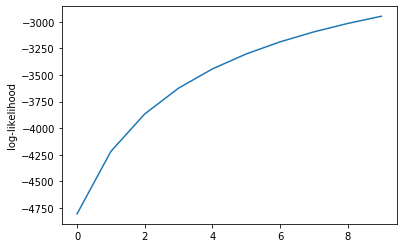

10000
632.8912863668573
[0.46380508 0.03736456 0.23141745 ... 0.0344584  0.01930688 0.72333641]
ther


In [15]:
(vocab_list,Beta,V)=train_classify(5e-5)

In [16]:
def classify(vocab_list,V,Beta):
    with open('devnb.csv', mode='r') as infile:
        reader = list(csv.reader(infile))
        header = reader[0]
        Y_dev=[]
        n=2000
        count=0
        X_dev=np.zeros((n,V))
        X_dev_bias=np.concatenate([np.ones((2000,1)),X_dev],axis =1)
        for row in reader[1:2001]:
            tweet=row[1]
            words=better_tokenize(tweet)
            Y_dev.append(int(row[0]))
            for word in words:
                j=vocab_list.index(word)
                #print(count)
                X_dev_bias[count][j+1]+=1
            count+=1
        #word_dictionary= Counter(word_list)
        print(len(Y))
        
        y_dev=np.asarray(Y_dev)
        #Beta= np.zeros((V+1))
        t= np.matmul(X_dev_bias,np.transpose(Beta))
        
        y_hat=sigmoidFunct(t) 
        error=np.sum((y-y_hat)**2)
        print(error)

In [17]:
vocab_list

['glasses',
 'water',
 'drink',
 'day',
 'oh',
 'yeah',
 'loving',
 'nikki',
 'poor',
 'shes',
 'emo',
 'yes',
 'time',
 'people',
 'think',
 'swaying',
 'arm',
 'forth',
 'change',
 'direction',
 'bowling',
 'ball',
 'damn',
 'kenny',
 'need',
 'emotional',
 'condoms',
 'shit',
 'son',
 'pretty',
 'aim',
 'errors',
 'weeeee',
 'dont',
 'type',
 'like',
 'retard',
 'fuck',
 'bra',
 'consequences',
 'awwwwdude',
 'sucks',
 'hope',
 'paperclip',
 'rubberband',
 'gov',
 'going',
 'make',
 'uncomfortable',
 'fat',
 'expect',
 'work',
 'shouldnt',
 'tcot',
 'gets',
 'cold',
 'plug',
 'car',
 'rough',
 'hrs',
 'sunlight',
 'wtf',
 'bxtch',
 'clea',
 'ineva',
 'ben',
 'ta',
 'hiz',
 'house',
 'serious',
 'does',
 'myspace',
 'confused',
 'ill',
 'unlock',
 'old',
 'picture',
 'album',
 'pics',
 'years',
 'ago',
 'look',
 'photo',
 'bucket',
 'send',
 'link',
 'gay',
 'hate',
 'lonestar',
 'basically',
 'agreed',
 'youhttplofistlcom',
 'awesomebad',
 'ass',
 'gonna',
 'lie',
 'brought',
 'lets